## Energy H2O AutoML

Import libraries for Auto ML

In [1]:
import h2o
from h2o.automl import H2OAutoML

Initialising h2o

In [2]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; OpenJDK 64-Bit Server VM (build 17+35-2724, mixed mode, sharing)
  Starting server from D:\Program Files\Python39\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\BALAJI~1\AppData\Local\Temp\tmp0sq7twkl
  JVM stdout: C:\Users\BALAJI~1\AppData\Local\Temp\tmp0sq7twkl\h2o_BalajiMunusamy_started_from_python.out
  JVM stderr: C:\Users\BALAJI~1\AppData\Local\Temp\tmp0sq7twkl\h2o_BalajiMunusamy_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.7
H2O_cluster_version_age:,16 days
H2O_cluster_name:,H2O_from_python_BalajiMunusamy_6vioga
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.902 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


Load data into h2o

In [3]:
data_path = r"data/BO5341_IoTData.csv"

In [4]:
df_iot = h2o.import_file(path=data_path)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [12]:
#preview loaded data
df_iot.head()

X,Product_Qty_Unit,Product_ID,Production_Start_Time,Output_QualityParameter1,Material_ID,Product_Name,Output_QualityParameter2,Output_QualityParameter3,Output_QualityParameter4,ManufacturingOrder_ID,AssemblyLine_ID,Order_Quantity,Produced_Quantity,Site_location,Manufacturing_StartDate,Manufacturing_EndDate,Manufacturing_StartTS,Manufacturing_EndTS,Total_Manufacturing_Time_mins,Stage1_PrevProduct,Stage1_DelayFlag,Stage1_ProcessingTime_mins,Stage1_RM1_QParameter2,Stage1_RM1_QParameter1,Stage1_RM2_QParameter2,Stage1_RM2_QParameter1,Stage1_RM2_RequiredQty,Stage1_RM2_ConsumedQty,Stage1_RM2_ToleranceQty,Stage1_ProductChange_Flag,Stage1_QP1_Low,Stage1_QP1_Actual,Stage1_QP1_High,Stage1_QP2_Low,Stage1_QP2_Actual,Stage1_QP2_High,Stage1_QP3_Low,Stage1_QP3_Actual,Stage1_QP3_High,Stage1_QP4_Low,Stage1_QP4_Actual,Stage1_QP4_High,Stage1_ResourceName,Stage2_DelayFlag,Stage2_ProcessingTime_mins,Stage2_ProductChange_Flag,Stage2_QP1_Low,Stage2_QP1_Actual,Stage2_QP1_High,Stage2_QP2_Low,Stage2_QP2_Actual,Stage2_QP2_High,Stage2_QP3_Low,Stage2_QP3_Actual,Stage2_QP3_High,Stage2_QP4_Low,Stage2_QP4_Actual,Stage2_QP4_High,Stage3_DelayFlag,Stage3_RM1_QParameter1,Stage3_RM1_QParameter2,Stage3_RM1_RequiredQuantity,Stage3_RM1_ConsumedQuantity,Stage3_RM1_ToleranceQuantity,Stage3_RM2_QParameter1,Stage3_RM2_RequiredQuantity,Stage3_RM2_ConsumedQuantity,Stage3_RM2_ToleranceQuantity,Stage3_RM3_QParameter2,Stage3_RM3_QParameter1,Stage3_RM3_RequiredQuantity,Stage3_RM3_ConsumedQuantity,Stage3_RM3_ToleranceQuantity,Stage3_RM4_RequiredQuantity,Stage3_RM4_ConsumedQuantity,Stage3_RM4_ToleranceQuantity,Stage3_ProductChange_Flag,Stage3_QP1_Low,Stage3_QP1_Actual,Stage3_QP1_High,Stage3_QP2_Low,Stage3_QP2_Actual,Stage3_QP2_High,Stage3_QP3_Low,Stage3_QP3_Actual,Stage3_QP3_High,Stage3_QP4_Low,Stage3_QP4_Actual,Stage3_QP4_High,Stage3_ResourceName,Stage4_PrevProduct,Stage4_DelayFlag,Stage4_ProcessingTime_mins,Stage5_ProductChange_Flag,Stage4_QP1_Low,Stage4_QP1_Actual,Stage4_QP1_High,Stage4_QP2_Low,Stage4_QP2_Actual,Stage4_QP2_High,Stage4_QP3_Low,Stage4_QP3_Actual,Stage4_QP3_High,Stage4_QP4_Low,Stage4_QP4_Actual,Stage4_QP4_High,Stage4_ResourceName,Stage5_PrevProduct,Stage5_ProcessingTime_mins,Stage5_DelayFlag,Stage5_QP1_Low,Stage5_QP1_Actual,Stage5_QP1_High,Stage5_QP2_Low,Stage5_QP2_Actual,Stage5_QP2_High,Stage5_QP3_Low,Stage5_QP3_Actual,Stage5_QP3_High,Stage5_ResourceName,Detergent_Quality
1,KG,Product_0407,40656,380,1234,Tide Plus Oxi,15625,39000,7550,1,Line 2,3800,0,Pune,20-02-2014 00:00,20-02-2014 00:00,20-02-2014 04:06,20-02-2014 10:06,360,Product_544,No,40.57,3.16,4110,48.5064,132.096,300,292,1,No,180,250,280,69,69,69,12,14.4,48,8.5,10.2,34,Resource_108,Yes,49.07,No,280,300,300,69,69,69,2.16,2.16,nan,1.7,1.7,1.7,No,199.6,0.2,7.5,17.5,0.15,510.044,650,3351.25,2.5,501.5,6,550,1232,2.5,450,0,1.5,No,200,300,280,69,69,69,12,14.4,48,1.7,1.7,1.7,Resource_108,Product_545,Yes,158.3,No,210,220,230,69,18,69,2.16,0,nan,1.7,1.7,1.7,Resource_108,Product_545,64.8,Yes,210,224,230,0,4.5,18,0,0,0,Resource_108,Good
2,KG,Product_0407,201026,391.082,1234,Tide Plus Oxi,14203,36257.6,7151.5,2,Line 2,3800,3140,Pune,24-02-2014 00:00,25-02-2014 00:00,24-02-2014 20:10,25-02-2014 14:10,1080,Product_544,Yes,81.8,3.39404,4274.78,48.9402,132.792,300,292,1,No,181.035,231.322,281.61,69.5658,69.5658,69.5658,12.0545,24.109,48.218,8.5565,17.113,34.226,Resource_108,No,10.97,No,281.61,297.702,301.725,69.5658,69.5658,69.5658,2.16981,2.16981,nan,1.7113,1.7113,1.7113,Yes,199.6,0.2,7.5,17.7415,0.15,508.62,650,3340.7,2.5,511.578,6.00375,550,1232.77,2.5,350,1056.84,2.43048,No,201.15,211.208,281.61,69.5658,69.5658,69.5658,12.0545,24.109,48.218,1.7113,1.7113,1.7113,Resource_108,Product_571,No,1,No,211.208,231.322,231.322,69.5658,69.5658,69.5658,2.16981,2.16981,nan,1.7113,1.7113,1.7113,Resource_108,Product_571,0.37,No,211.208,231.322,231.322,0,18.1476,18.1476,0,0,0,Resource_108,Good
3,KG,Product_0407,81616,386.162,1234,Tide Plus Oxi,16356.9,39566.6,8368.51,3,Line 2,3800,0,Pune,20-02-2014 00:00,20-02-2014 00:00,20-02-201

split data into train-test in ratio 9:1

In [7]:
train,test = df_iot.split_frame(ratios=[.9],  seed=21)

####  AutoML

In [18]:
# Run AutoML for 20 base models
aml = H2OAutoML(max_models=20, seed=21)

In [19]:
# Train models on target variable 'Detergent_Quality'
aml.train(y="Detergent_Quality", training_frame=train)

AutoML progress: |
12:10:20.629: AutoML: XGBoost is not available; skipping it.
12:10:20.652: Step 'best_of_family_xgboost' not defined in provider 'StackedEnsemble': skipping it.
12:10:20.652: Step 'all_xgboost' not defined in provider 'StackedEnsemble': skipping it.
12:10:20.659: _train param, Dropping bad and constant columns: [Material_ID, Stage3_ProductChange_Flag, Stage2_ProductChange_Flag, Product_ID, Stage5_QP3_Low, Product_Name, Site_location, Stage5_ProductChange_Flag, Stage4_QP3_High, Stage2_QP3_High, Stage5_QP2_Low, Product_Qty_Unit, Stage5_QP3_High]

███
12:11:04.405: _train param, Dropping bad and constant columns: [Material_ID, Stage3_ProductChange_Flag, Stage2_ProductChange_Flag, Product_ID, Stage5_QP3_Low, Product_Name, Site_location, Stage5_ProductChange_Flag, Stage4_QP3_High, Stage2_QP3_High, Stage5_QP2_Low, Product_Qty_Unit, Stage5_QP3_High]

█
12:11:08.471: _train param, Dropping unused columns: [Material_ID, Stage3_ProductChange_Flag, Stage2_ProductChange_Flag, Pr

,,Bad,Good,Error,Rate
0,Bad,204.0,3.0,0.0145,(3.0/207.0)
1,Good,0.0,697.0,0.0,(0.0/697.0)
2,Total,204.0,700.0,0.0033,(3.0/904.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.064230,0.997853,240.0
1,max f2,0.064230,0.999140,240.0
2,max f0point5,0.617335,0.997683,229.0
3,max accuracy,0.064230,0.996681,240.0
4,max precision,0.995635,1.000000,0.0
5,max recall,0.064230,1.000000,240.0
6,max specificity,0.995635,1.000000,0.0
7,max absolute_mcc,0.064230,0.990598,240.0
8,max min_per_class_accuracy,0.451684,0.989957,232.0
9,max mean_per_class_accuracy,0.617335,0.994261,229.0



Gains/Lift Table: Avg response rate: 77.10 %, avg score: 76.00 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011062,0.995156,1.296987,1.296987,1.000000,0.995344,1.000000,0.995344,0.014347,0.014347,29.698709,29.698709,0.014347
1,2,0.021018,0.994923,1.296987,1.296987,1.000000,0.995010,1.000000,0.995186,0.012912,0.027260,29.698709,29.698709,0.027260
2,3,0.037611,0.994920,1.296987,1.296987,1.000000,0.994920,1.000000,0.995068,0.021521,0.048780,29.698709,29.698709,0.048780
3,4,0.049779,0.994919,1.296987,1.296987,1.000000,0.994919,1.000000,0.995032,0.015782,0.064562,29.698709,29.698709,0.064562
4,5,0.051991,0.994919,1.296987,1.296987,1.000000,0.994919,1.000000,0.995027,0.002869,0.067432,29.698709,29.698709,0.067432
5,6,0.100664,0.994907,1.296987,1.296987,1.000000,0.994911,1.000000,0.994971,0.063128,0.130560,29.698709,29.698709,0.130560
6,7,0.386062,0.994901,1.296987,1.296987,1.000000,0.994902,1.000000,0.994920,0.370158,0.500717,29.698709,29.698709,0.500717
7,8,0.435841,0.994900,1.296987,1.296987,1.000000,0.994900,1.000000,0.994917,0.064562,0.565280,29.698709,29.698709,0.565280
8,9,0.501106,0.993880,1.296987,1.296987,1.000000,0.994291,1.000000,0.994836,0.084648,0.649928,29.698709,29.698709,0.649928
9,10,0.599558,0.992519,1.296987,1.296987,1.000000,0.993152,1.000000,0.994559,0.127690,0.777618,29.698709,29.698709,0.777618




ModelMetricsBinomial: stackedensemble
** Reported on cross-validation data. **

MSE: 0.054462184168028546
RMSE: 0.233371343930716
LogLoss: 0.18303810324701056
Mean Per-Class Error: 0.12715641222908394
AUC: 0.9688416193624853
AUCPR: 0.9871223616187137
Gini: 0.9376832387249705

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3457614070848637: 


,,Bad,Good,Error,Rate
0,Bad,160.0,47.0,0.2271,(47.0/207.0)
1,Good,19.0,678.0,0.0273,(19.0/697.0)
2,Total,179.0,725.0,0.073,(66.0/904.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.345761,0.953586,253.0
1,max f2,0.134049,0.972144,294.0
2,max f0point5,0.910462,0.961116,154.0
3,max accuracy,0.345761,0.926991,253.0
4,max precision,0.996079,1.000000,0.0
5,max recall,0.025356,1.000000,352.0
6,max specificity,0.996079,1.000000,0.0
7,max absolute_mcc,0.625464,0.792880,205.0
8,max min_per_class_accuracy,0.774632,0.911047,182.0
9,max mean_per_class_accuracy,0.910462,0.915587,154.0



Gains/Lift Table: Avg response rate: 77.10 %, avg score: 76.99 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.081858,0.995819,1.279460,1.279460,0.986486,0.995823,0.986486,0.995823,0.104735,0.104735,27.946023,27.946023,0.099904
1,2,0.111726,0.995316,1.296987,1.284146,1.000000,0.995382,0.990099,0.995705,0.038737,0.143472,29.698709,28.414563,0.138641
2,3,0.154867,0.994930,1.296987,1.287723,1.000000,0.995060,0.992857,0.995526,0.055954,0.199426,29.698709,28.772289,0.194595
3,4,0.211283,0.994744,1.296987,1.290197,1.000000,0.994816,0.994764,0.995336,0.073171,0.272597,29.698709,29.019658,0.267766
4,5,0.323009,0.994294,1.296987,1.292545,1.000000,0.994381,0.996575,0.995006,0.144907,0.417504,29.698709,29.254535,0.412673
5,6,0.400442,0.993376,1.278459,1.289821,0.985714,0.993826,0.994475,0.994778,0.098996,0.516499,27.845870,28.982141,0.506837
6,7,0.500000,0.990527,1.282576,1.288379,0.988889,0.992390,0.993363,0.994302,0.127690,0.644189,28.257612,28.837877,0.629697
7,8,0.599558,0.975624,1.282576,1.287415,0.988889,0.984852,0.992620,0.992733,0.127690,0.771879,28.257612,28.741523,0.752556
8,9,0.700221,0.891023,1.168714,1.270351,0.901099,0.945413,0.979463,0.985930,0.117647,0.889527,16.871364,27.035070,0.826725
9,10,0.799779,0.348598,0.807014,1.212674,0.622222,0.624810,0.934993,0.940978,0.080344,0.969871,-19.298581,21.267396,0.742818


In [20]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_AllModels_5_AutoML_1_20220107_121020,0.968842,0.183038,0.987122,0.127156,0.233371,0.0544622
StackedEnsemble_AllModels_2_AutoML_1_20220107_121020,0.967386,0.205469,0.989227,0.136555,0.242667,0.0588872
StackedEnsemble_BestOfFamily_3_AutoML_1_20220107_121020,0.967251,0.20482,0.98916,0.133422,0.242309,0.0587136
StackedEnsemble_AllModels_3_AutoML_1_20220107_121020,0.966859,0.206184,0.98904,0.134139,0.244567,0.0598131
StackedEnsemble_BestOfFamily_4_AutoML_1_20220107_121020,0.96679,0.20765,0.988947,0.133422,0.24366,0.0593701
StackedEnsemble_AllModels_4_AutoML_1_20220107_121020,0.965903,0.208782,0.98871,0.141386,0.245913,0.0604733
StackedEnsemble_BestOfFamily_6_AutoML_1_20220107_121020,0.965778,0.213511,0.988498,0.149613,0.250736,0.0628685
StackedEnsemble_AllModels_6_AutoML_1_20220107_121020,0.965577,0.210335,0.988477,0.121989,0.248409,0.0617073
XRT_1_AutoML_1_20220107_121020,0.963186,0.246469,0.988457,0.115651,0.273166,0.0746199
StackedEnsemble_BestOfFamily_5_AutoML_1_20220107_121020,0.961353,0.208678,0.985871,0.11082,0.250063,0.0625315


In [21]:
#View details of leader model
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_5_AutoML_1_20220107_121020

No model summary for this model

ModelMetricsBinomial: stackedensemble
** Reported on train data. **

MSE: 0.007785230280736348
RMSE: 0.08823395197278851
LogLoss: 0.03356590330106523
Mean Per-Class Error: 0.007246376811594203
AUC: 0.9998405866411605
AUCPR: 0.9999525921502719
Gini: 0.999681173282321

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.06423045624033655: 


,,Bad,Good,Error,Rate
0,Bad,204.0,3.0,0.0145,(3.0/207.0)
1,Good,0.0,697.0,0.0,(0.0/697.0)
2,Total,204.0,700.0,0.0033,(3.0/904.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.064230,0.997853,240.0
1,max f2,0.064230,0.999140,240.0
2,max f0point5,0.617335,0.997683,229.0
3,max accuracy,0.064230,0.996681,240.0
4,max precision,0.995635,1.000000,0.0
5,max recall,0.064230,1.000000,240.0
6,max specificity,0.995635,1.000000,0.0
7,max absolute_mcc,0.064230,0.990598,240.0
8,max min_per_class_accuracy,0.451684,0.989957,232.0
9,max mean_per_class_accuracy,0.617335,0.994261,229.0



Gains/Lift Table: Avg response rate: 77.10 %, avg score: 76.00 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.011062,0.995156,1.296987,1.296987,1.000000,0.995344,1.000000,0.995344,0.014347,0.014347,29.698709,29.698709,0.014347
1,2,0.021018,0.994923,1.296987,1.296987,1.000000,0.995010,1.000000,0.995186,0.012912,0.027260,29.698709,29.698709,0.027260
2,3,0.037611,0.994920,1.296987,1.296987,1.000000,0.994920,1.000000,0.995068,0.021521,0.048780,29.698709,29.698709,0.048780
3,4,0.049779,0.994919,1.296987,1.296987,1.000000,0.994919,1.000000,0.995032,0.015782,0.064562,29.698709,29.698709,0.064562
4,5,0.051991,0.994919,1.296987,1.296987,1.000000,0.994919,1.000000,0.995027,0.002869,0.067432,29.698709,29.698709,0.067432
5,6,0.100664,0.994907,1.296987,1.296987,1.000000,0.994911,1.000000,0.994971,0.063128,0.130560,29.698709,29.698709,0.130560
6,7,0.386062,0.994901,1.296987,1.296987,1.000000,0.994902,1.000000,0.994920,0.370158,0.500717,29.698709,29.698709,0.500717
7,8,0.435841,0.994900,1.296987,1.296987,1.000000,0.994900,1.000000,0.994917,0.064562,0.565280,29.698709,29.698709,0.565280
8,9,0.501106,0.993880,1.296987,1.296987,1.000000,0.994291,1.000000,0.994836,0.084648,0.649928,29.698709,29.698709,0.649928
9,10,0.599558,0.992519,1.296987,1.296987,1.000000,0.993152,1.000000,0.994559,0.127690,0.777618,29.698709,29.698709,0.777618




ModelMetricsBinomial: stackedensemble
** Reported on cross-validation data. **

MSE: 0.054462184168028546
RMSE: 0.233371343930716
LogLoss: 0.18303810324701056
Mean Per-Class Error: 0.12715641222908394
AUC: 0.9688416193624853
AUCPR: 0.9871223616187137
Gini: 0.9376832387249705

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3457614070848637: 


,,Bad,Good,Error,Rate
0,Bad,160.0,47.0,0.2271,(47.0/207.0)
1,Good,19.0,678.0,0.0273,(19.0/697.0)
2,Total,179.0,725.0,0.073,(66.0/904.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.345761,0.953586,253.0
1,max f2,0.134049,0.972144,294.0
2,max f0point5,0.910462,0.961116,154.0
3,max accuracy,0.345761,0.926991,253.0
4,max precision,0.996079,1.000000,0.0
5,max recall,0.025356,1.000000,352.0
6,max specificity,0.996079,1.000000,0.0
7,max absolute_mcc,0.625464,0.792880,205.0
8,max min_per_class_accuracy,0.774632,0.911047,182.0
9,max mean_per_class_accuracy,0.910462,0.915587,154.0



Gains/Lift Table: Avg response rate: 77.10 %, avg score: 76.99 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.081858,0.995819,1.279460,1.279460,0.986486,0.995823,0.986486,0.995823,0.104735,0.104735,27.946023,27.946023,0.099904
1,2,0.111726,0.995316,1.296987,1.284146,1.000000,0.995382,0.990099,0.995705,0.038737,0.143472,29.698709,28.414563,0.138641
2,3,0.154867,0.994930,1.296987,1.287723,1.000000,0.995060,0.992857,0.995526,0.055954,0.199426,29.698709,28.772289,0.194595
3,4,0.211283,0.994744,1.296987,1.290197,1.000000,0.994816,0.994764,0.995336,0.073171,0.272597,29.698709,29.019658,0.267766
4,5,0.323009,0.994294,1.296987,1.292545,1.000000,0.994381,0.996575,0.995006,0.144907,0.417504,29.698709,29.254535,0.412673
5,6,0.400442,0.993376,1.278459,1.289821,0.985714,0.993826,0.994475,0.994778,0.098996,0.516499,27.845870,28.982141,0.506837
6,7,0.500000,0.990527,1.282576,1.288379,0.988889,0.992390,0.993363,0.994302,0.127690,0.644189,28.257612,28.837877,0.629697
7,8,0.599558,0.975624,1.282576,1.287415,0.988889,0.984852,0.992620,0.992733,0.127690,0.771879,28.257612,28.741523,0.752556
8,9,0.700221,0.891023,1.168714,1.270351,0.901099,0.945413,0.979463,0.985930,0.117647,0.889527,16.871364,27.035070,0.826725
9,10,0.799779,0.348598,0.807014,1.212674,0.622222,0.624810,0.934993,0.940978,0.080344,0.969871,-19.298581,21.267396,0.742818


In [22]:
#Run prediction on test data
preds = aml.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [23]:
preds

predict,Bad,Good
Good,0.00509475,0.994905
Good,0.0070781,0.992922
Good,0.00707811,0.992922
Good,0.00707643,0.992924
Good,0.00509873,0.994901
Good,0.0070781,0.992922
Good,0.00509873,0.994901
Good,0.00508124,0.994919
Good,0.00548574,0.994514
Good,0.00509873,0.994901


In [25]:
#Run prediction for test data on leader model
preds = aml.leader.predict(test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [26]:
preds

predict,Bad,Good
Good,0.00509475,0.994905
Good,0.0070781,0.992922
Good,0.00707811,0.992922
Good,0.00707643,0.992924
Good,0.00509873,0.994901
Good,0.0070781,0.992922
Good,0.00509873,0.994901
Good,0.00508124,0.994919
Good,0.00548574,0.994514
Good,0.00509873,0.994901


In [27]:
# Get leaderboard with all possible columns
lb = h2o.automl.get_leaderboard(aml, extra_columns = "ALL")
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
StackedEnsemble_AllModels_5_AutoML_1_20220107_121020,0.968842,0.183038,0.987122,0.127156,0.233371,0.0544622,3290,0.347645,StackedEnsemble
StackedEnsemble_AllModels_2_AutoML_1_20220107_121020,0.967386,0.205469,0.989227,0.136555,0.242667,0.0588872,366,0.024485,StackedEnsemble
StackedEnsemble_BestOfFamily_3_AutoML_1_20220107_121020,0.967251,0.20482,0.98916,0.133422,0.242309,0.0587136,358,0.020884,StackedEnsemble
StackedEnsemble_AllModels_3_AutoML_1_20220107_121020,0.966859,0.206184,0.98904,0.134139,0.244567,0.0598131,359,0.027401,StackedEnsemble
StackedEnsemble_BestOfFamily_4_AutoML_1_20220107_121020,0.96679,0.20765,0.988947,0.133422,0.24366,0.0593701,394,0.018482,StackedEnsemble
StackedEnsemble_AllModels_4_AutoML_1_20220107_121020,0.965903,0.208782,0.98871,0.141386,0.245913,0.0604733,371,0.021778,StackedEnsemble
StackedEnsemble_BestOfFamily_6_AutoML_1_20220107_121020,0.965778,0.213511,0.988498,0.149613,0.250736,0.0628685,3313,0.053018,StackedEnsemble
StackedEnsemble_AllModels_6_AutoML_1_20220107_121020,0.965577,0.210335,0.988477,0.121989,0.248409,0.0617073,3956,0.036221,StackedEnsemble
XRT_1_AutoML_1_20220107_121020,0.963186,0.246469,0.988457,0.115651,0.273166,0.0746199,341,0.01429,DRF
StackedEnsemble_BestOfFamily_5_AutoML_1_20220107_121020,0.961353,0.208678,0.985871,0.11082,0.250063,0.0625315,2463,0.050055,StackedEnsemble


In [28]:
# Get AutoML event log
log = aml.event_log

In [29]:
log

timestamp,level,stage,message,name,value
12:10:20.609,INFO,Workflow,Project: AutoML_1_20220107_121020,,
12:10:20.618,INFO,Validation,Setting stopping tolerance adaptively based on the training frame: 0.033259505261886965,,
12:10:20.618,INFO,Validation,Build control seed: 21,,
12:10:20.619,INFO,DataImport,training frame: Frame key: AutoML_1_20220107_121020_training_py_5_sid_af40 cols: 122 rows: 904 chunks: 32 size: 1356728 checksum: 9072573416824120872,,
12:10:20.619,INFO,DataImport,validation frame: NULL,,
12:10:20.619,INFO,DataImport,leaderboard frame: NULL,,
12:10:20.619,INFO,DataImport,blending frame: NULL,,
12:10:20.619,INFO,DataImport,response column: Detergent_Quality,,
12:10:20.619,INFO,DataImport,fold column: null,,
12:10:20.619,INFO,DataImport,weights column: null,,


In [30]:
# Get training timing info
info = aml.training_info

In [31]:
info

{'creation_epoch': '1641537621',
 'start_epoch': '1641537621',
 'start_GLM_def_1': '1641537621',
 'start_GBM_def_5': '1641537664',
 'start_StackedEnsemble_best_of_family_1': '1641537668',
 'start_DRF_def_1': '1641537669',
 'start_GBM_def_2': '1641537673',
 'start_GBM_def_3': '1641537676',
 'start_GBM_def_4': '1641537680',
 'start_StackedEnsemble_best_of_family_2': '1641537684',
 'start_StackedEnsemble_all_2': '1641537685',
 'start_DRF_XRT': '1641537686',
 'start_GBM_def_1': '1641537690',
 'start_DeepLearning_def_1': '1641537693',
 'start_StackedEnsemble_best_of_family_3': '1641537696',
 'start_StackedEnsemble_all_3': '1641537697',
 'start_GBM_grid_1': '1641537698',
 'start_DeepLearning_grid_1': '1641537711',
 'start_StackedEnsemble_best_of_family_4': '1641537867',
 'start_StackedEnsemble_all_4': '1641537868',
 'start_DeepLearning_grid_2': '1641537869',
 'start_DeepLearning_grid_3': '1641538041',
 'start_StackedEnsemble_all_5': '1641538225',
 'start_StackedEnsemble_best_of_family_gbm': 

In [34]:
#Check performance of model on test data
aml.leader.model_performance(test)


ModelMetricsBinomial: stackedensemble
** Reported on test data. **

MSE: 0.05342336984221835
RMSE: 0.23113496023366598
LogLoss: 0.178221659440834
Mean Per-Class Error: 0.1452991452991453
AUC: 0.9722222222222222
AUCPR: 0.9937887220593261
Gini: 0.9444444444444444

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37864867550400244: 


,,Bad,Good,Error,Rate
0,Bad,13.0,5.0,0.2778,(5.0/18.0)
1,Good,1.0,77.0,0.0128,(1.0/78.0)
2,Total,14.0,82.0,0.0625,(6.0/96.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.378649,0.962500,54.0
1,max f2,0.378649,0.977157,54.0
2,max f0point5,0.947199,0.971429,40.0
3,max accuracy,0.568231,0.937500,52.0
4,max precision,0.995578,1.000000,0.0
5,max recall,0.029849,1.000000,62.0
6,max specificity,0.995578,1.000000,0.0
7,max absolute_mcc,0.568231,0.787726,52.0
8,max min_per_class_accuracy,0.933181,0.897436,43.0
9,max mean_per_class_accuracy,0.947199,0.935897,40.0



Gains/Lift Table: Avg response rate: 81.25 %, avg score: 81.61 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010417,0.994956,1.230769,1.230769,1.000000,0.995578,1.000000,0.995578,0.012821,0.012821,23.076923,23.076923,0.012821
1,2,0.020833,0.994920,1.230769,1.230769,1.000000,0.994923,1.000000,0.995250,0.012821,0.025641,23.076923,23.076923,0.025641
2,3,0.031250,0.994919,1.230769,1.230769,1.000000,0.994920,1.000000,0.995140,0.012821,0.038462,23.076923,23.076923,0.038462
3,4,0.041667,0.994912,1.230769,1.230769,1.000000,0.994919,1.000000,0.995085,0.012821,0.051282,23.076923,23.076923,0.051282
4,5,0.052083,0.994906,1.230769,1.230769,1.000000,0.994910,1.000000,0.995050,0.012821,0.064103,23.076923,23.076923,0.064103
5,6,0.250000,0.994901,1.230769,1.230769,1.000000,0.994902,1.000000,0.994932,0.243590,0.307692,23.076923,23.076923,0.307692
6,7,0.302083,0.994520,1.230769,1.230769,1.000000,0.994786,1.000000,0.994907,0.064103,0.371795,23.076923,23.076923,0.371795
7,8,0.416667,0.992922,1.230769,1.230769,1.000000,0.993735,1.000000,0.994585,0.141026,0.512821,23.076923,23.076923,0.512821
8,9,0.500000,0.990555,1.230769,1.230769,1.000000,0.991883,1.000000,0.994135,0.102564,0.615385,23.076923,23.076923,0.615385
9,10,0.625000,0.972190,1.230769,1.230769,1.000000,0.981661,1.000000,0.991640,0.153846,0.769231,23.076923,23.076923,0.769231


#### Save/Download model

In [36]:
aml.leader.download_model(path='model', filename="leader_model.bin")

'C:\\Users\\BalajiMunusamy\\OneDrive - Open Weaver India Pvt Ltd\\T\\energy_h2o_automl\\model\\leader_model.bin'

In [37]:
h2o.save_model(model=aml.leader, path="model/saved_model/")

'C:\\Users\\BalajiMunusamy\\OneDrive - Open Weaver India Pvt Ltd\\T\\energy_h2o_automl\\model\\saved_model\\StackedEnsemble_AllModels_5_AutoML_1_20220107_121020'

#### Explain prediction if required

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_5_AutoML_1_20220107_121020


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37864867550400244: 


,,Bad,Good,Error,Rate
0,Bad,13.0,5.0,0.2778,(5.0/18.0)
1,Good,1.0,77.0,0.0128,(1.0/78.0)
2,Total,14.0,82.0,0.0625,(6.0/96.0)


# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

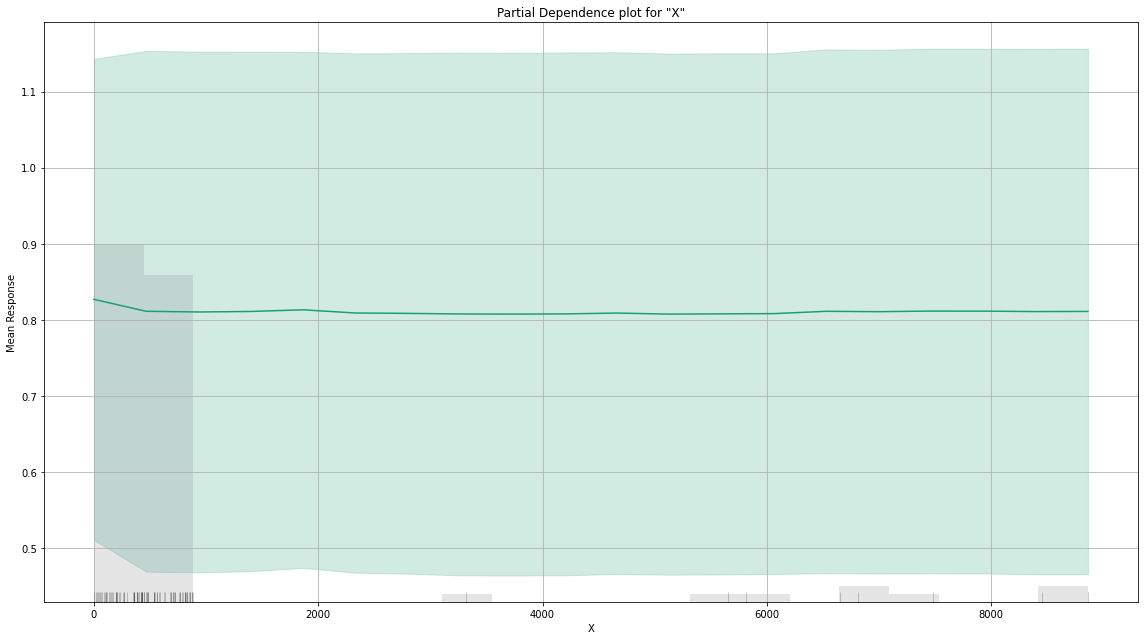

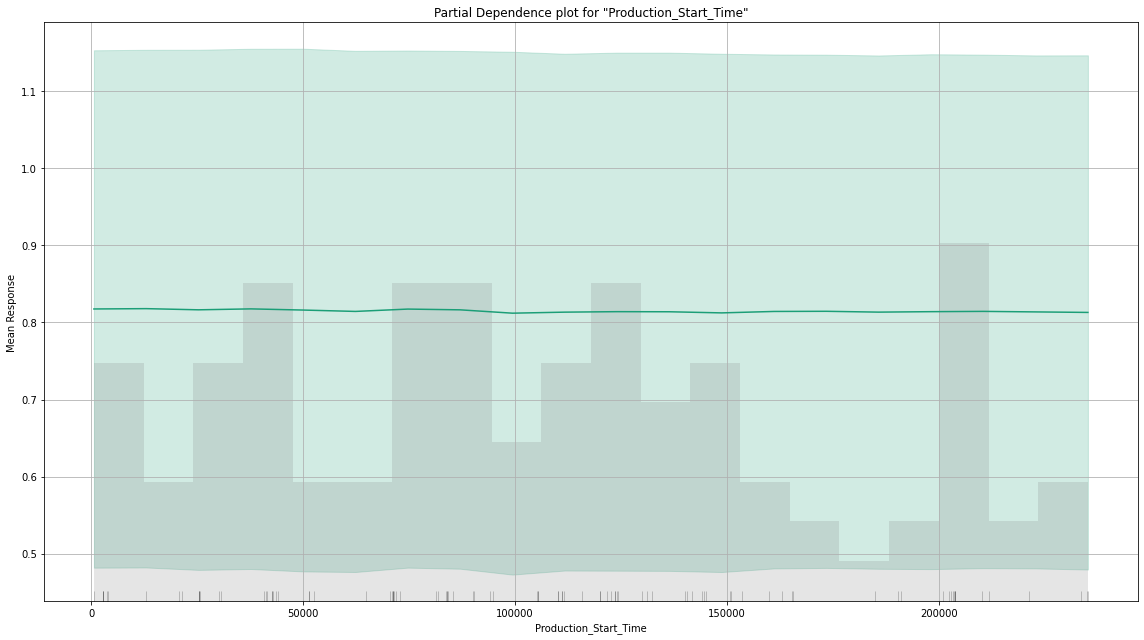

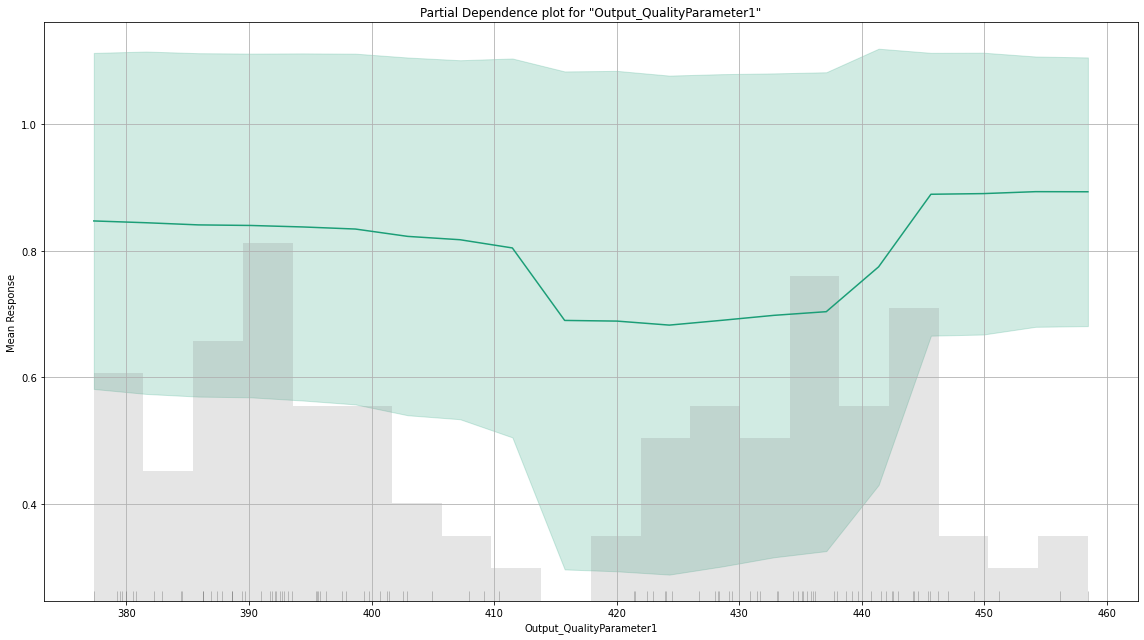

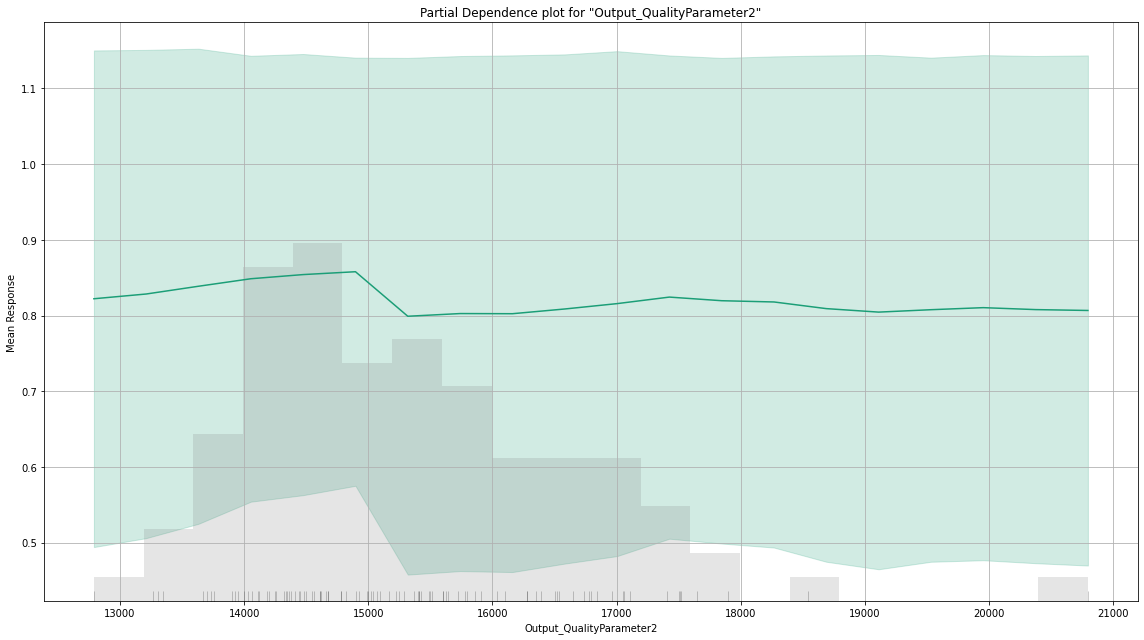

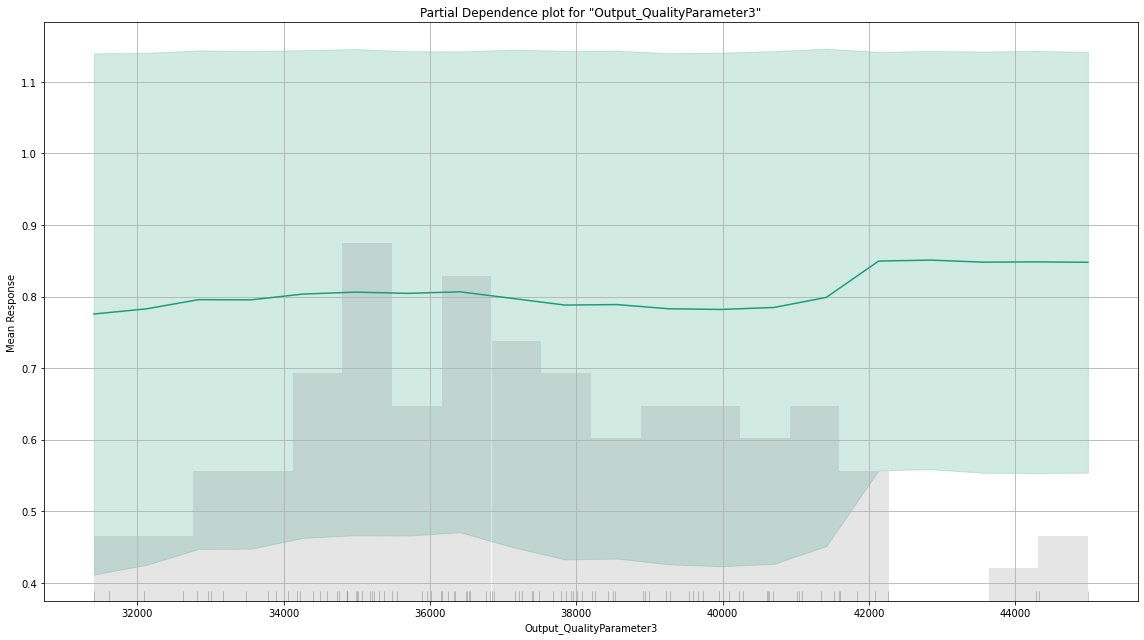

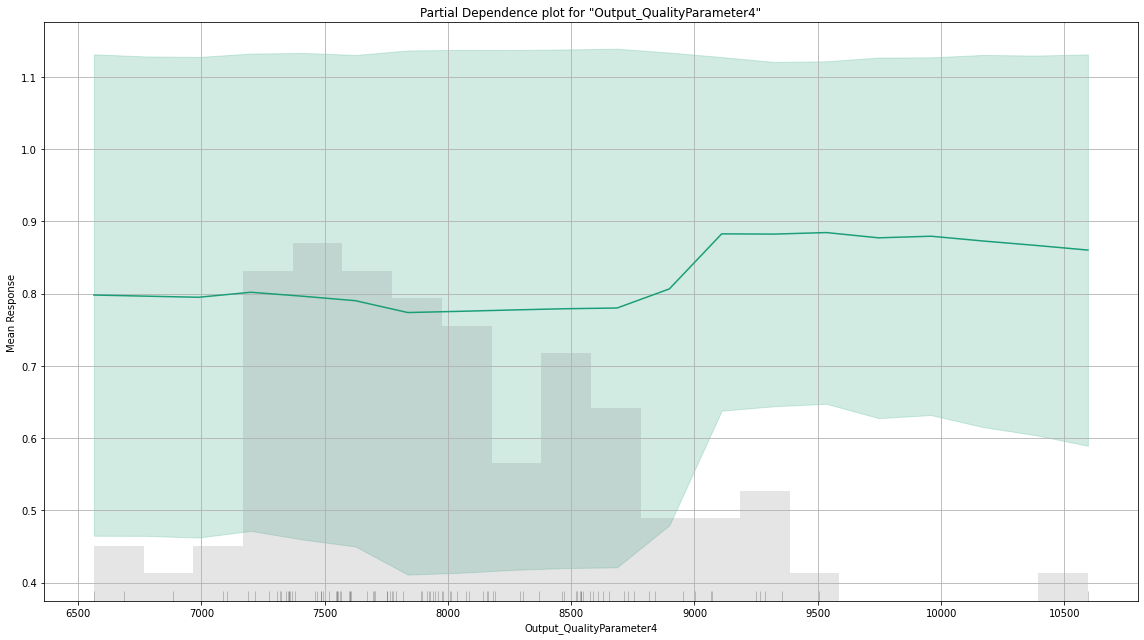

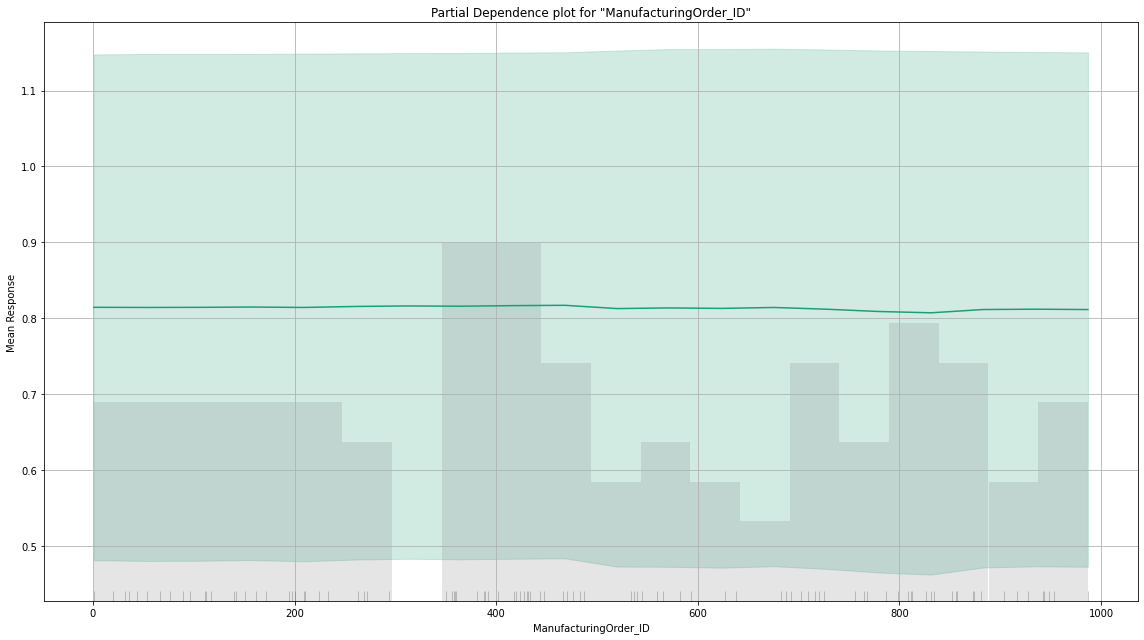

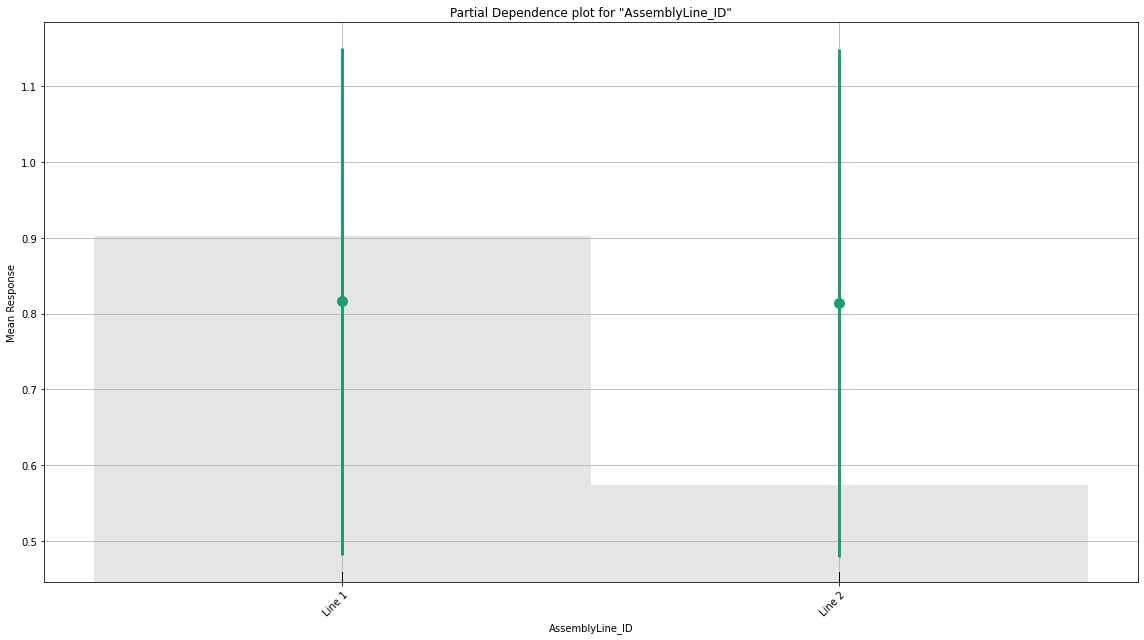

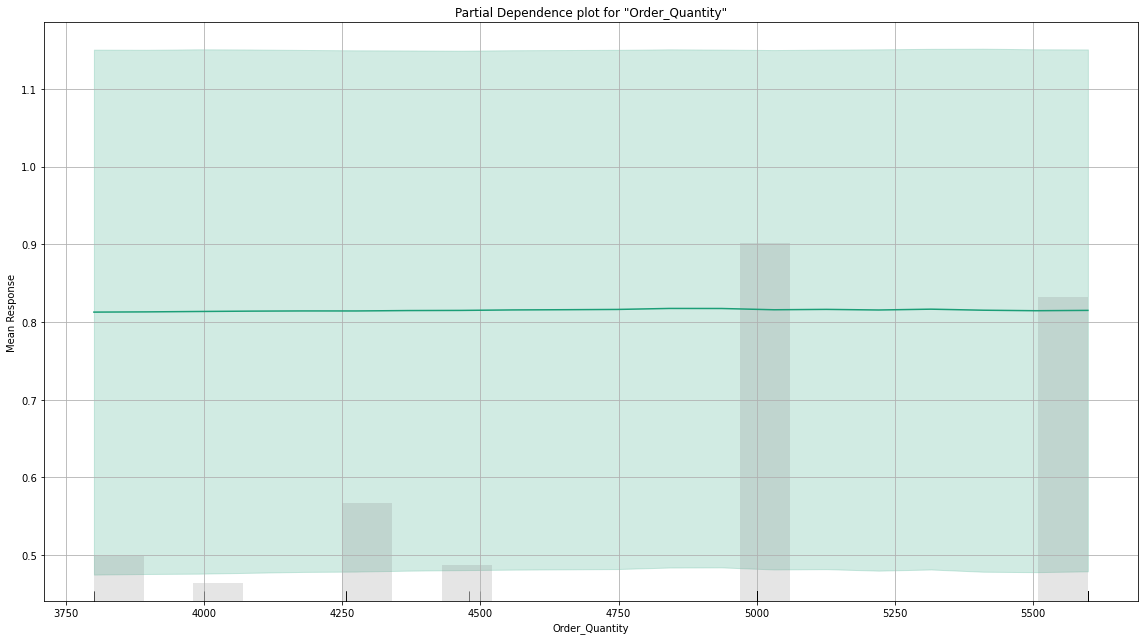

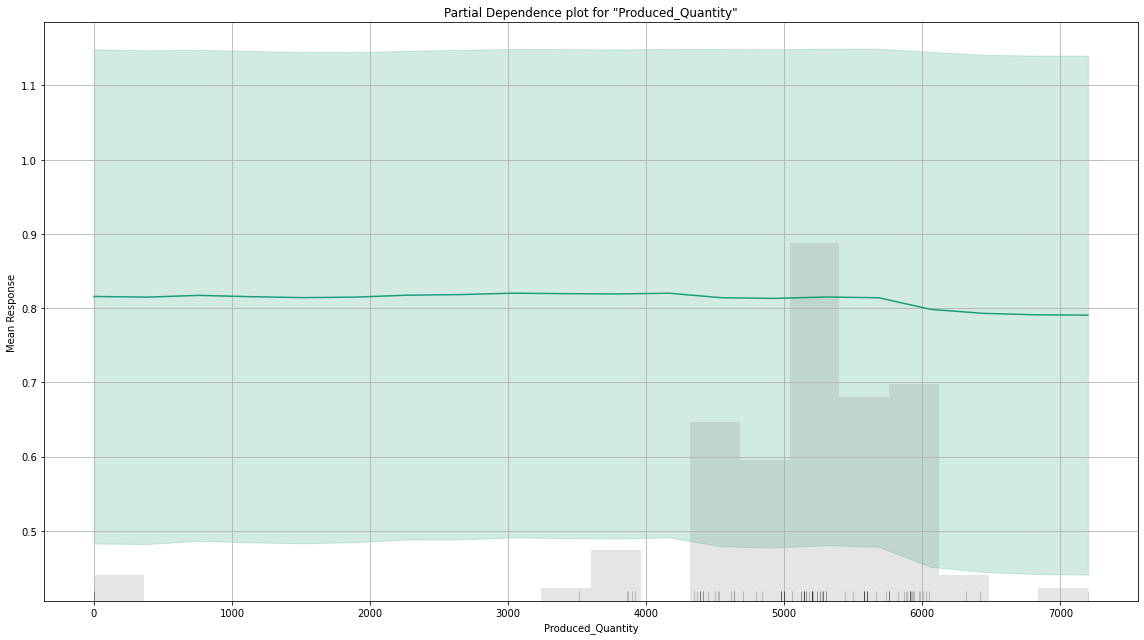

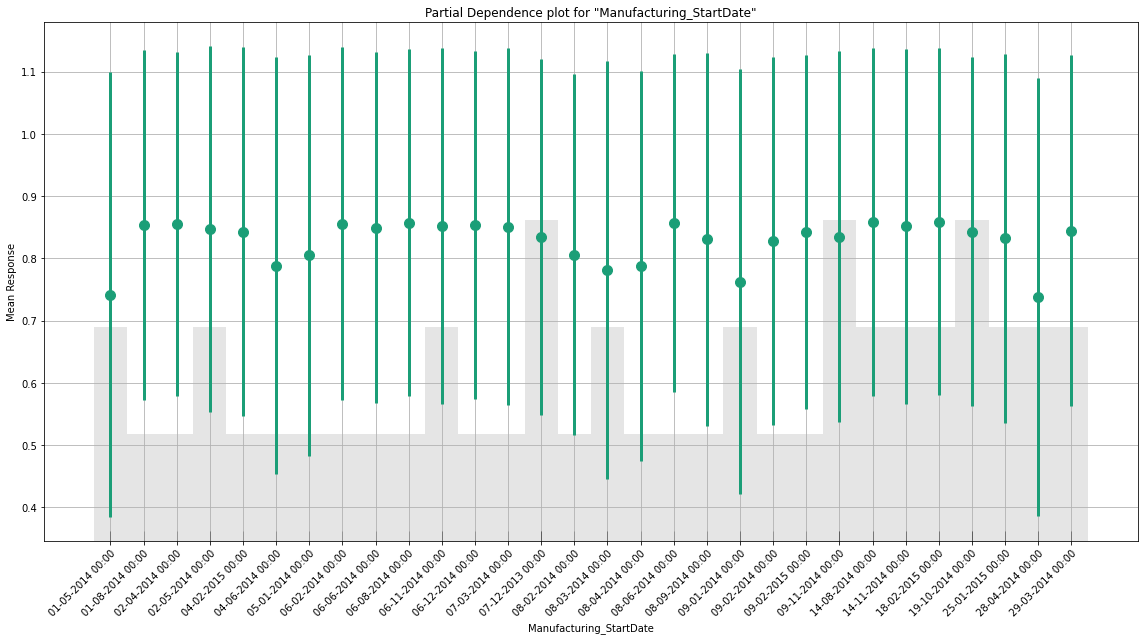

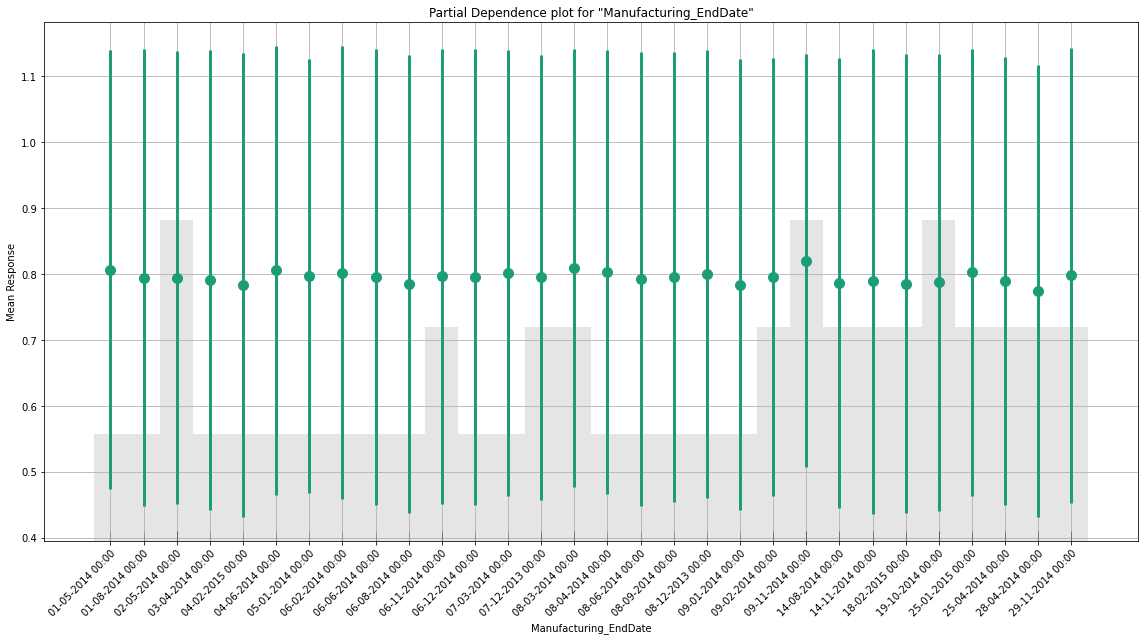

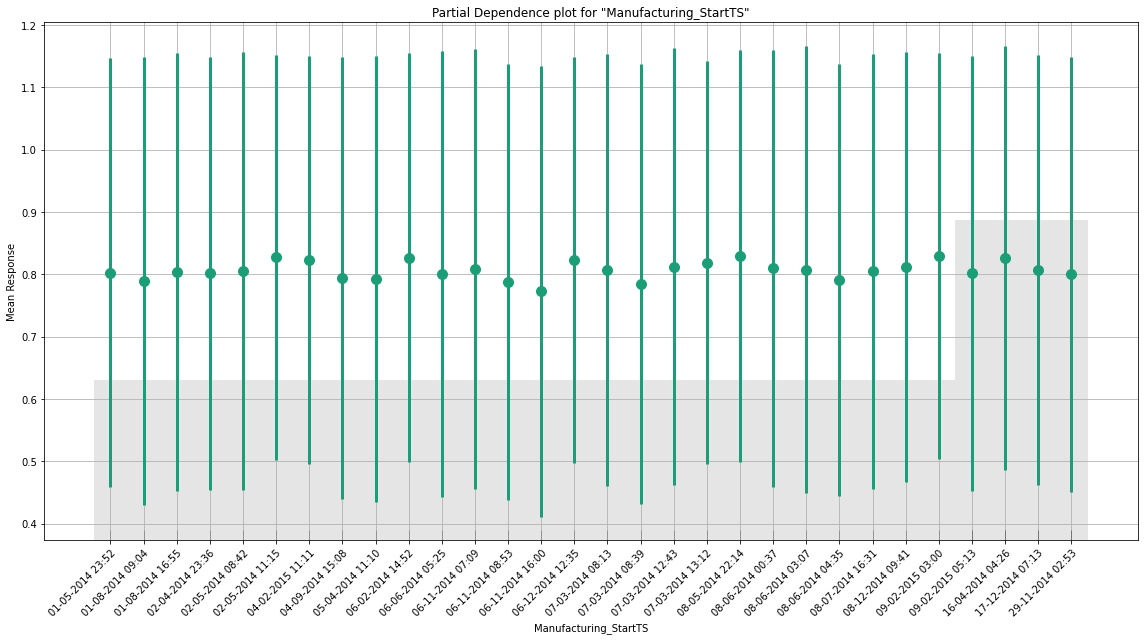

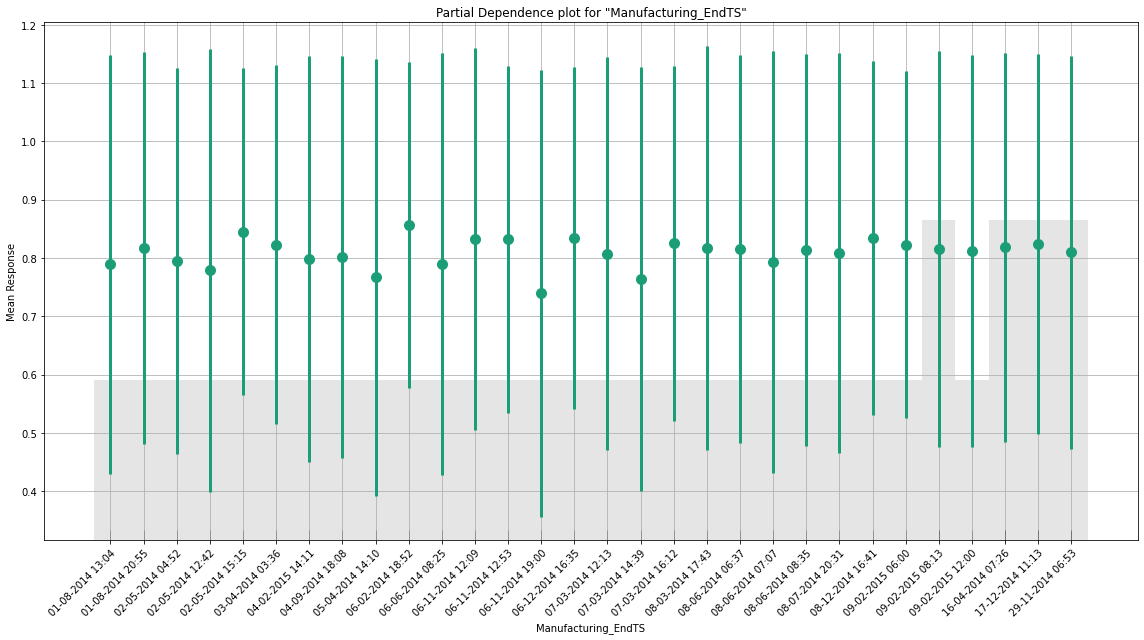

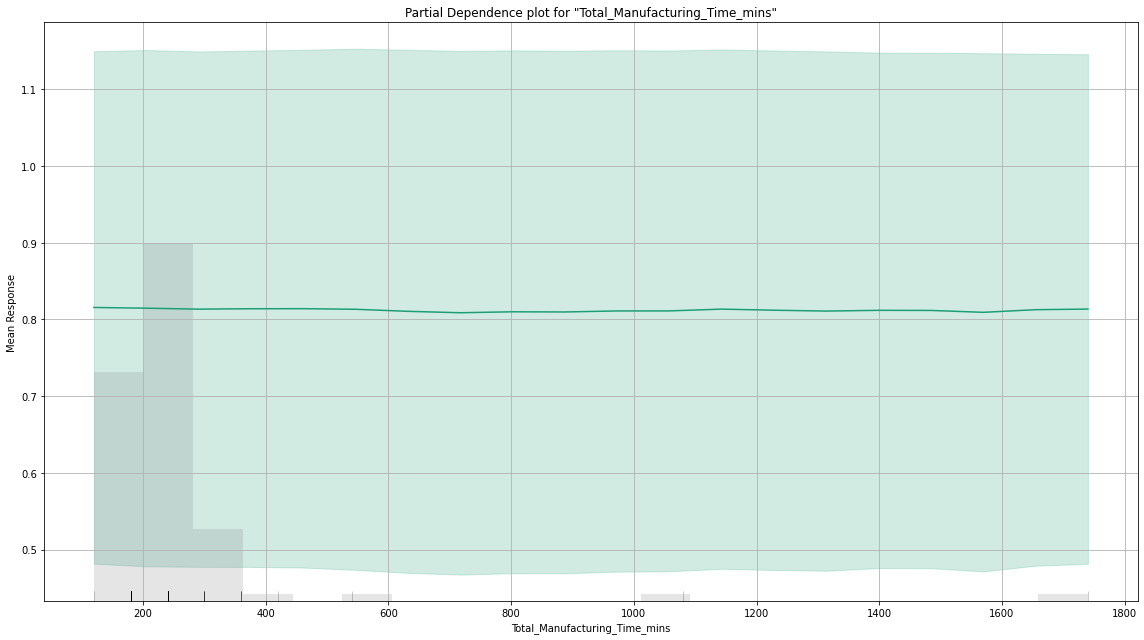

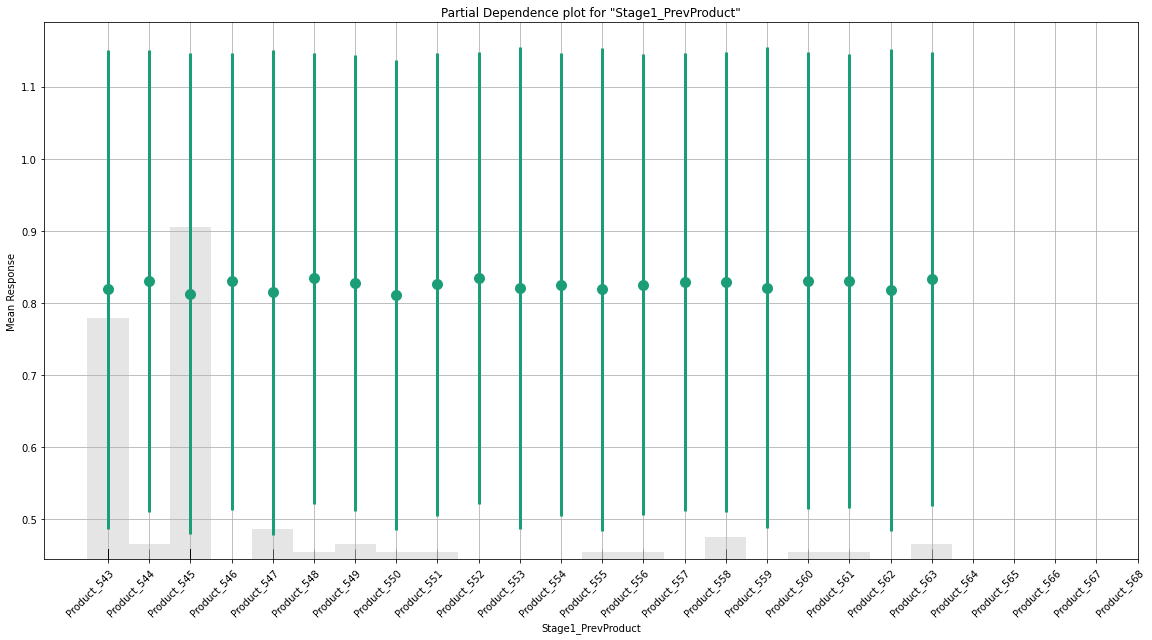

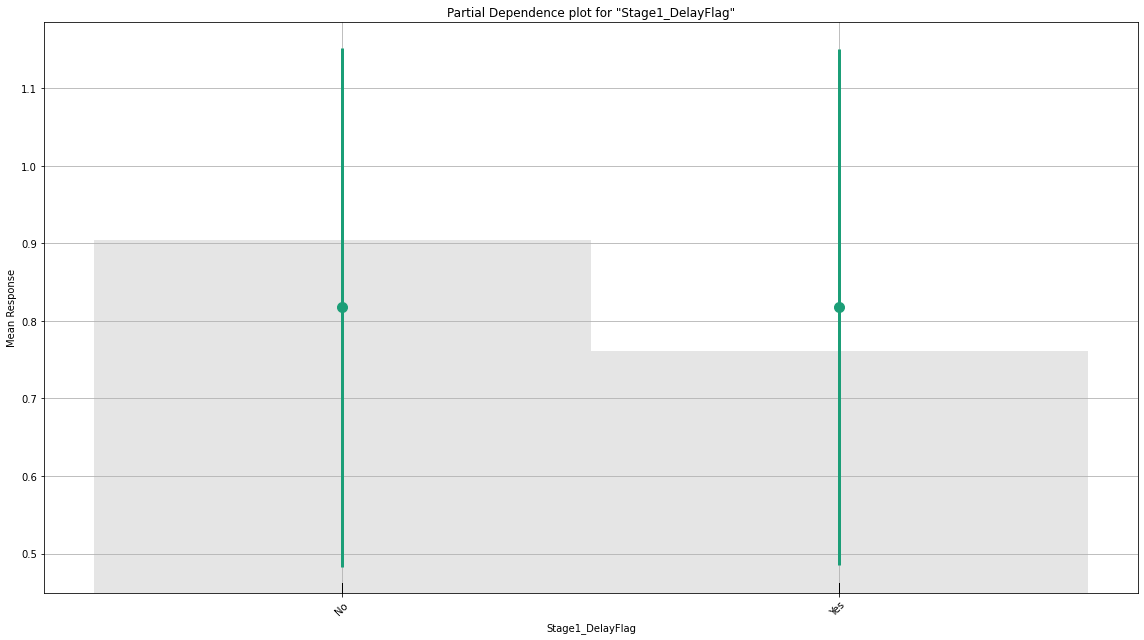

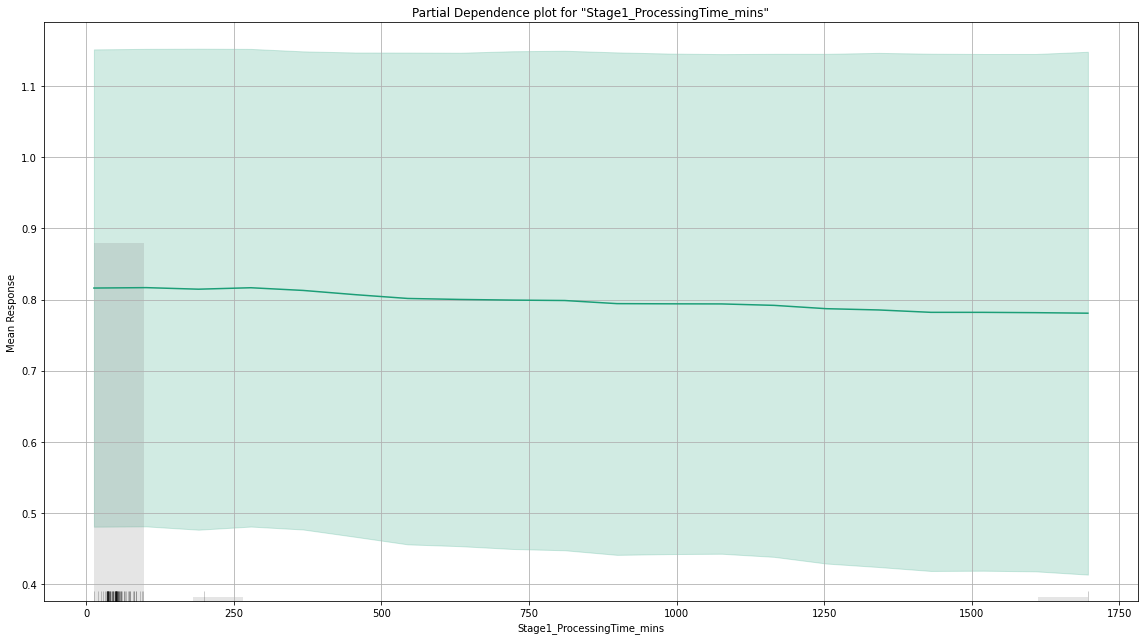

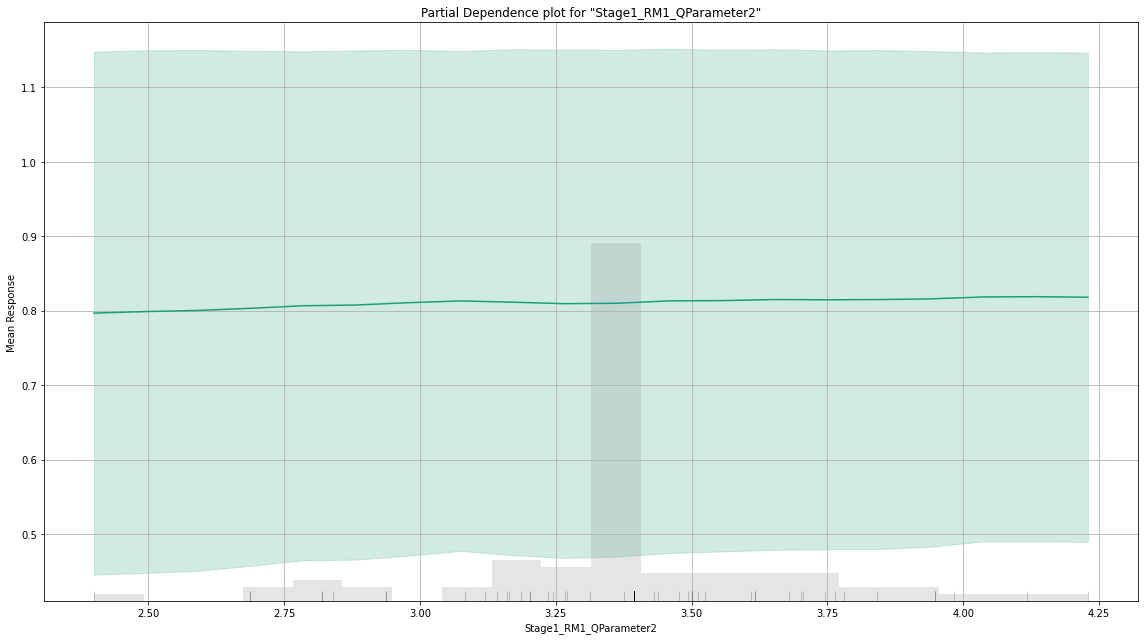

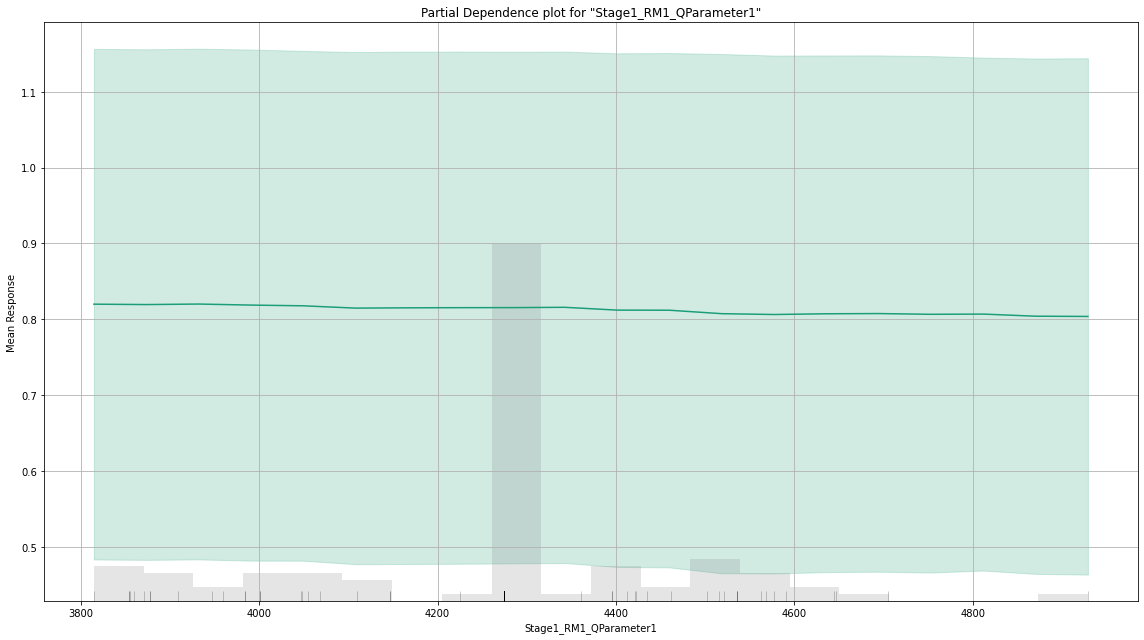

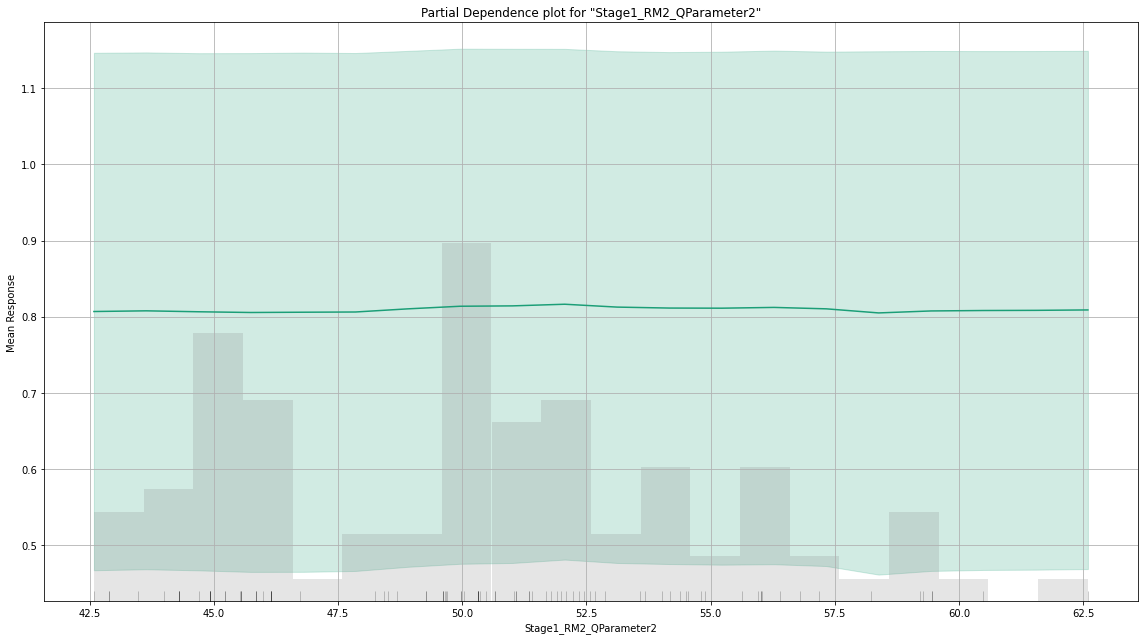

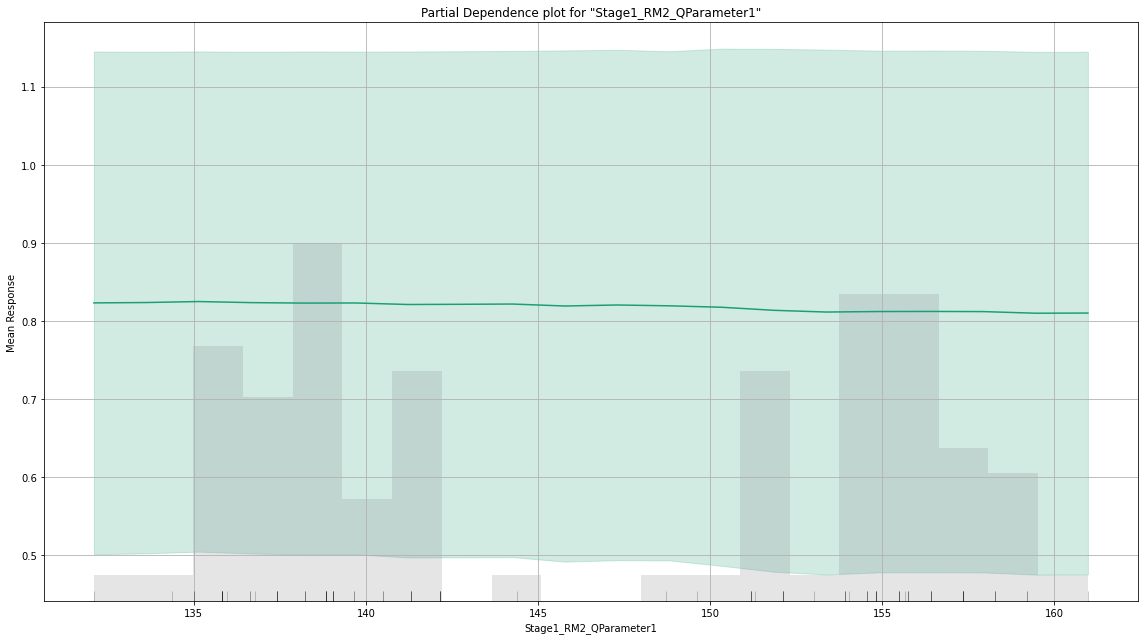

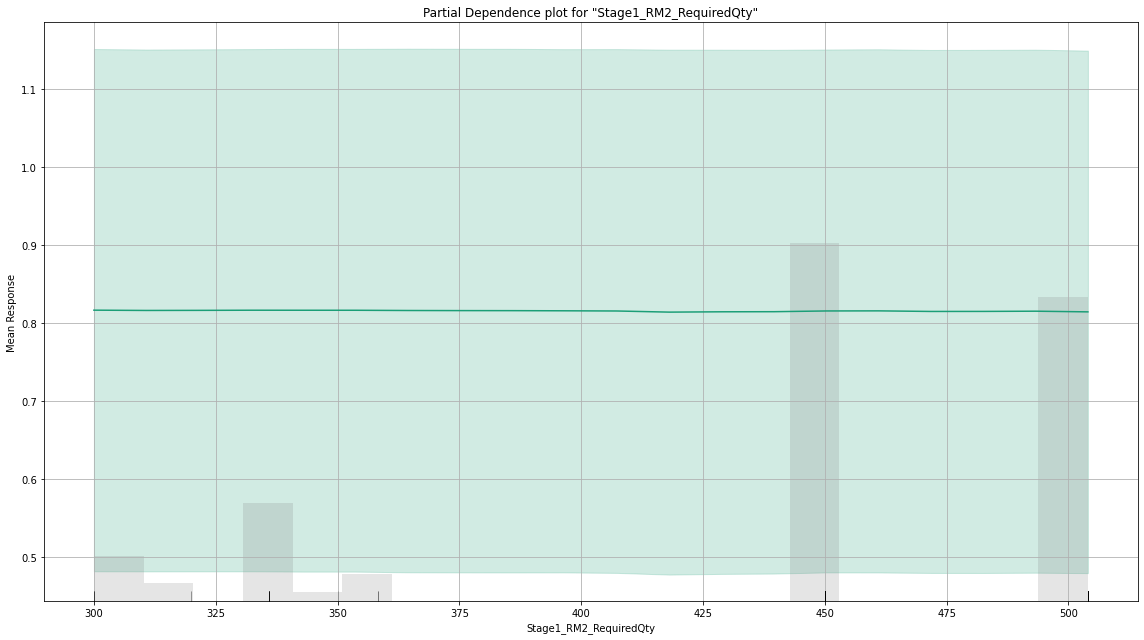

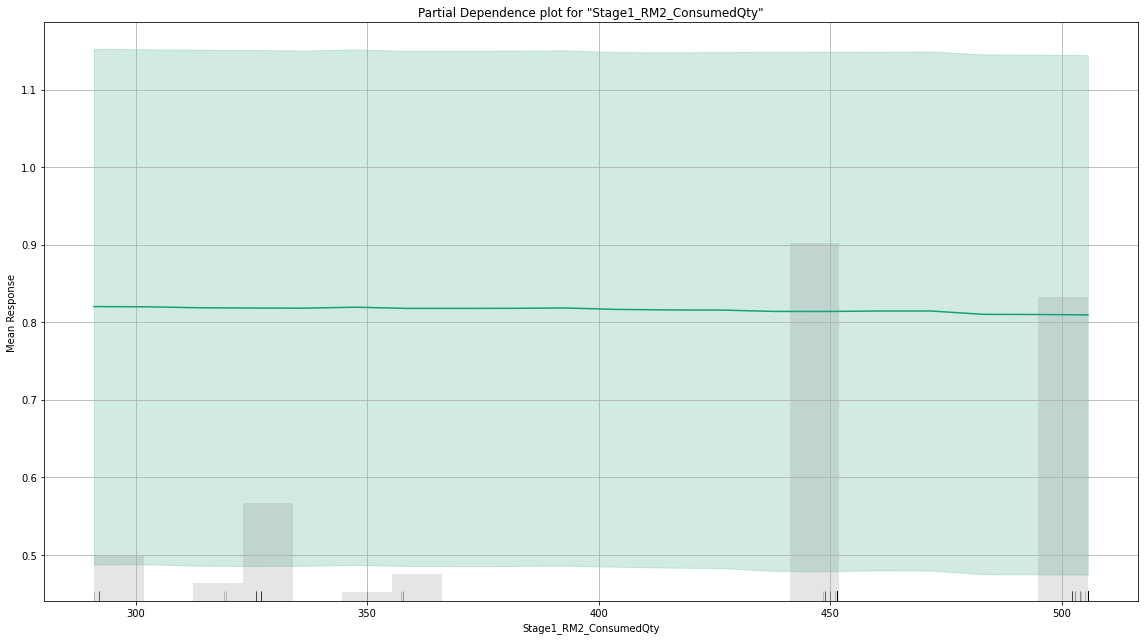

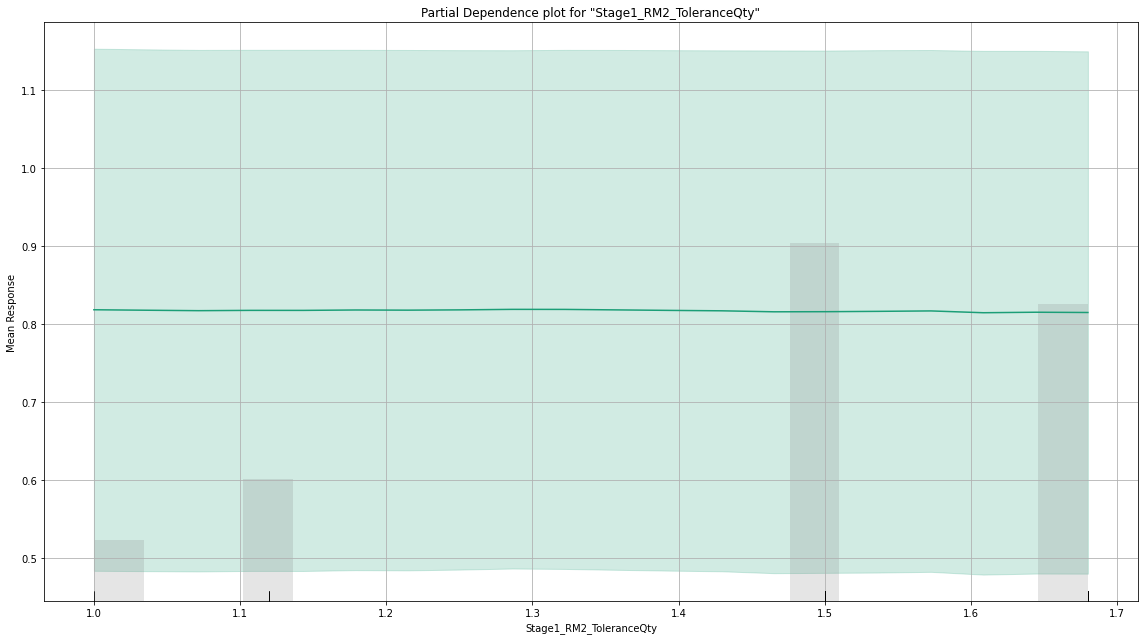

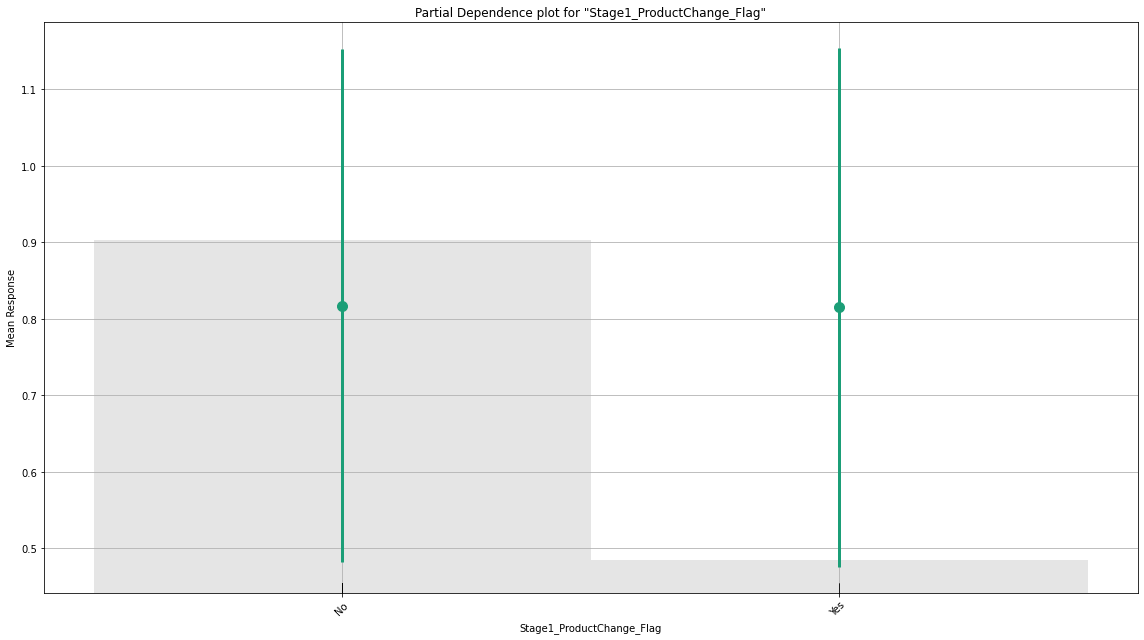

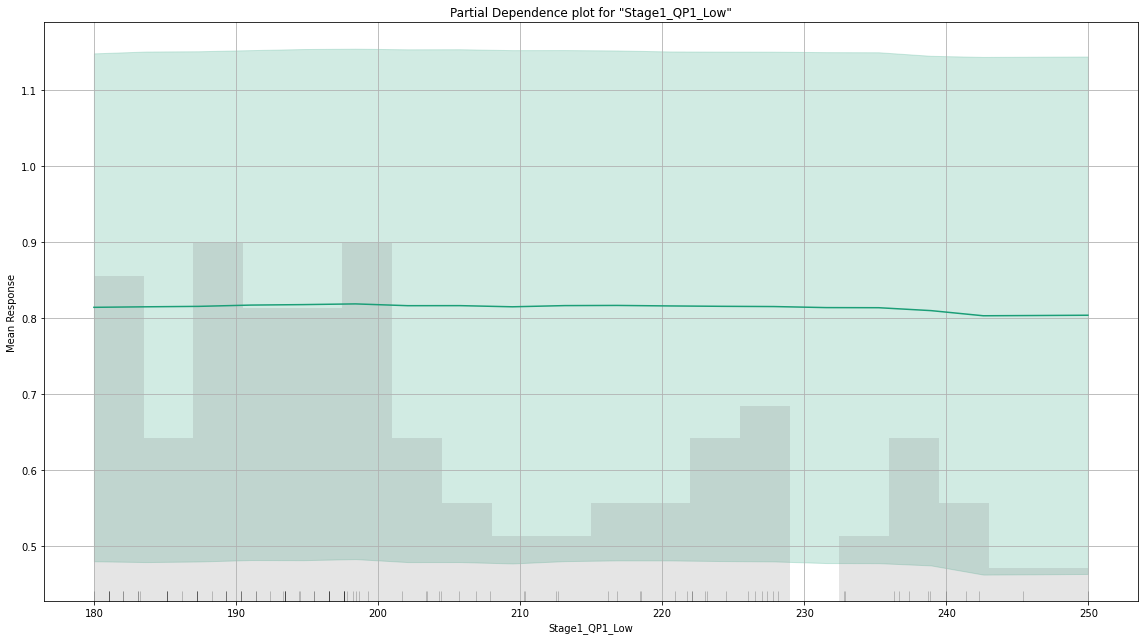

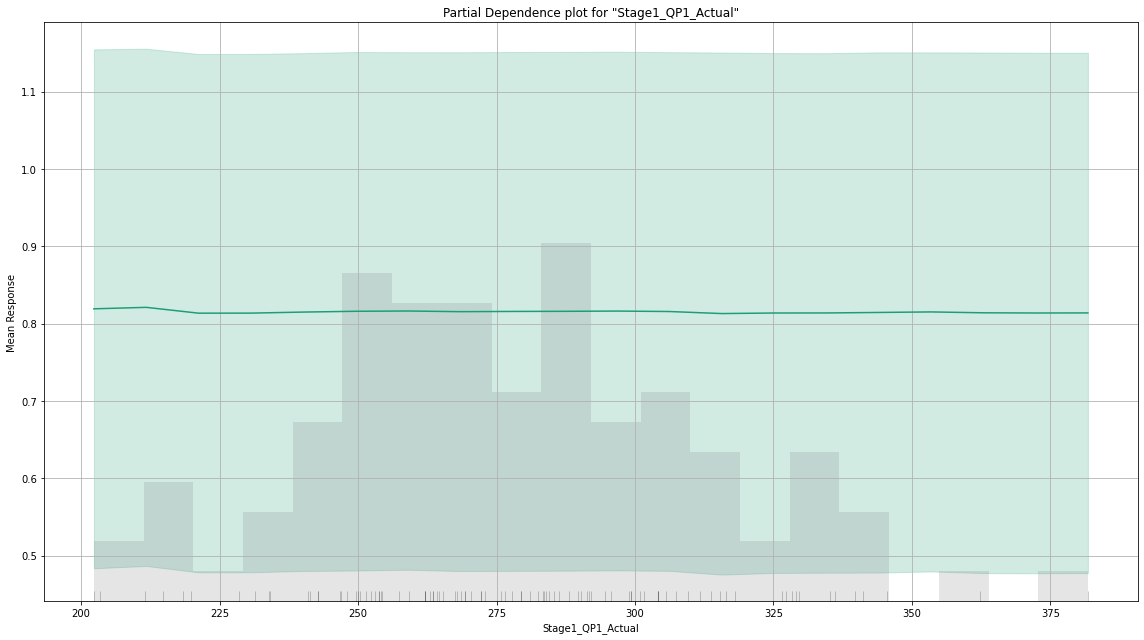

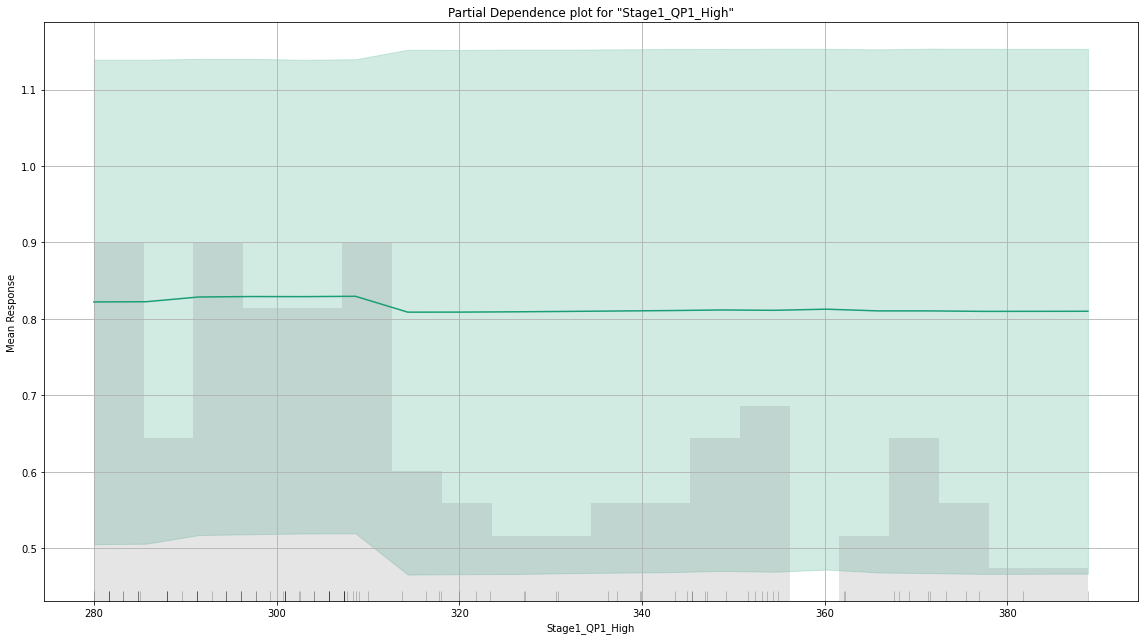

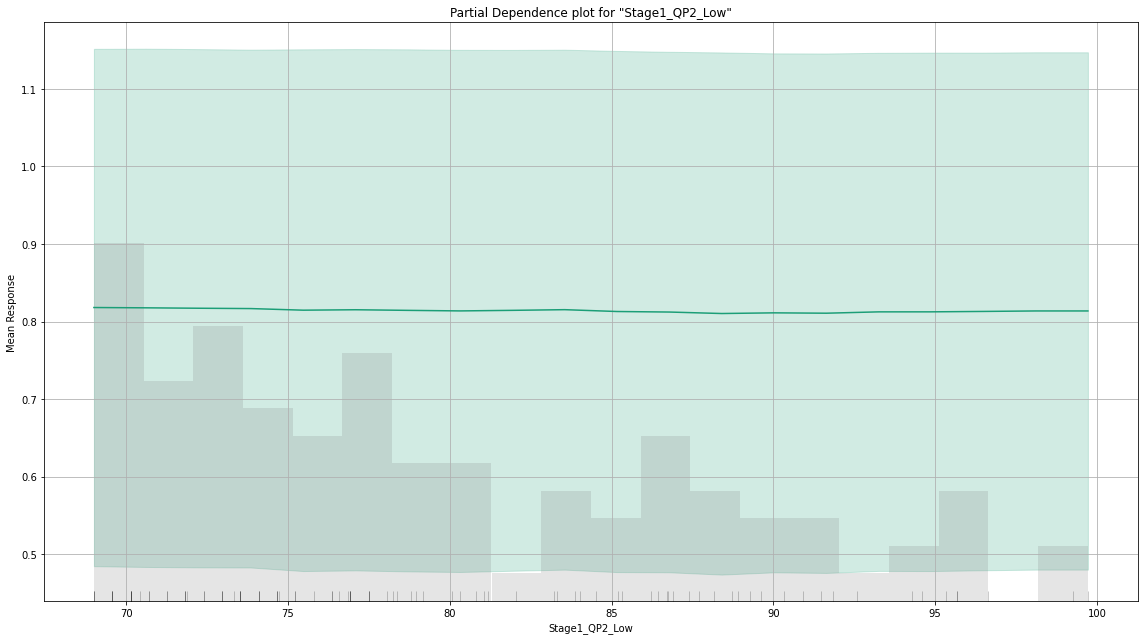

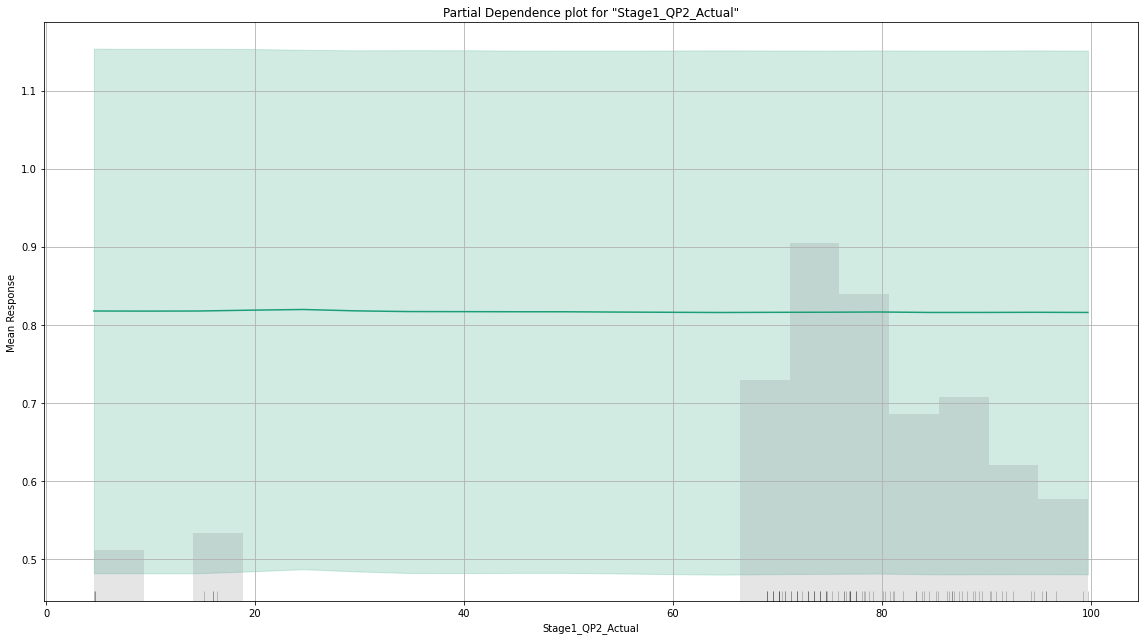

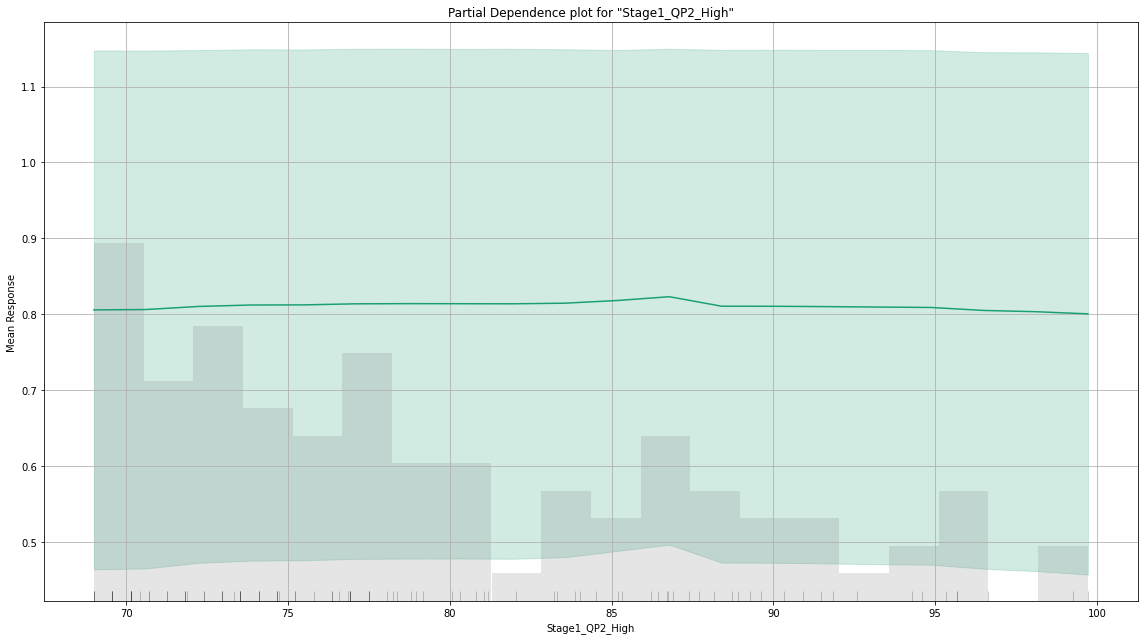

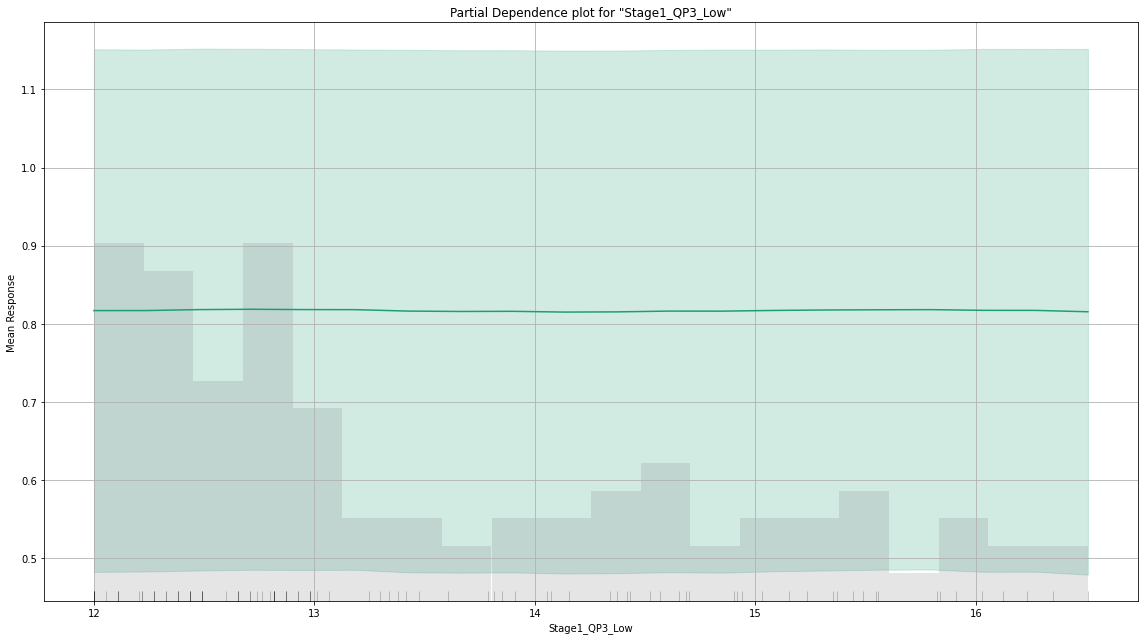

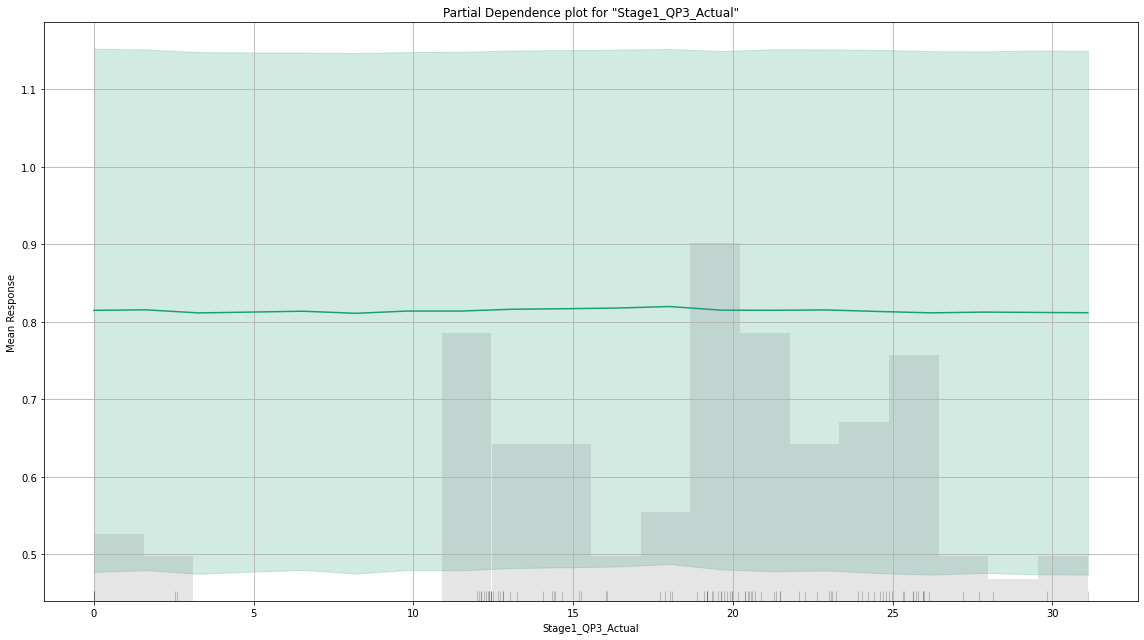

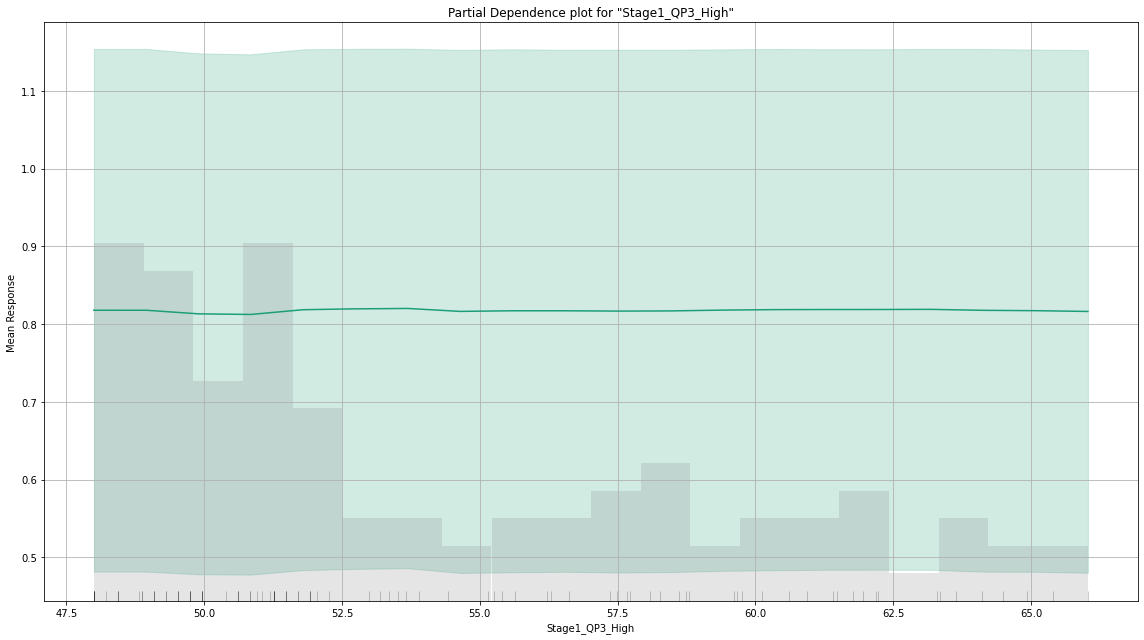

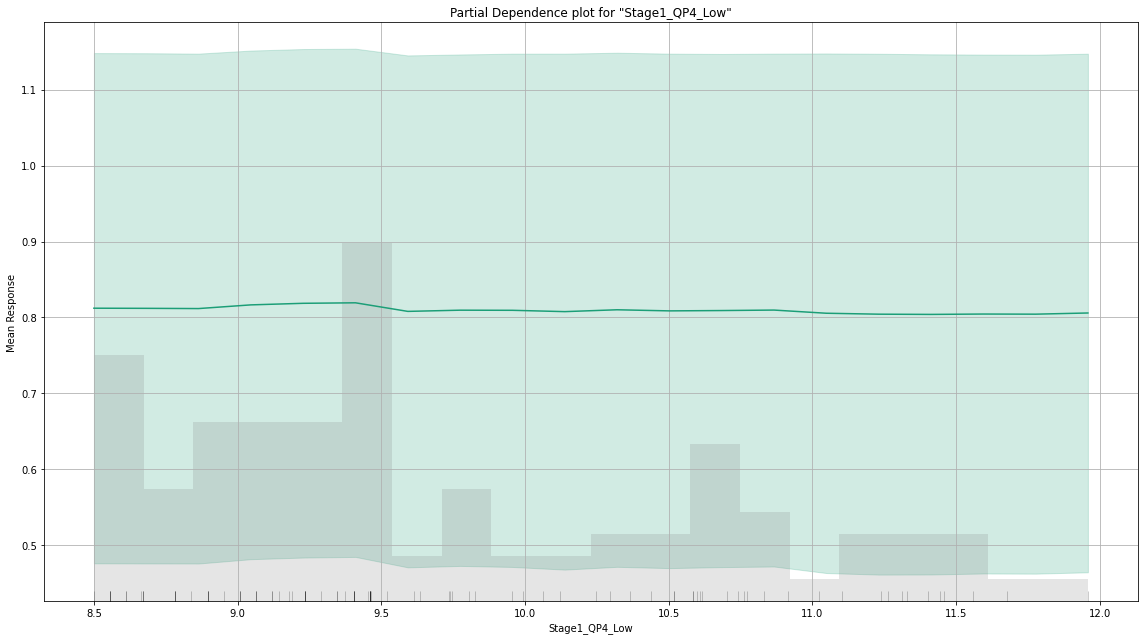

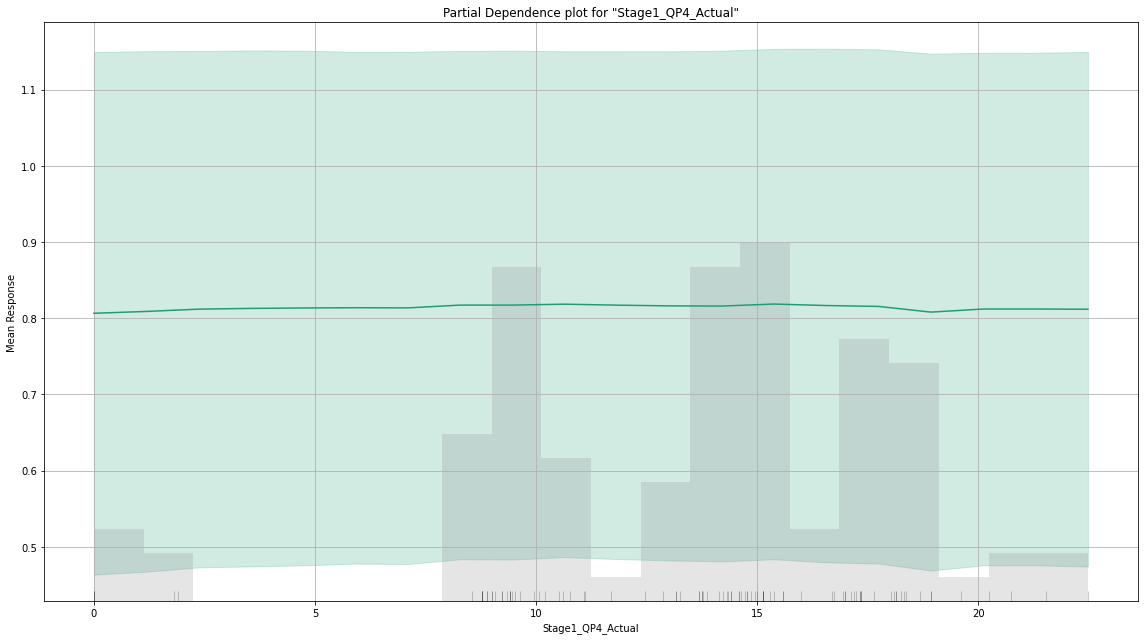

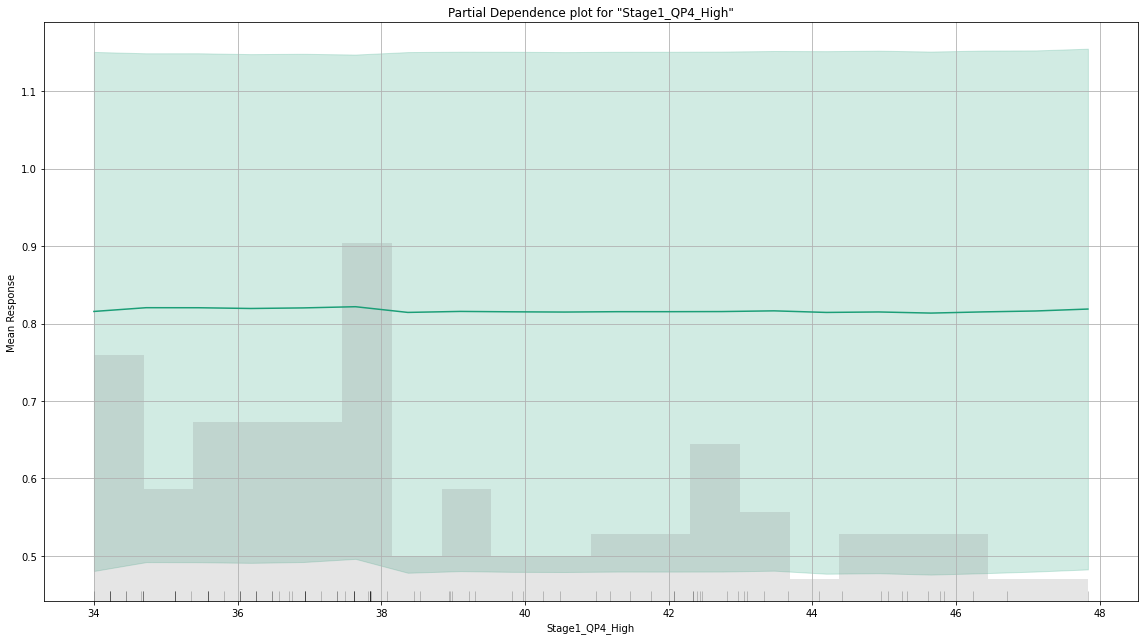

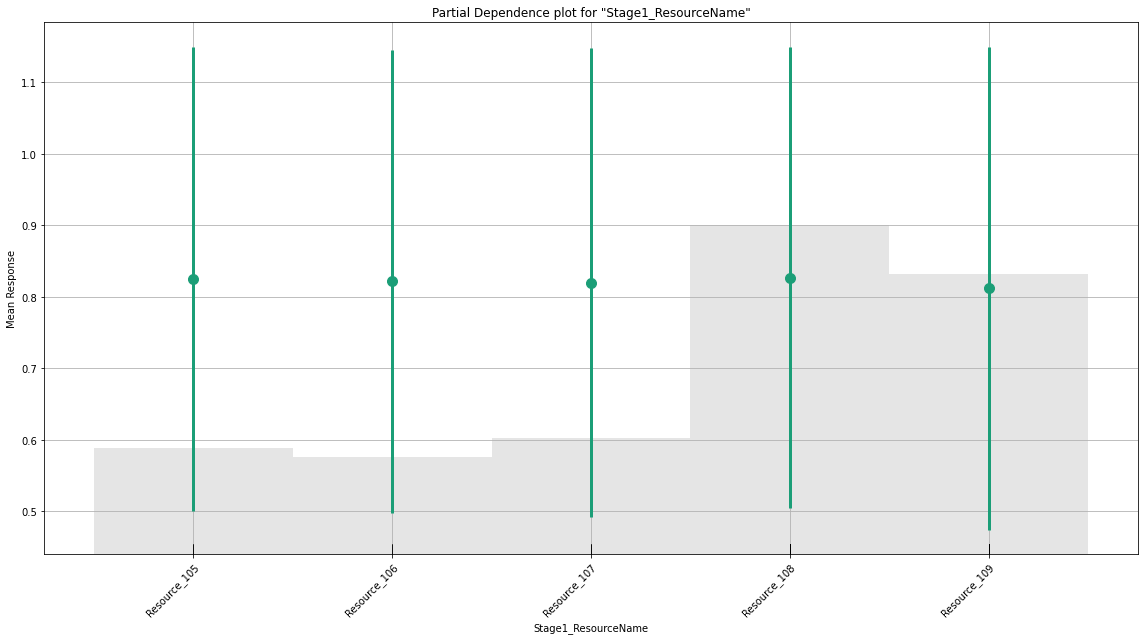

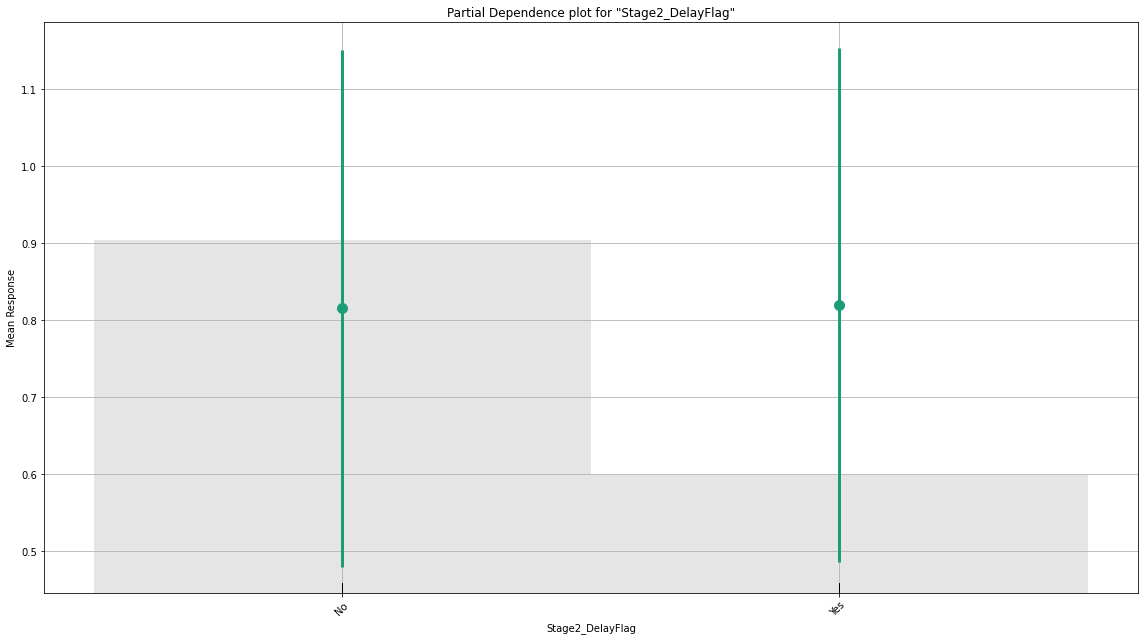

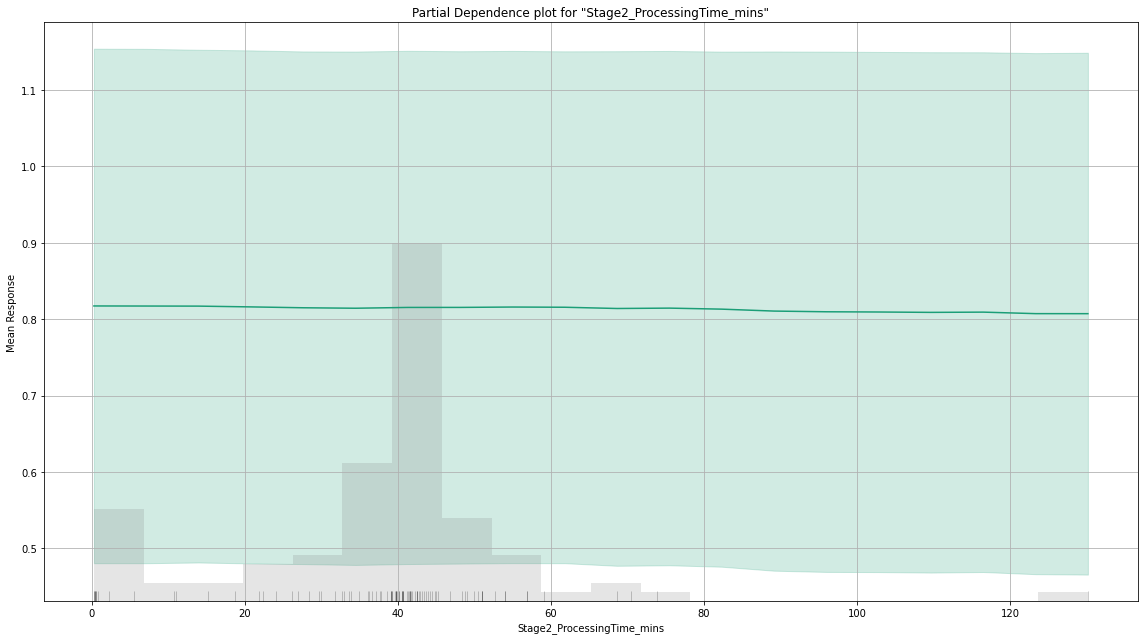

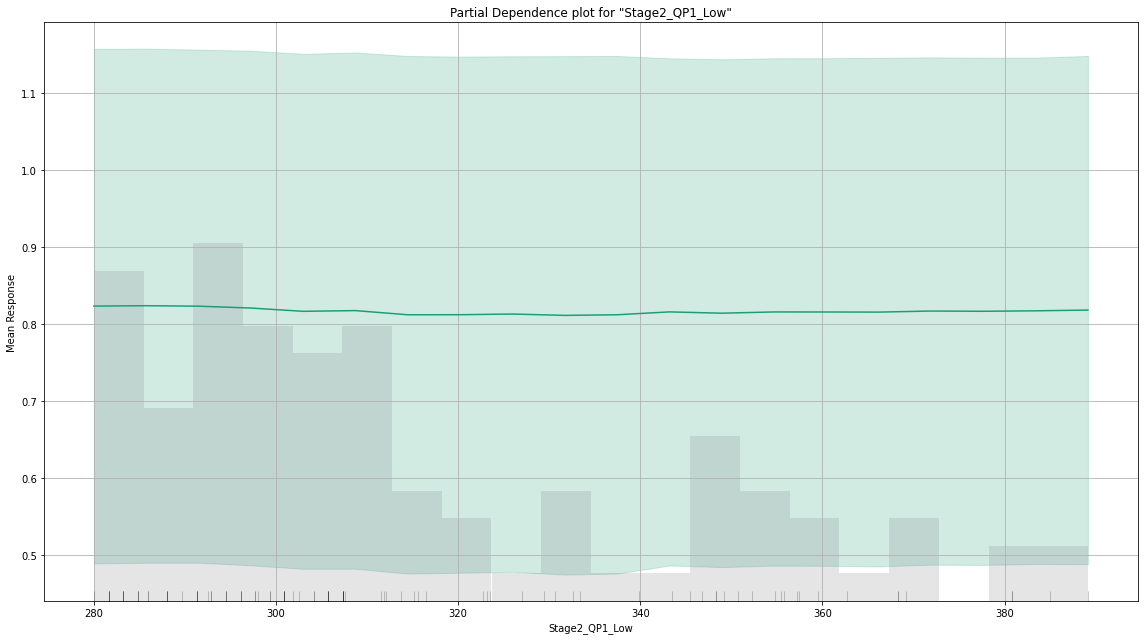

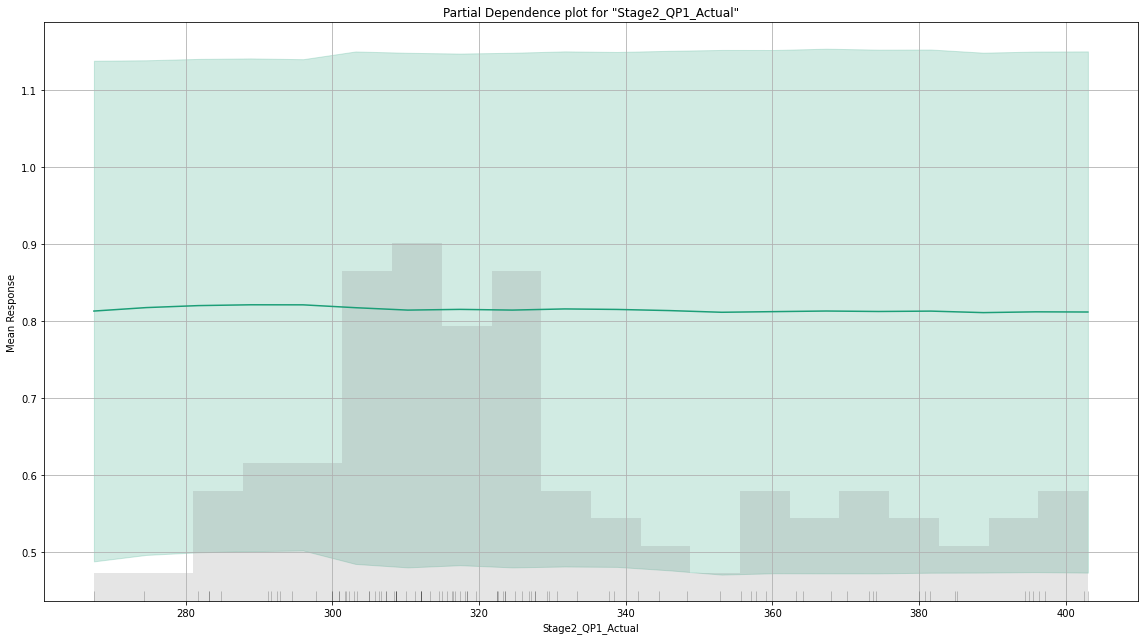

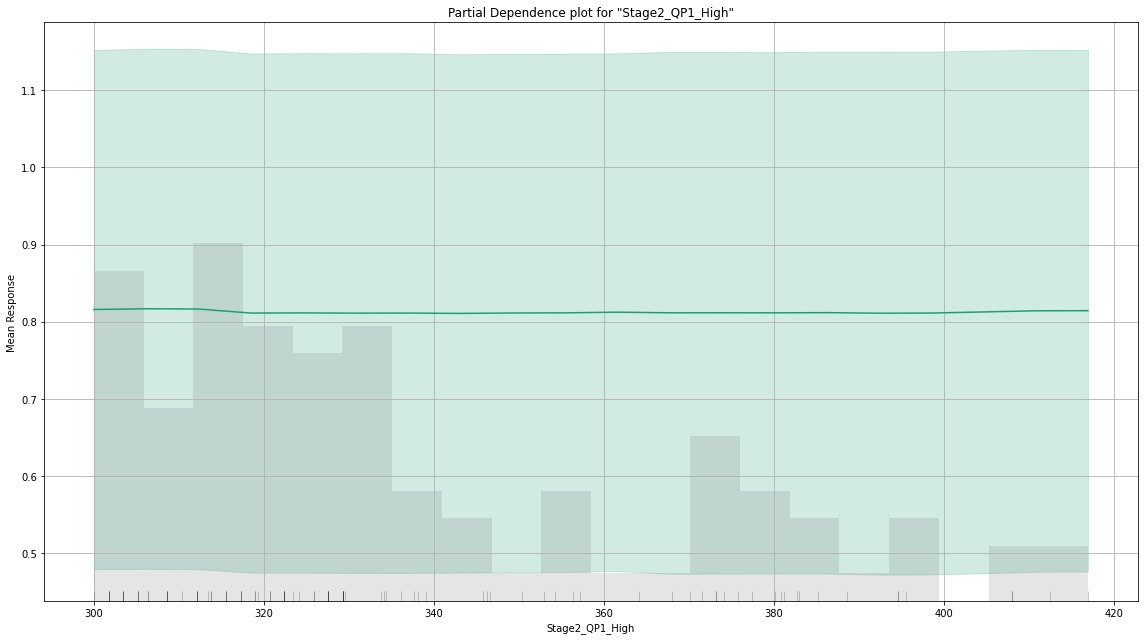

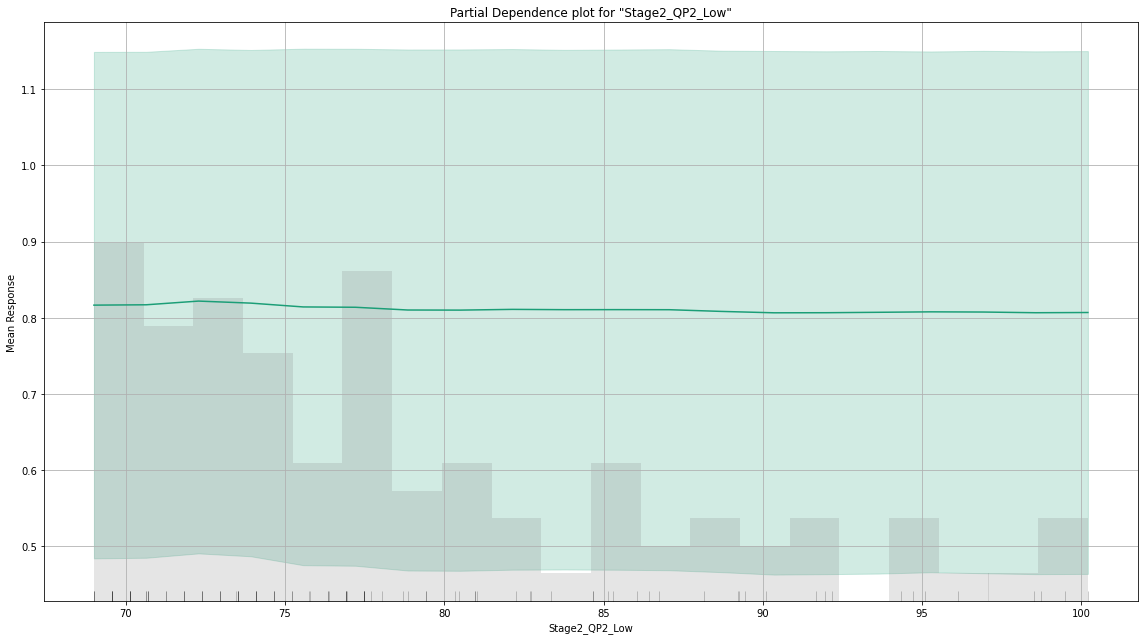

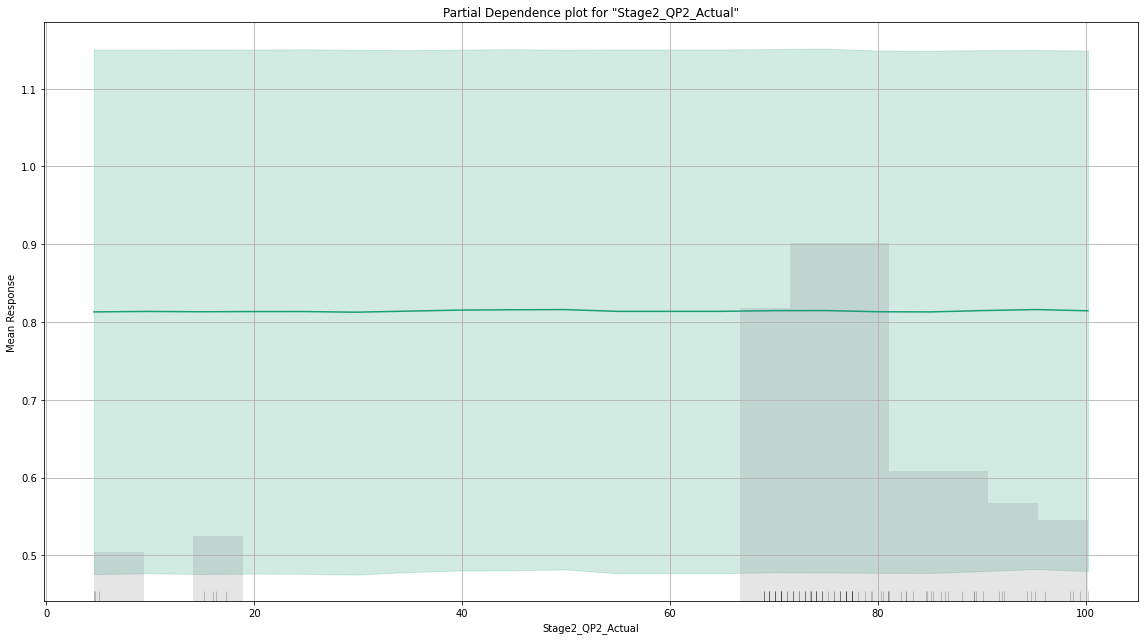

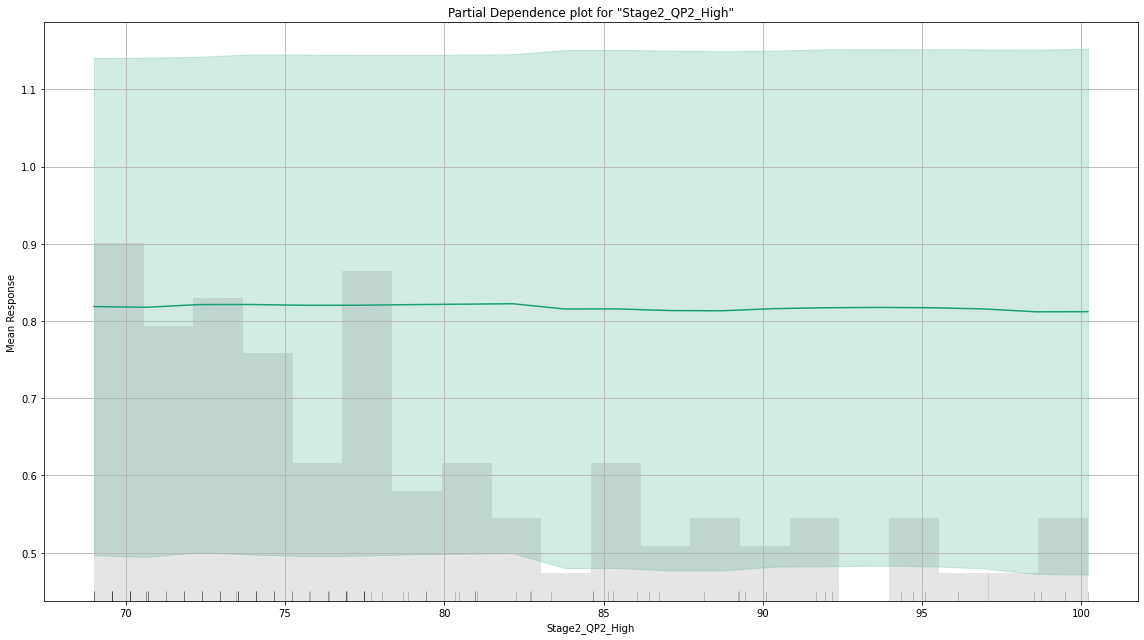

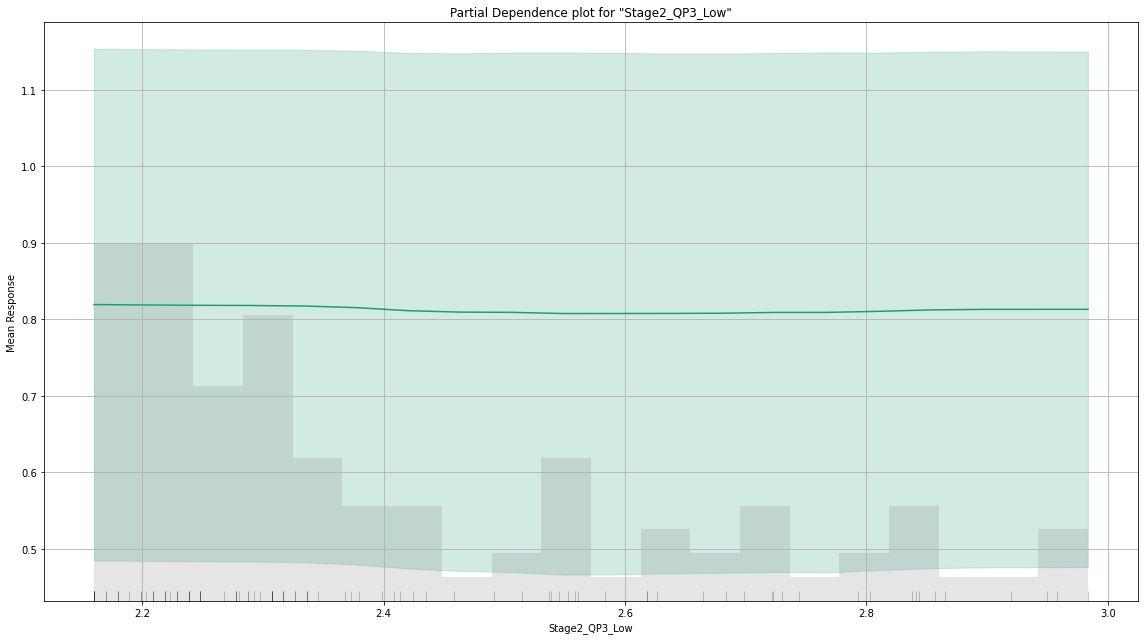

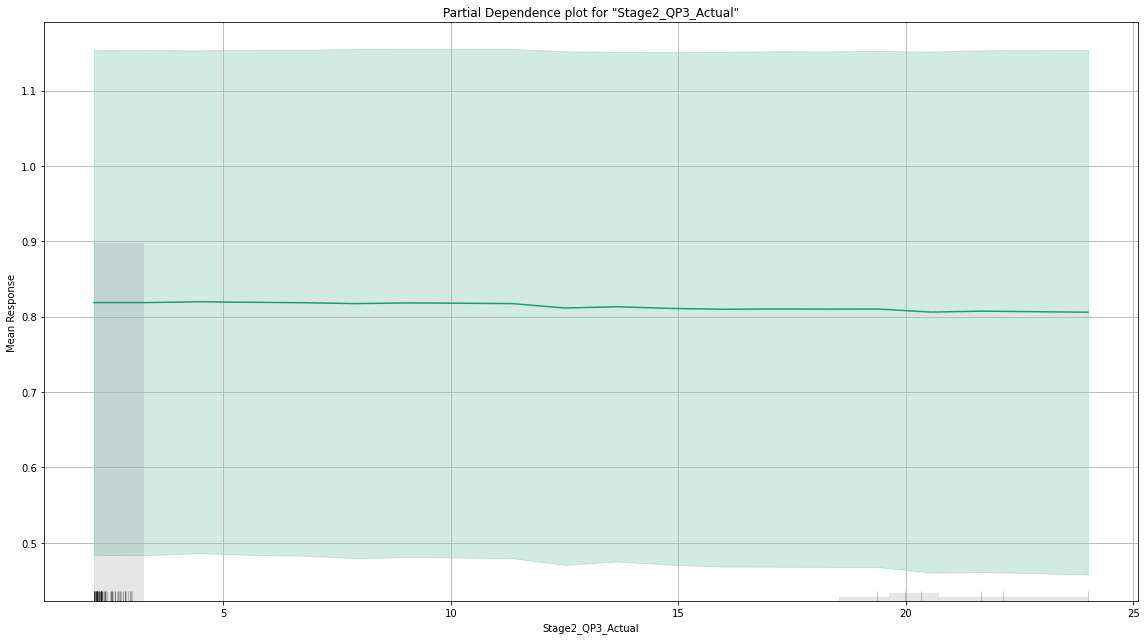

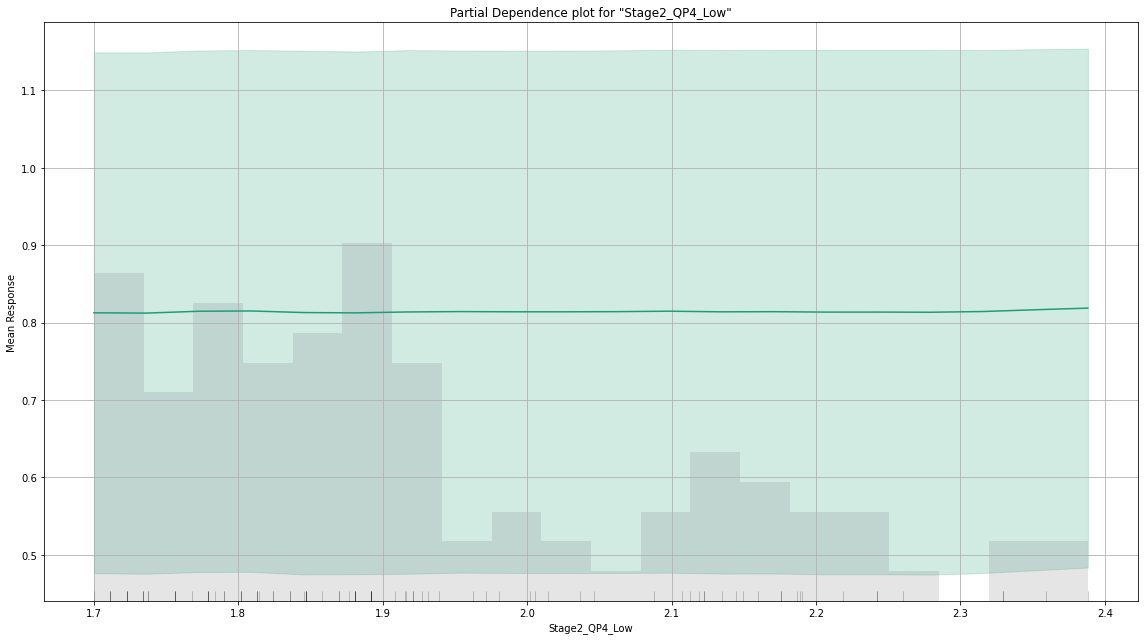

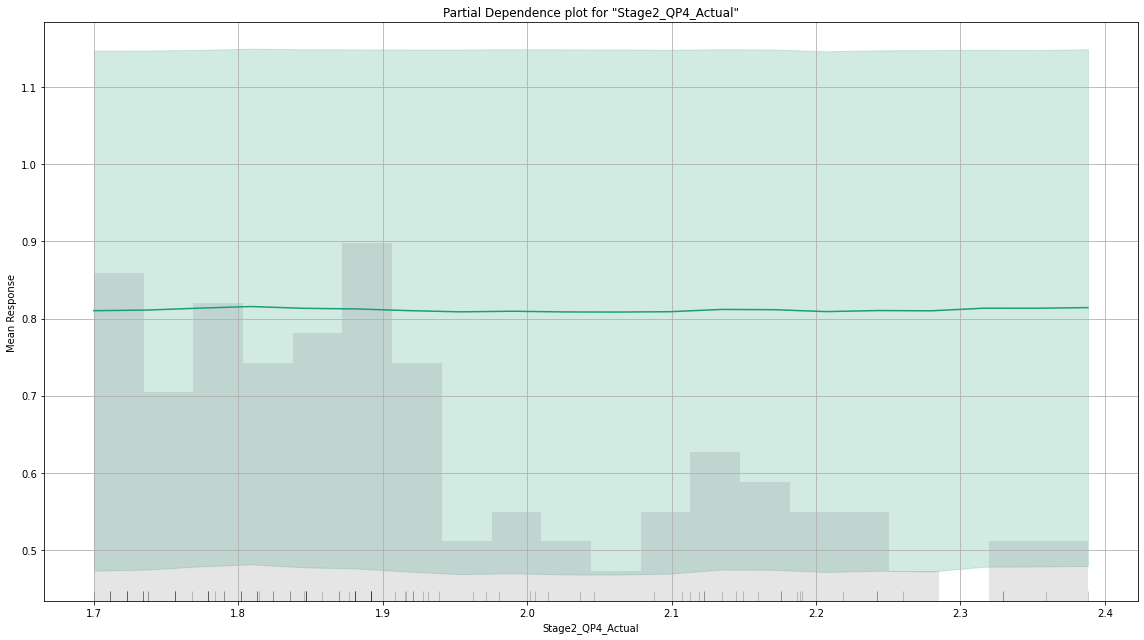

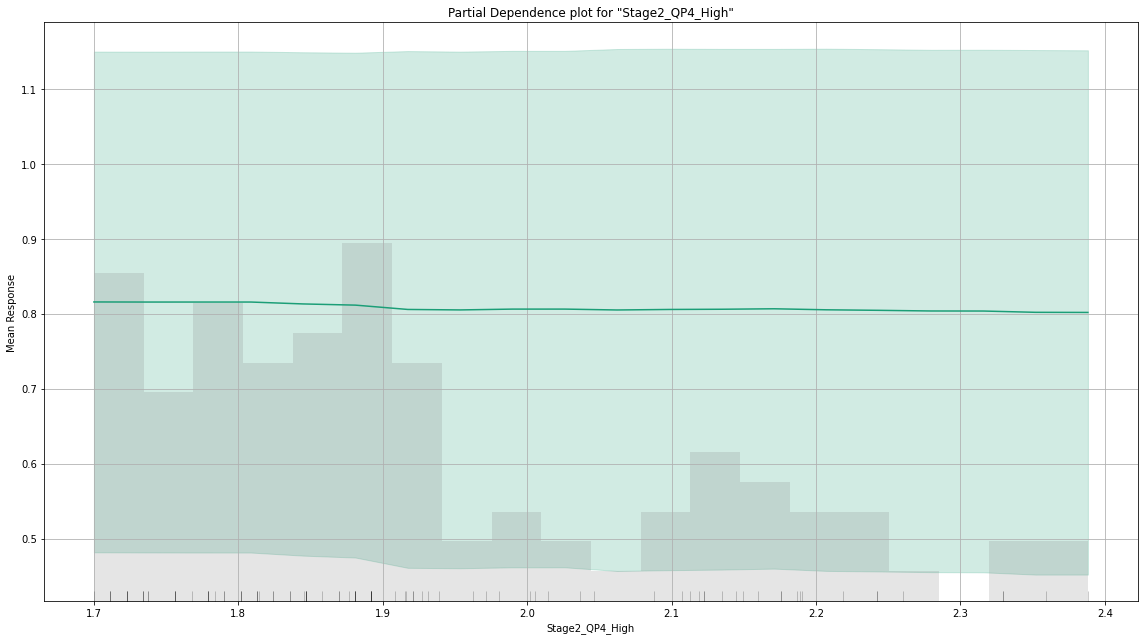

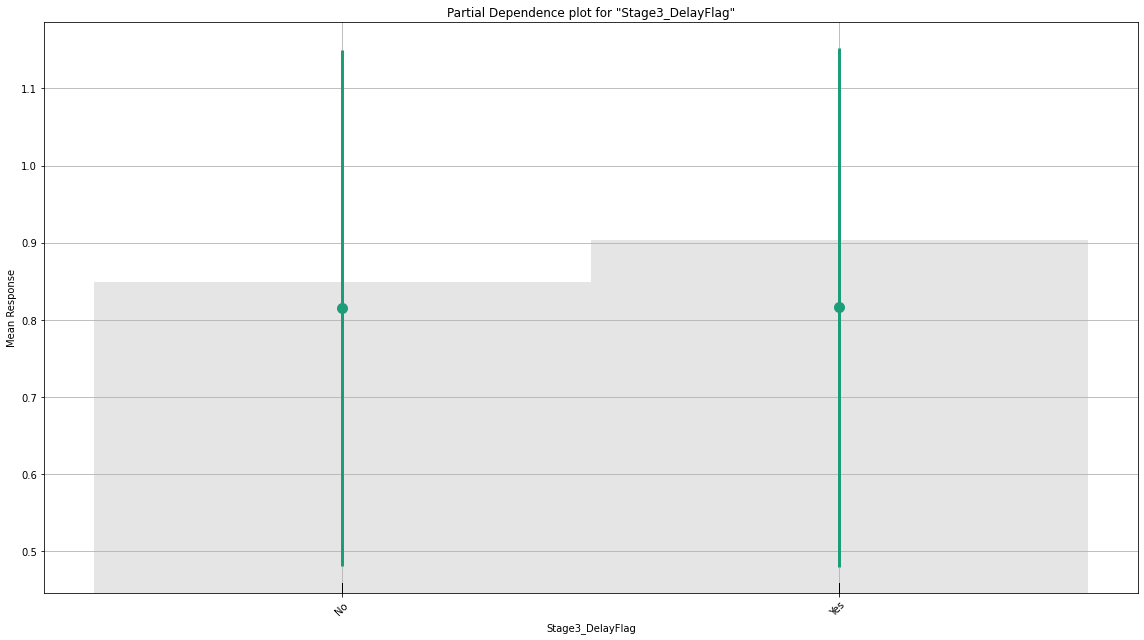

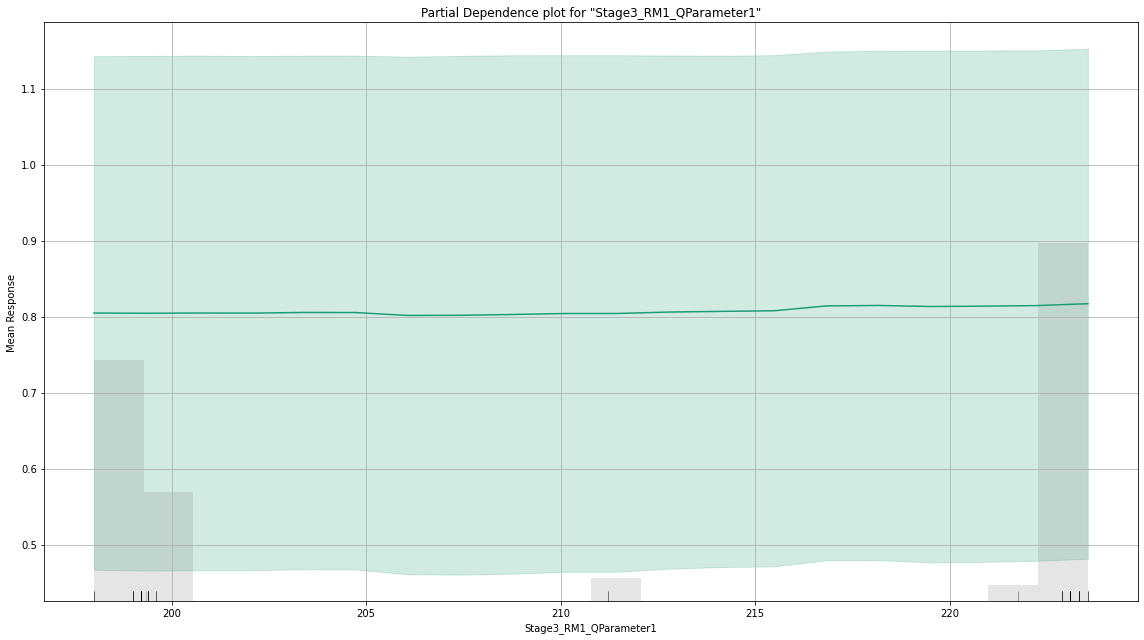

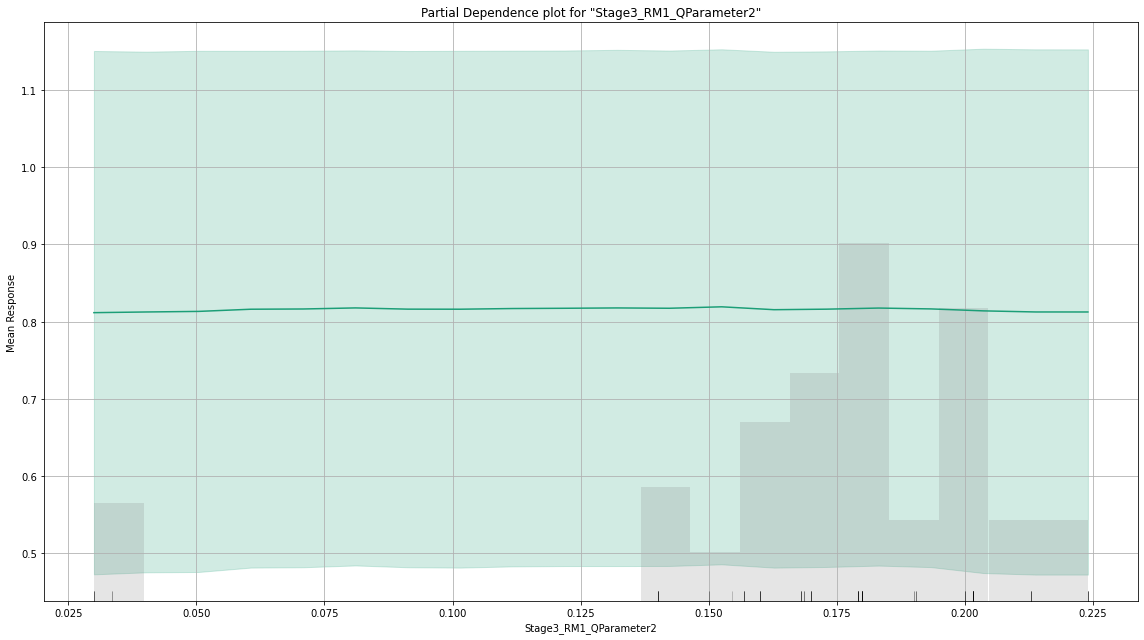

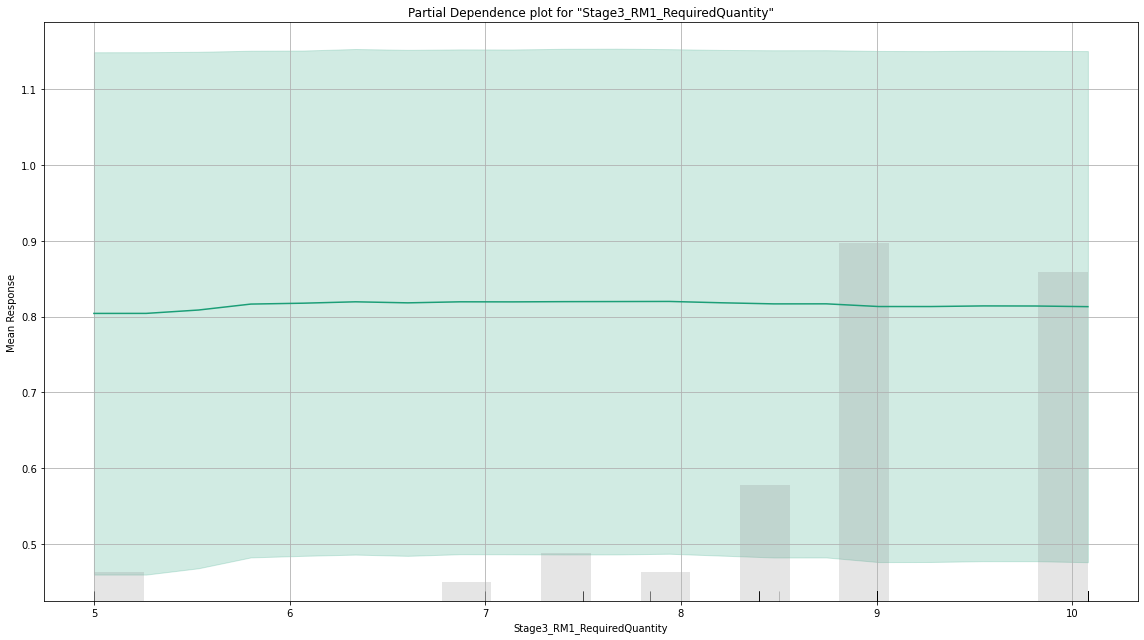

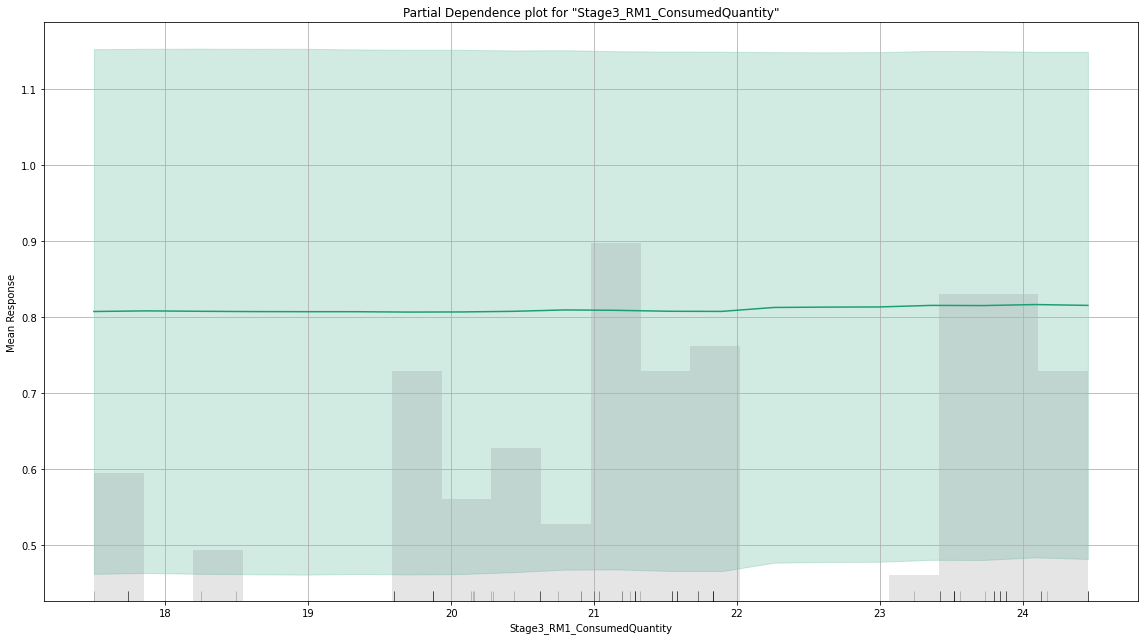

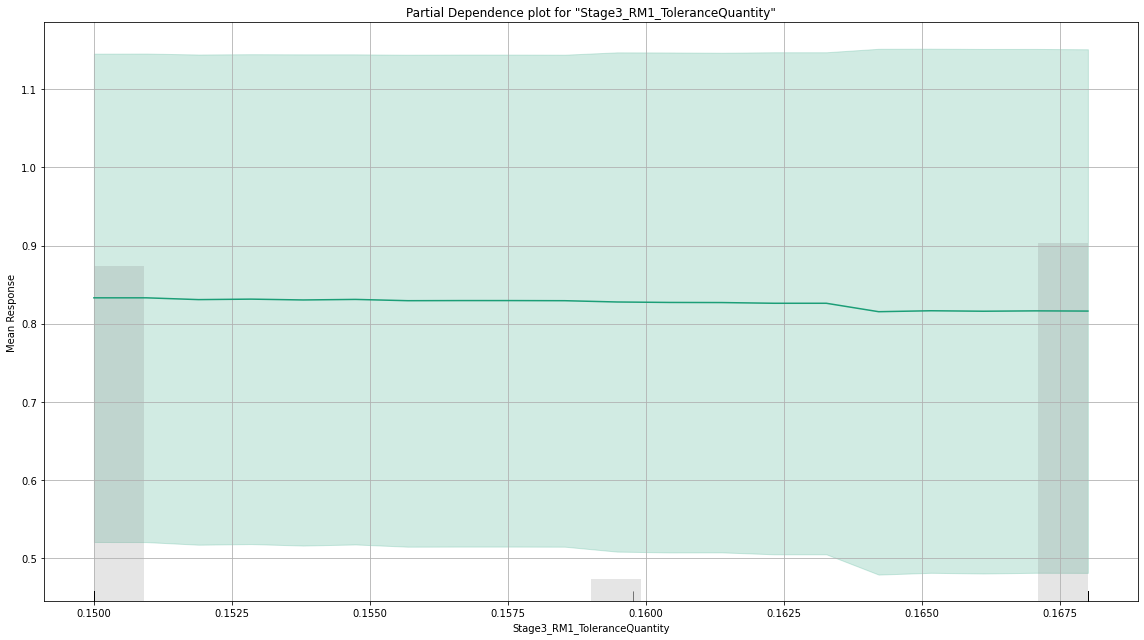

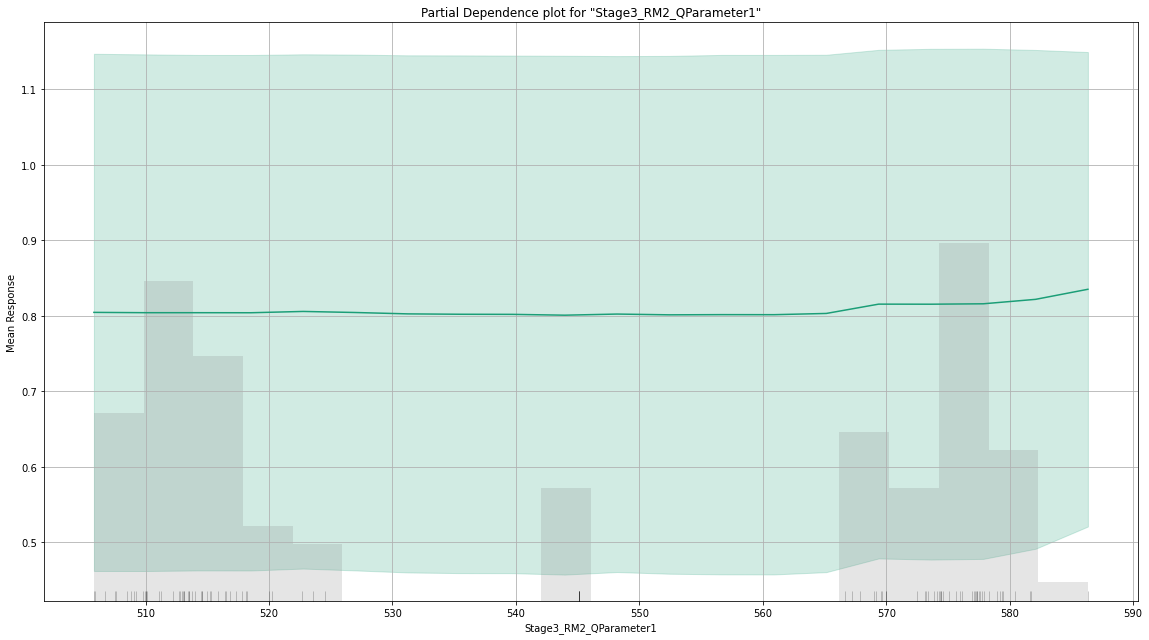

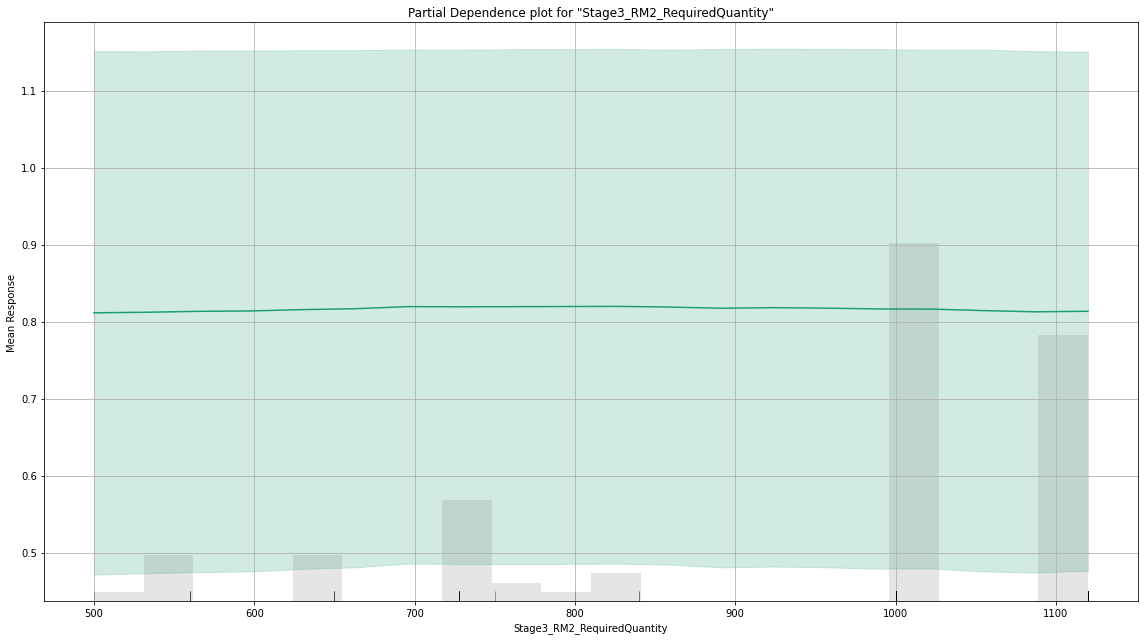

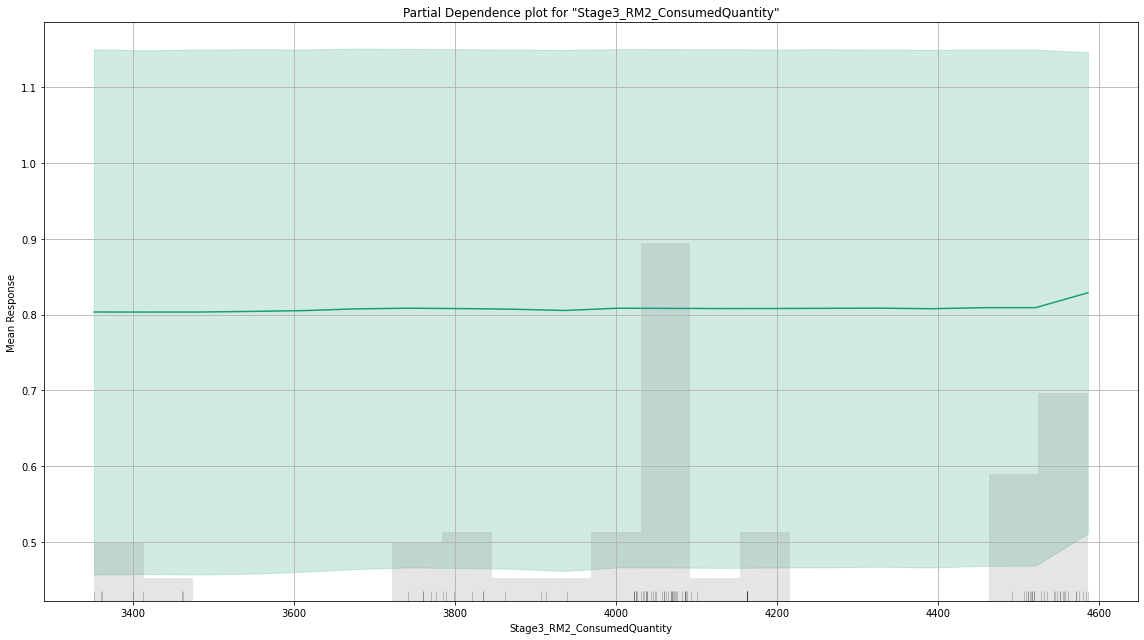

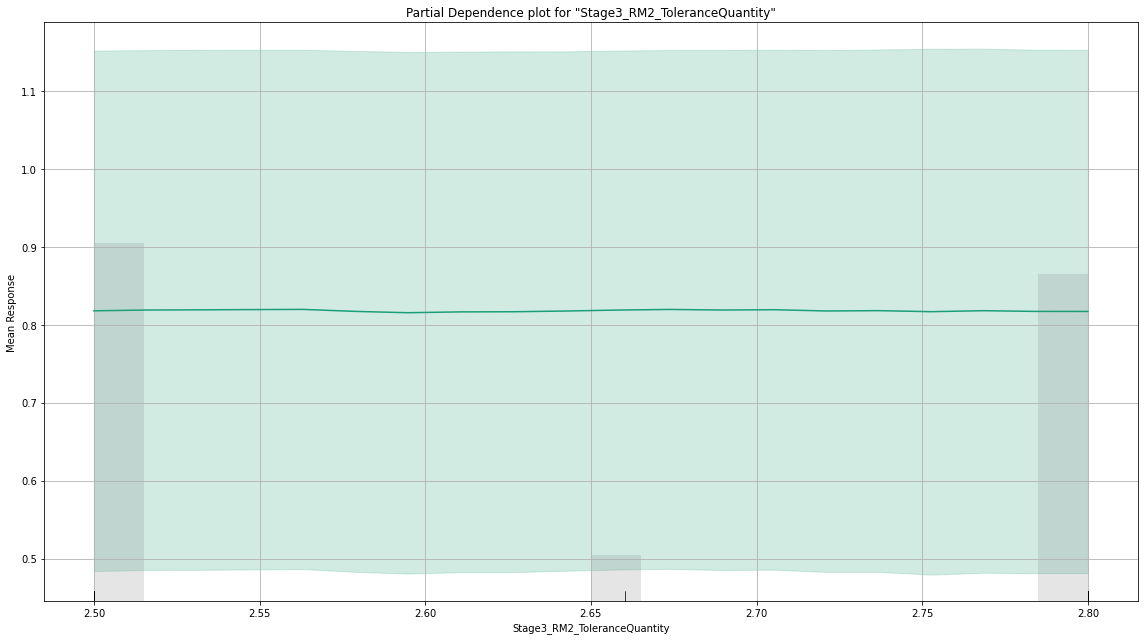

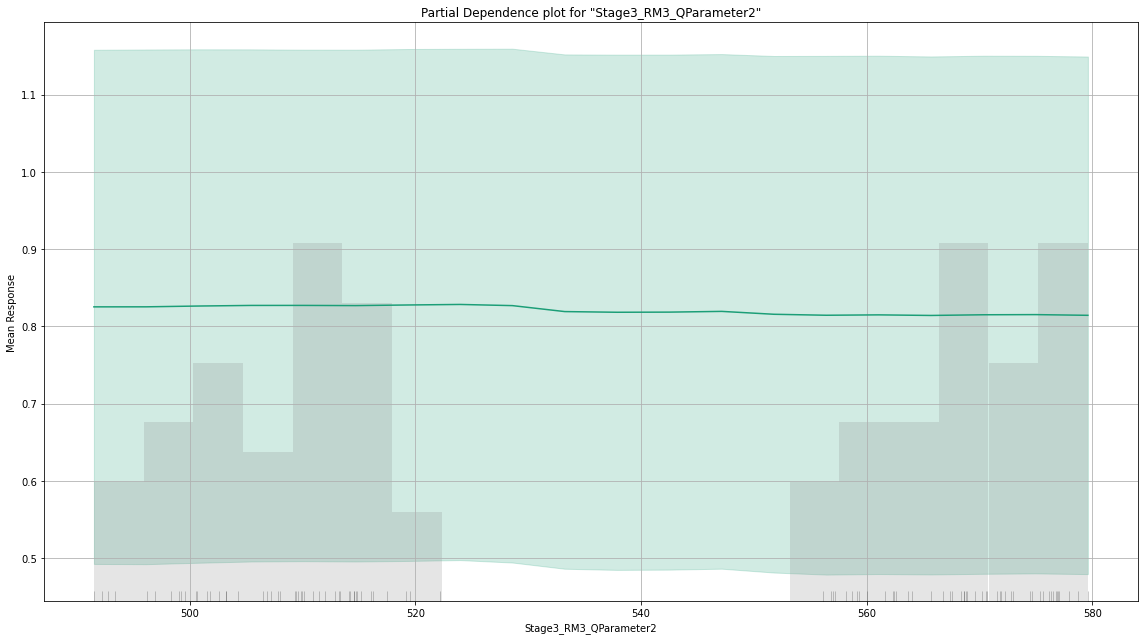

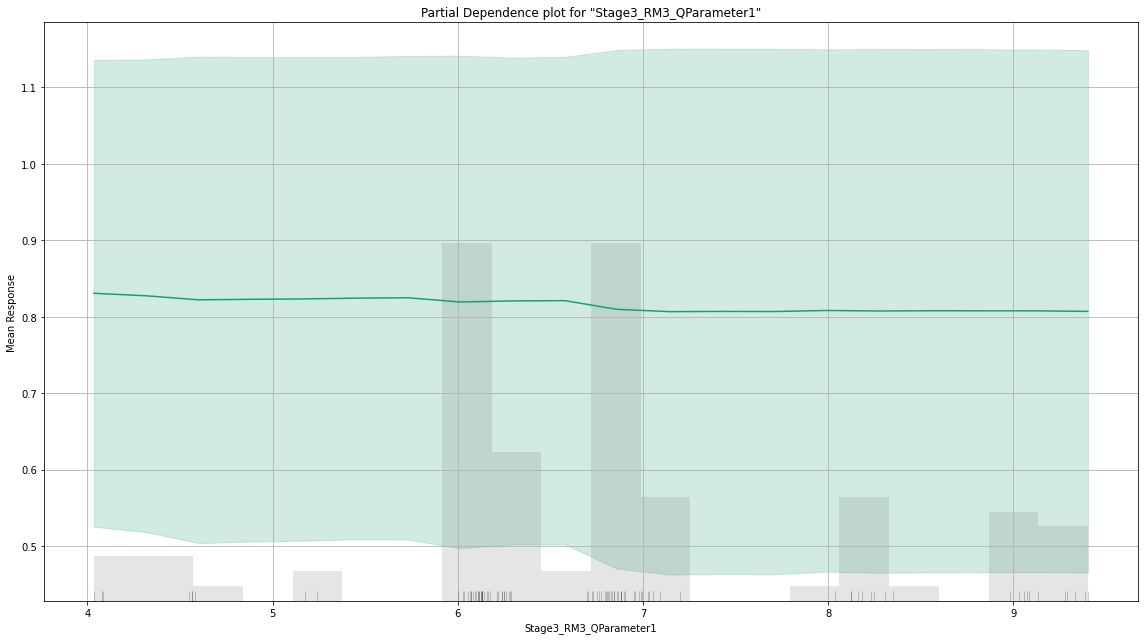

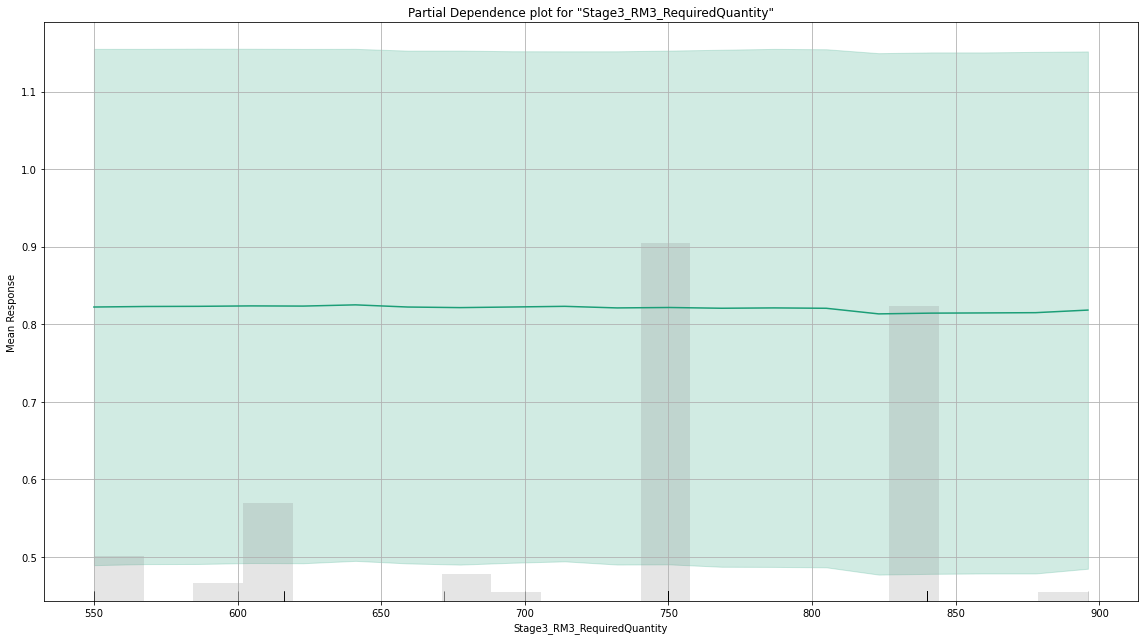

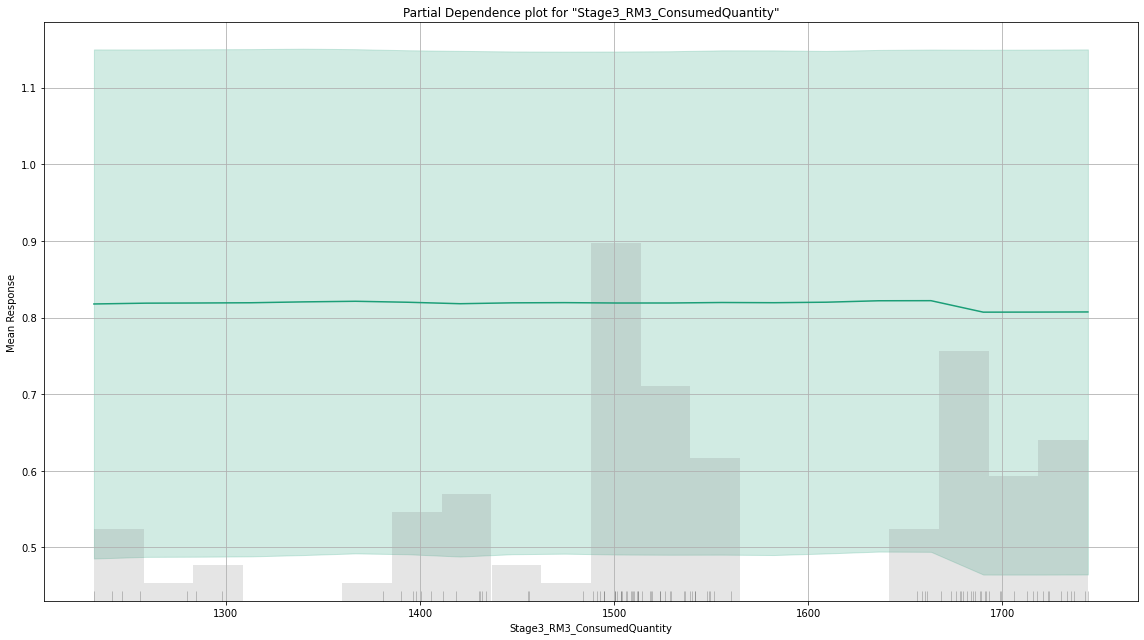

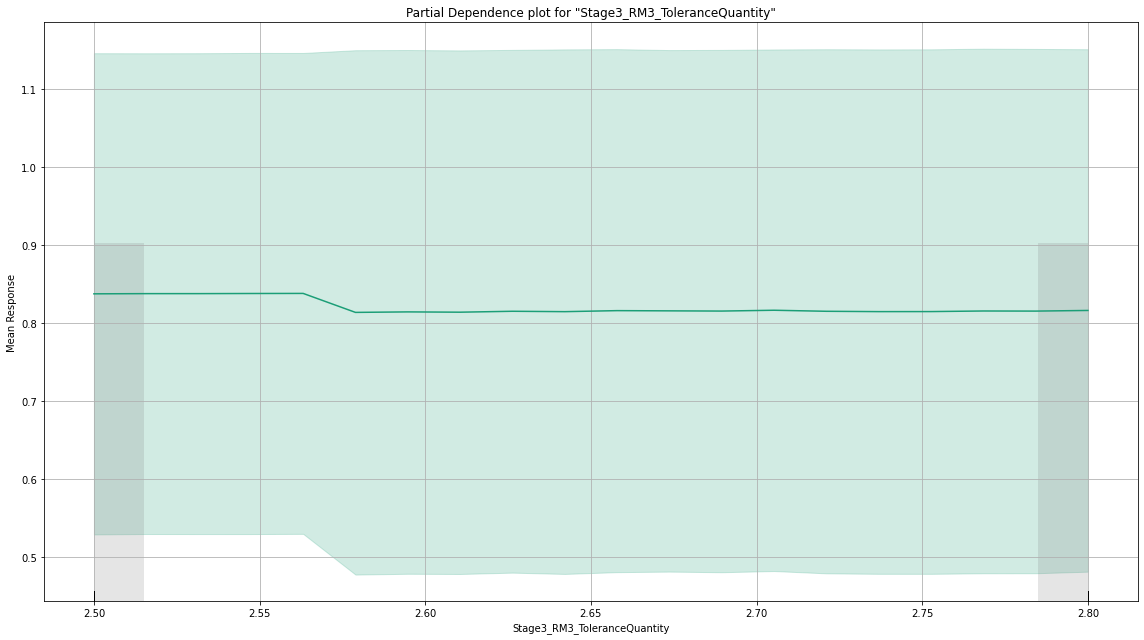

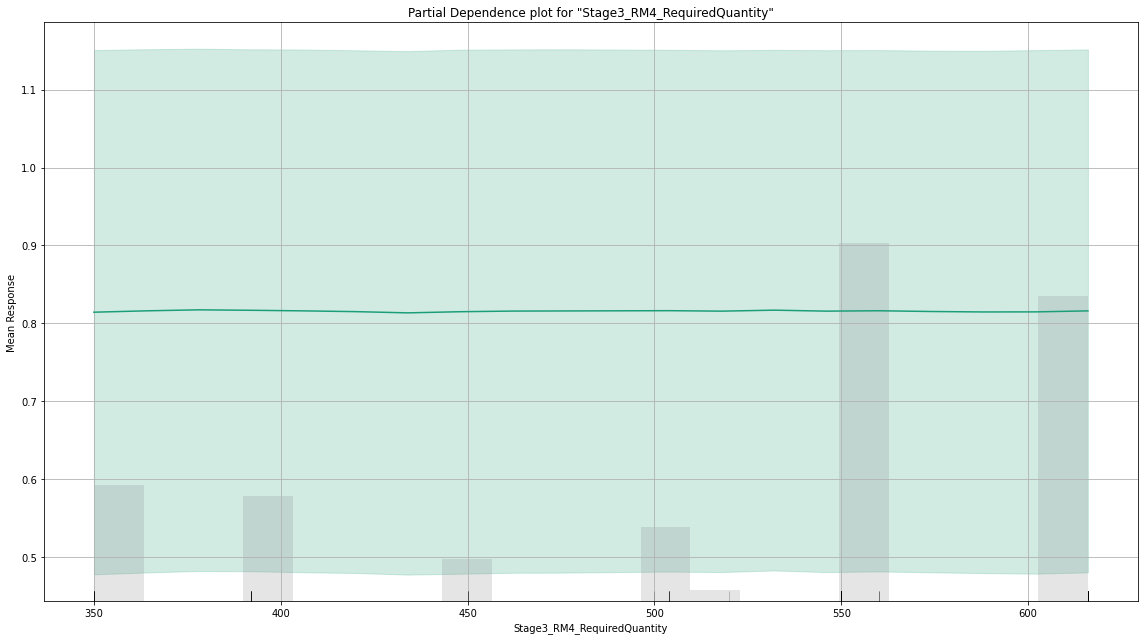

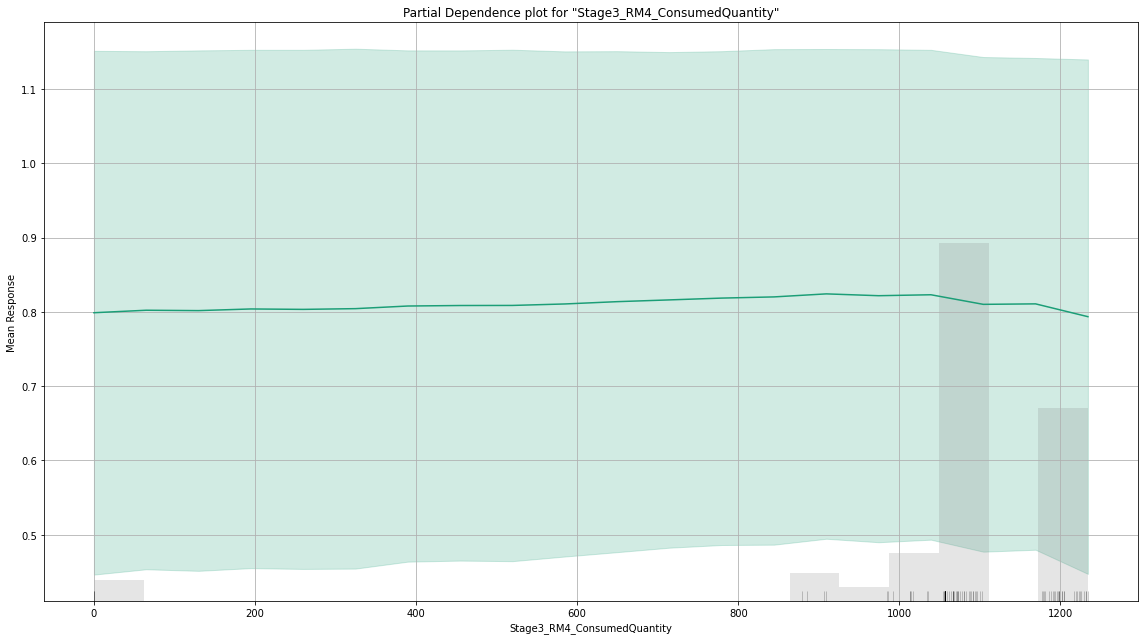

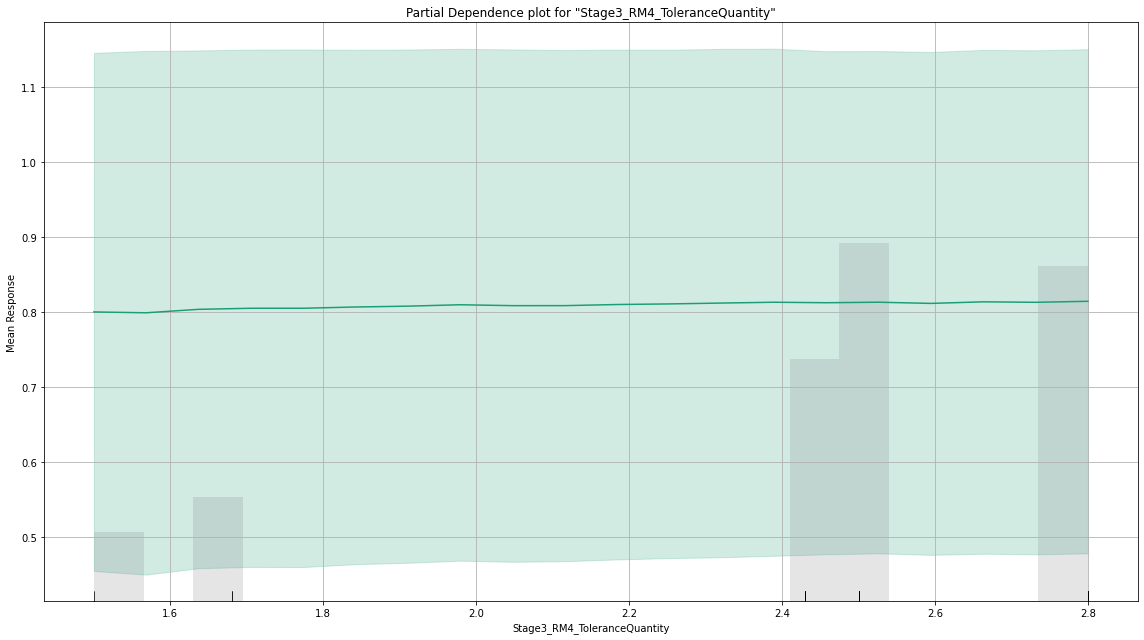

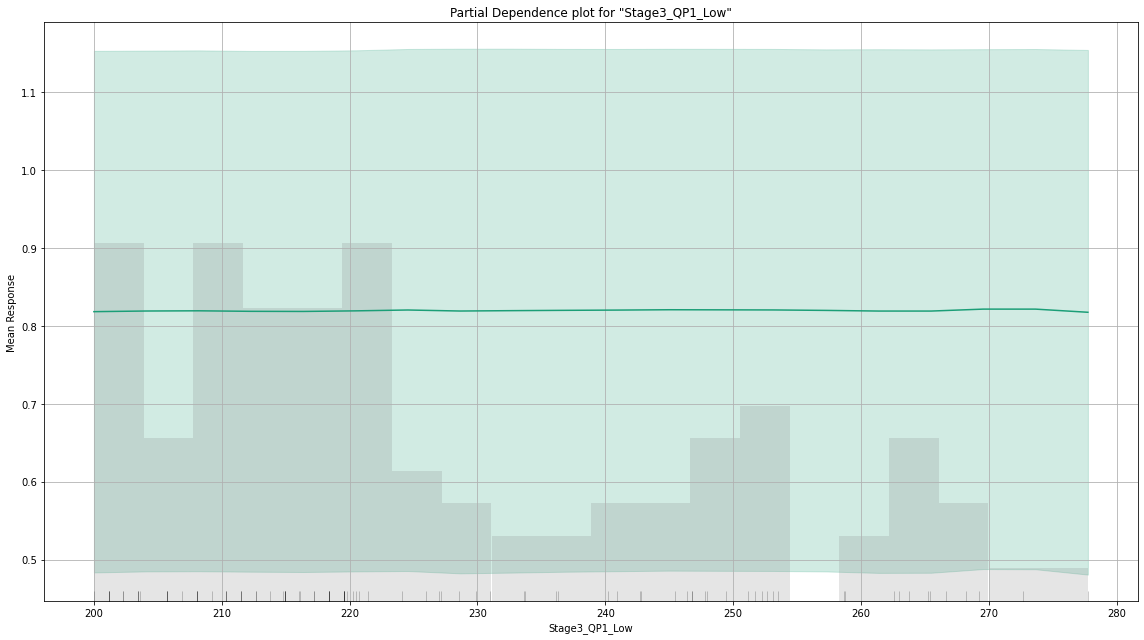

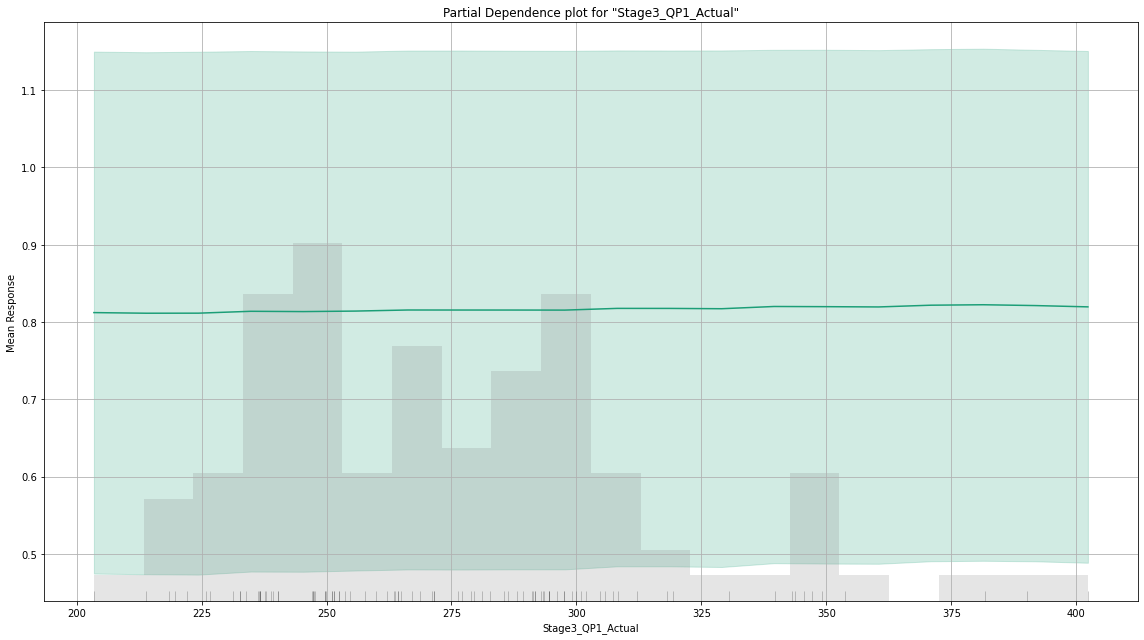

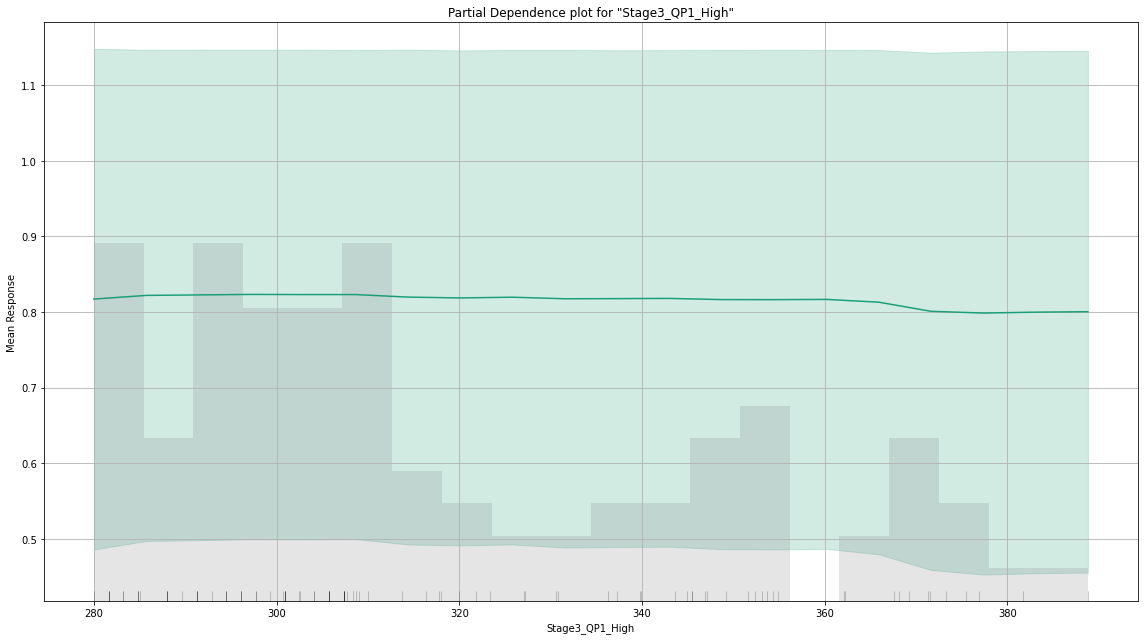

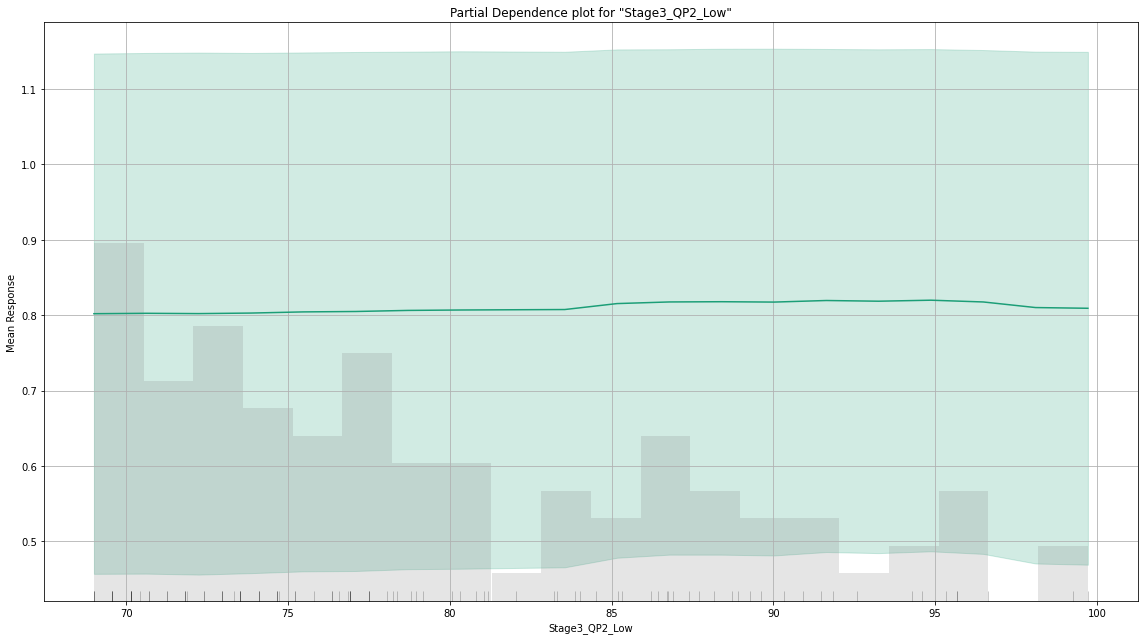

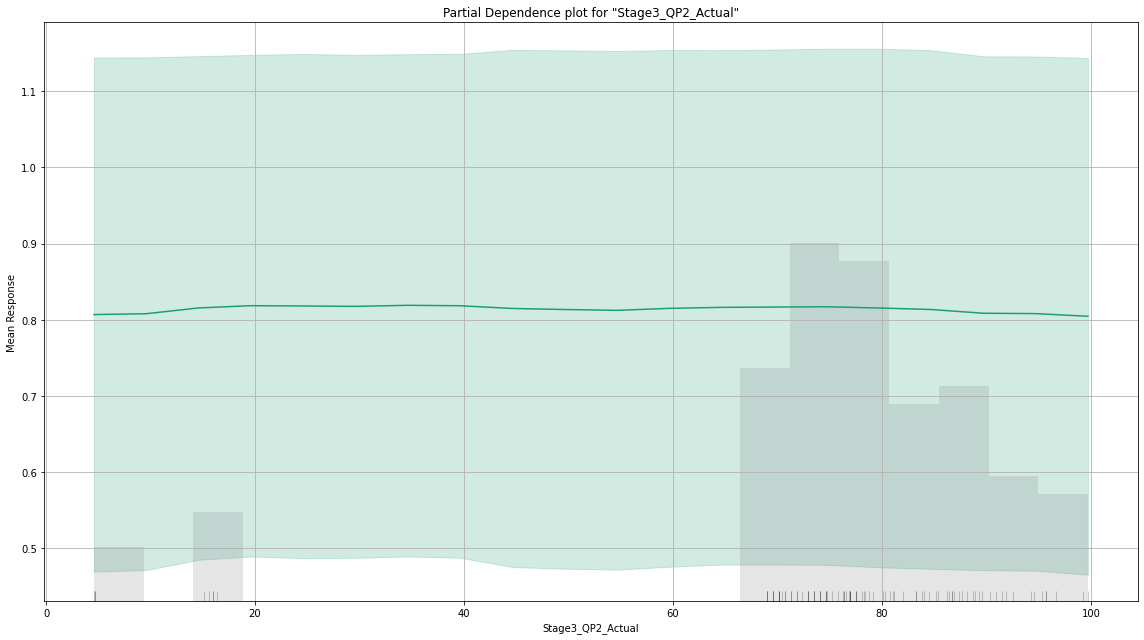

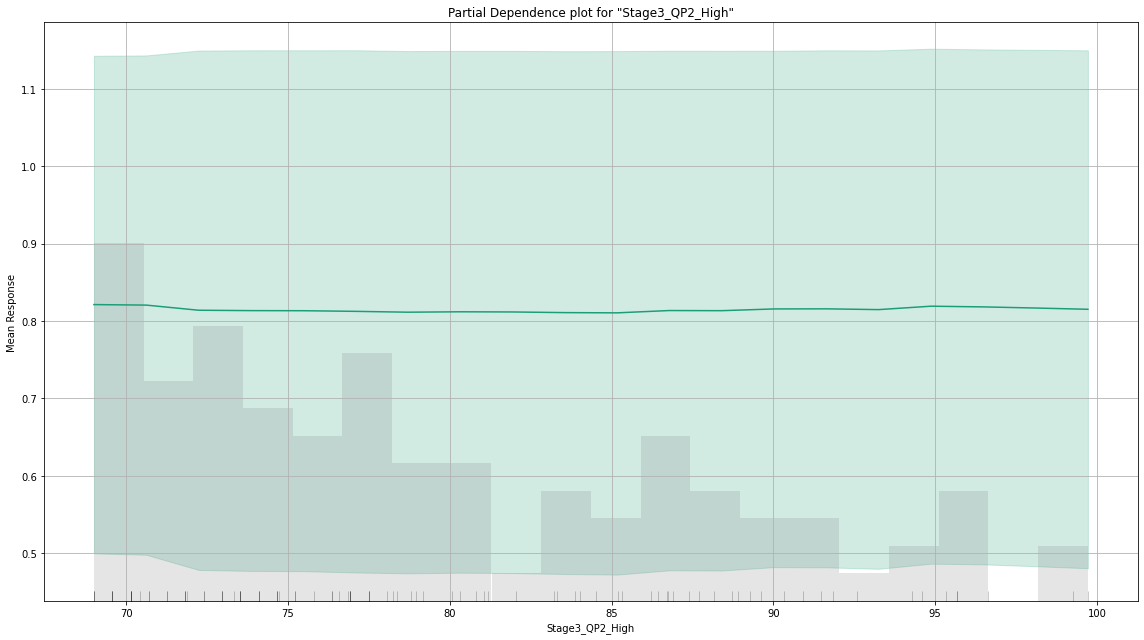

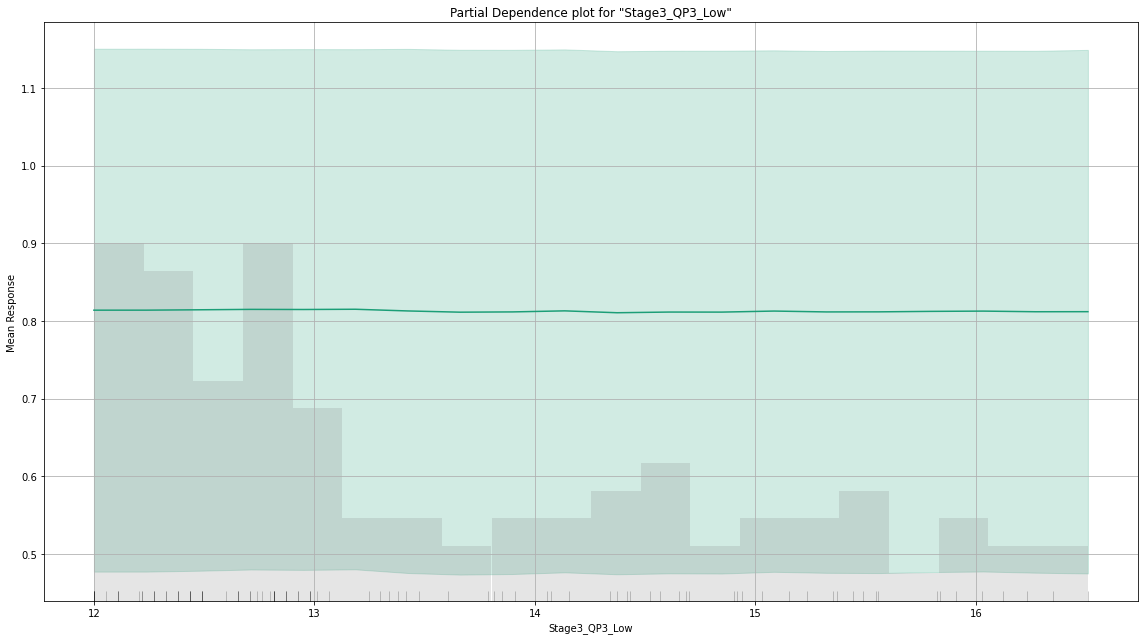

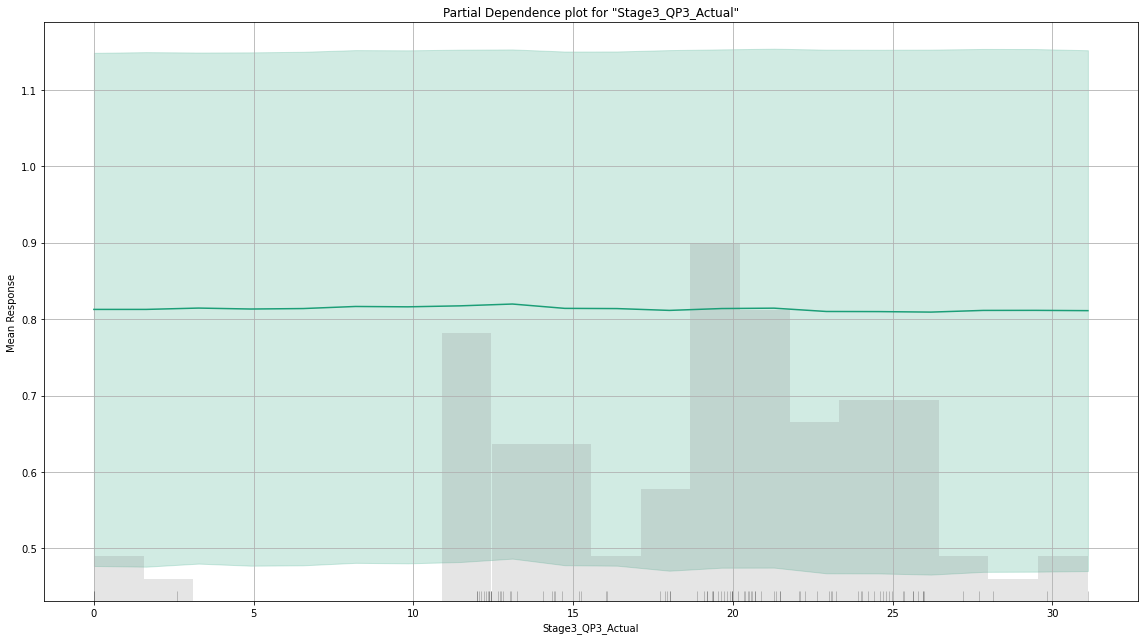

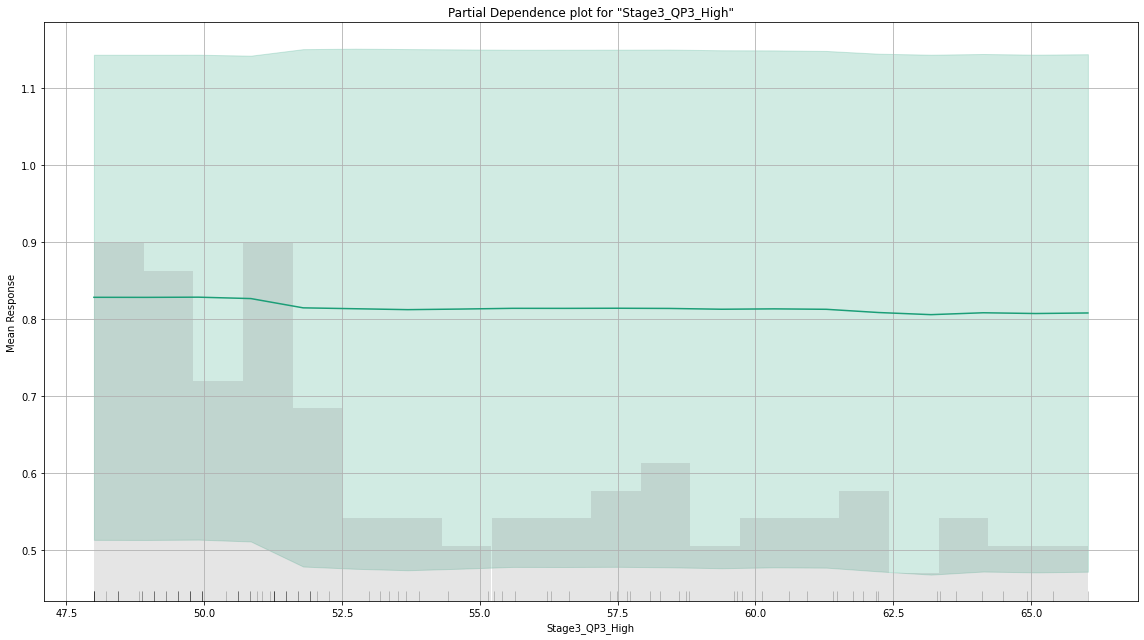

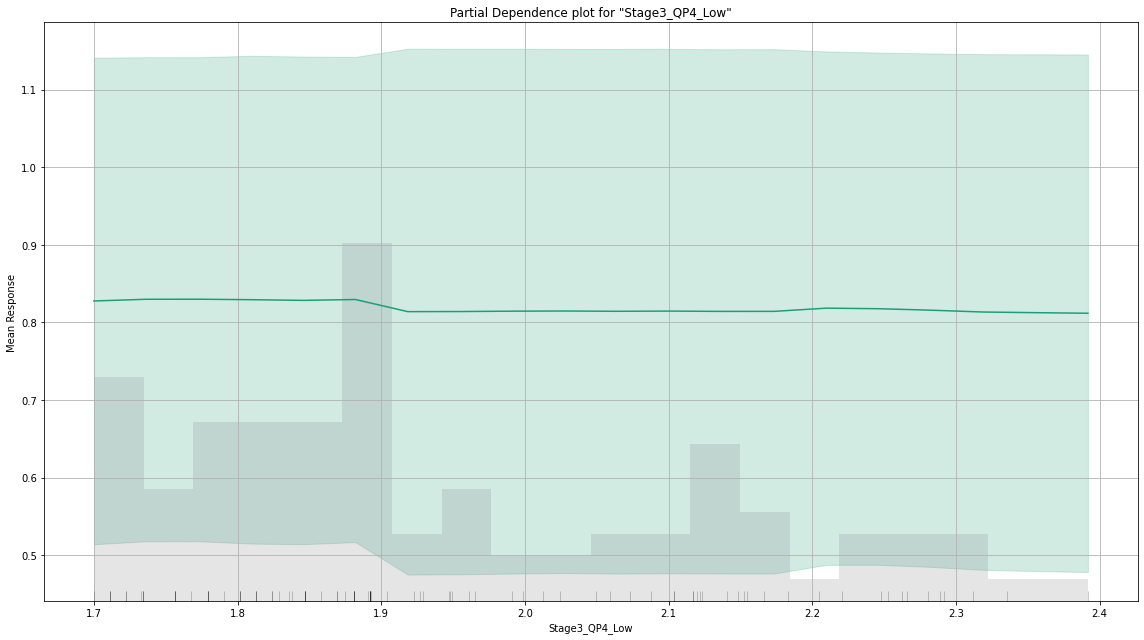

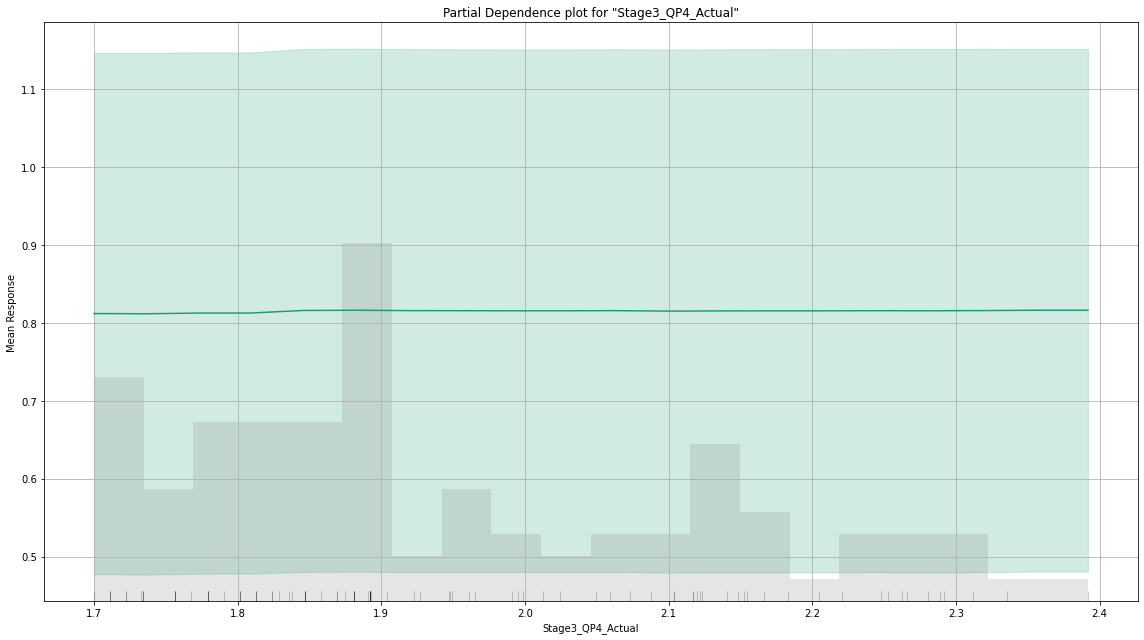

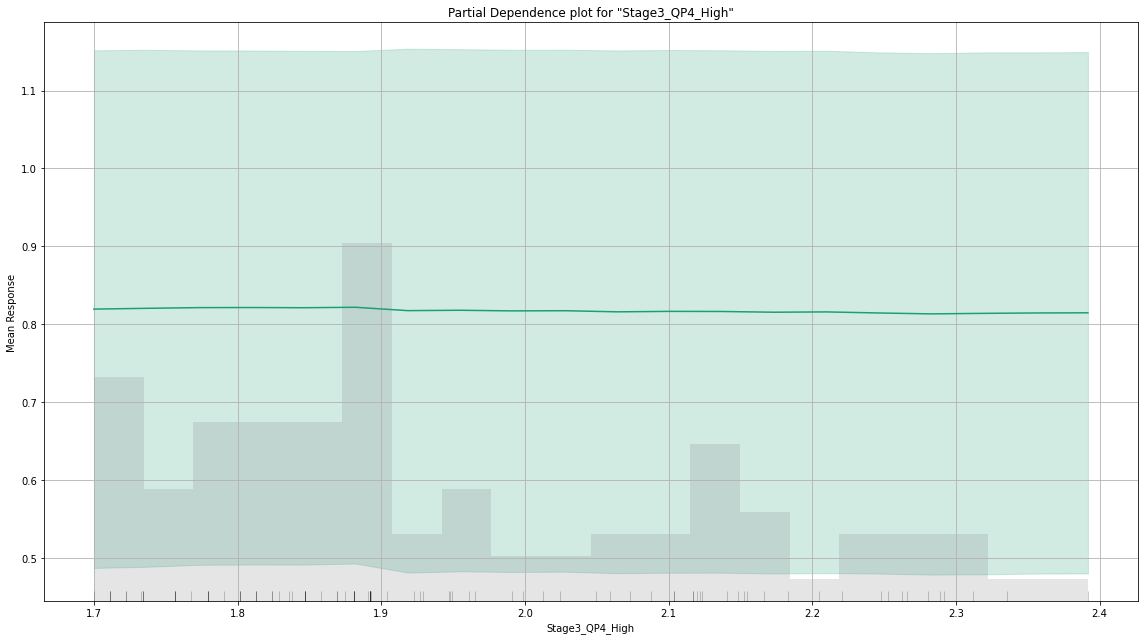

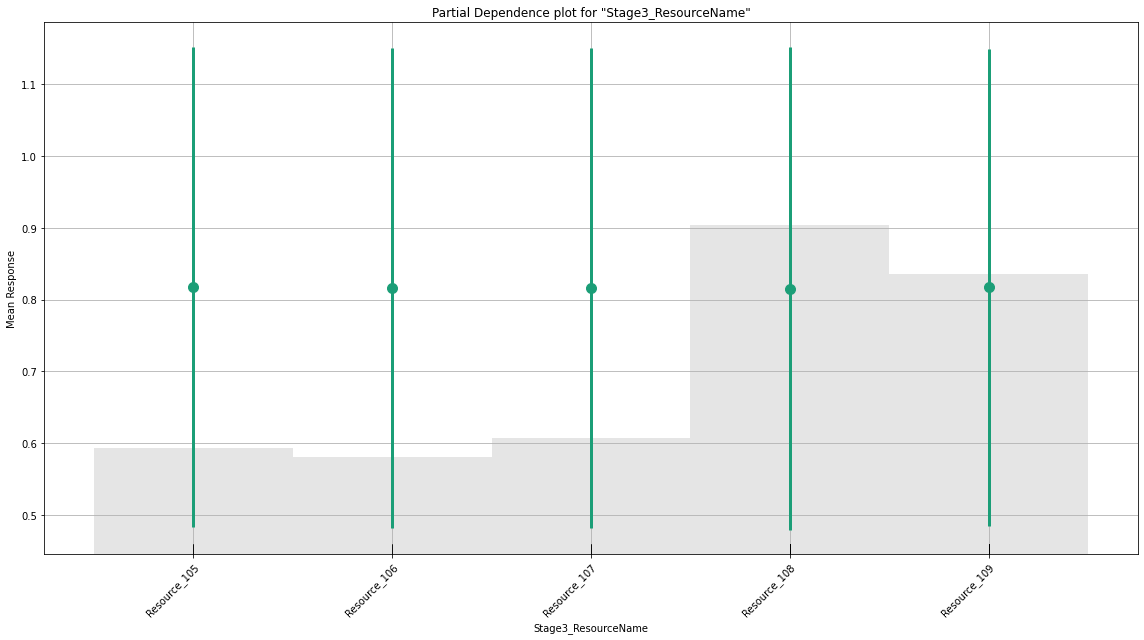

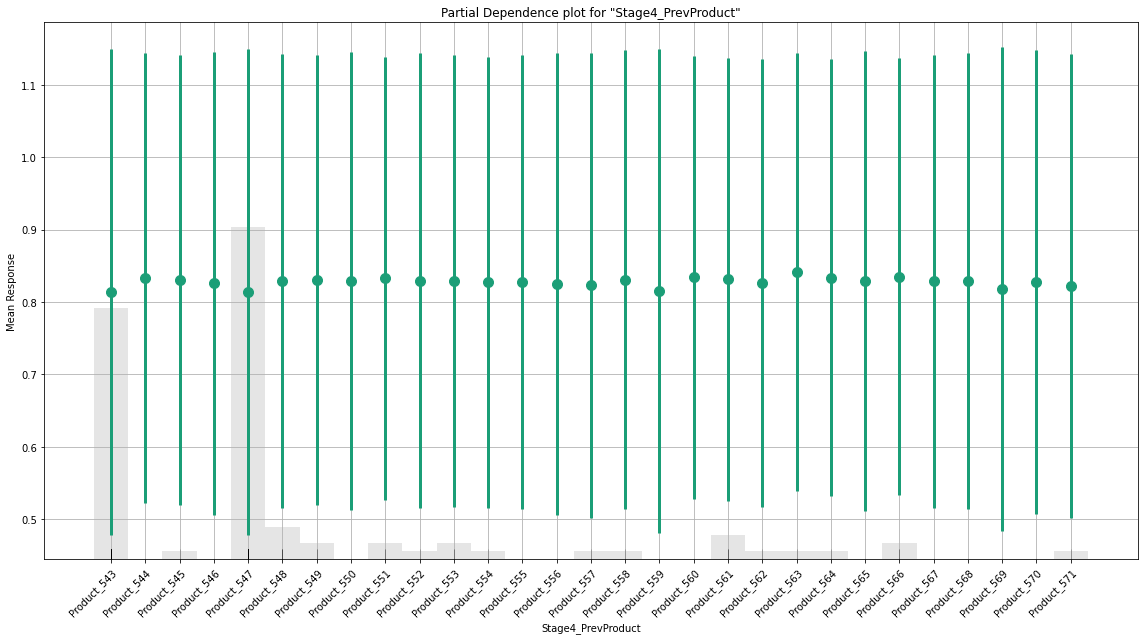

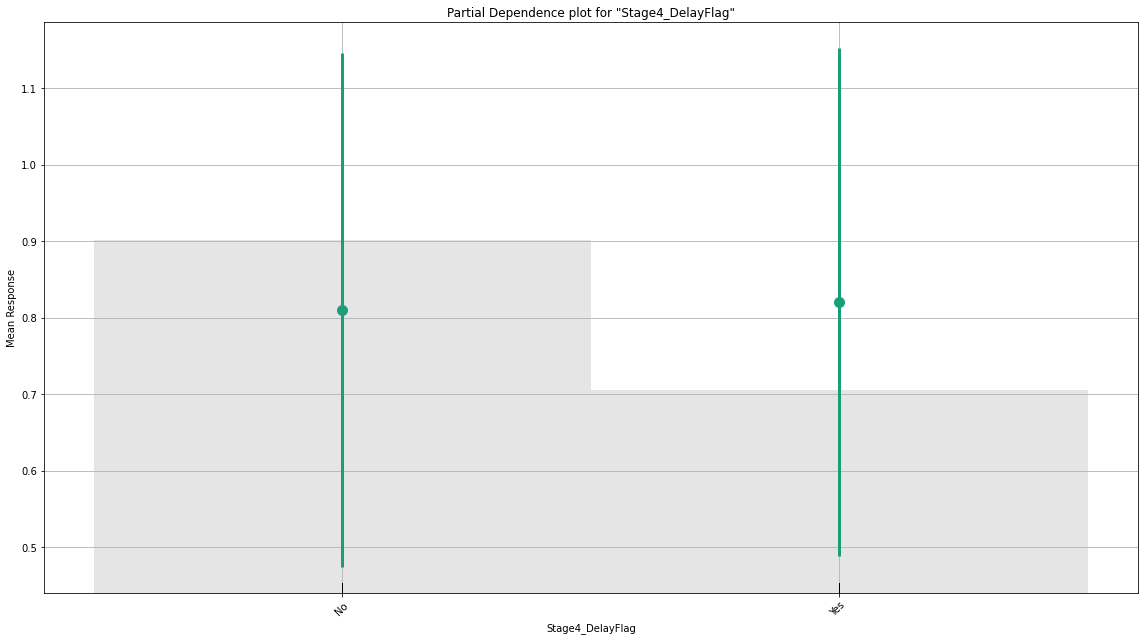

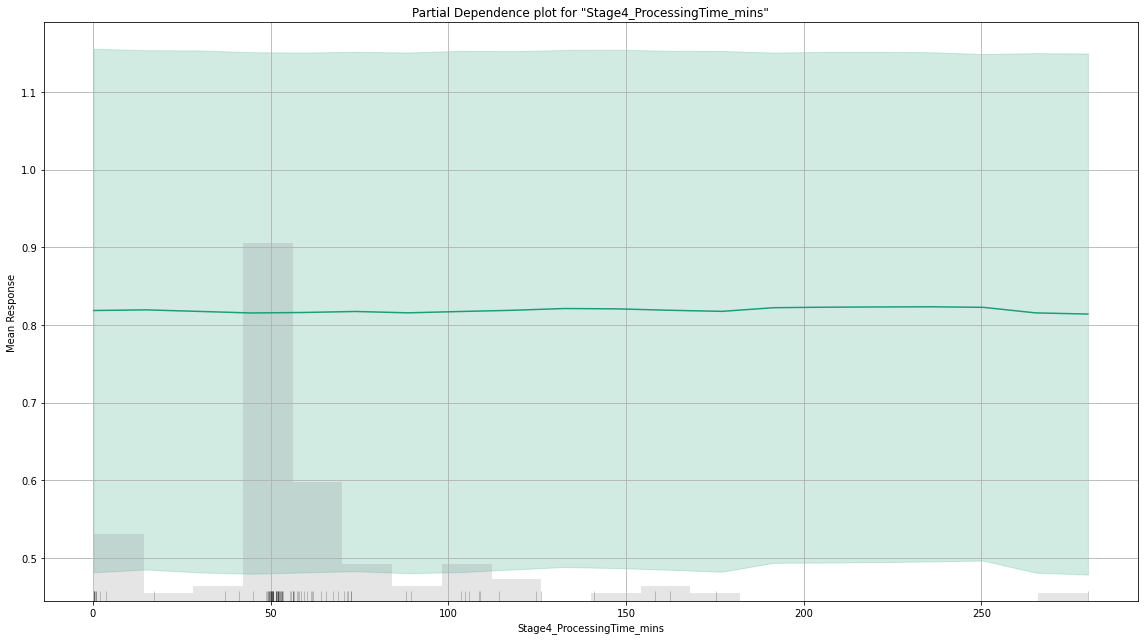

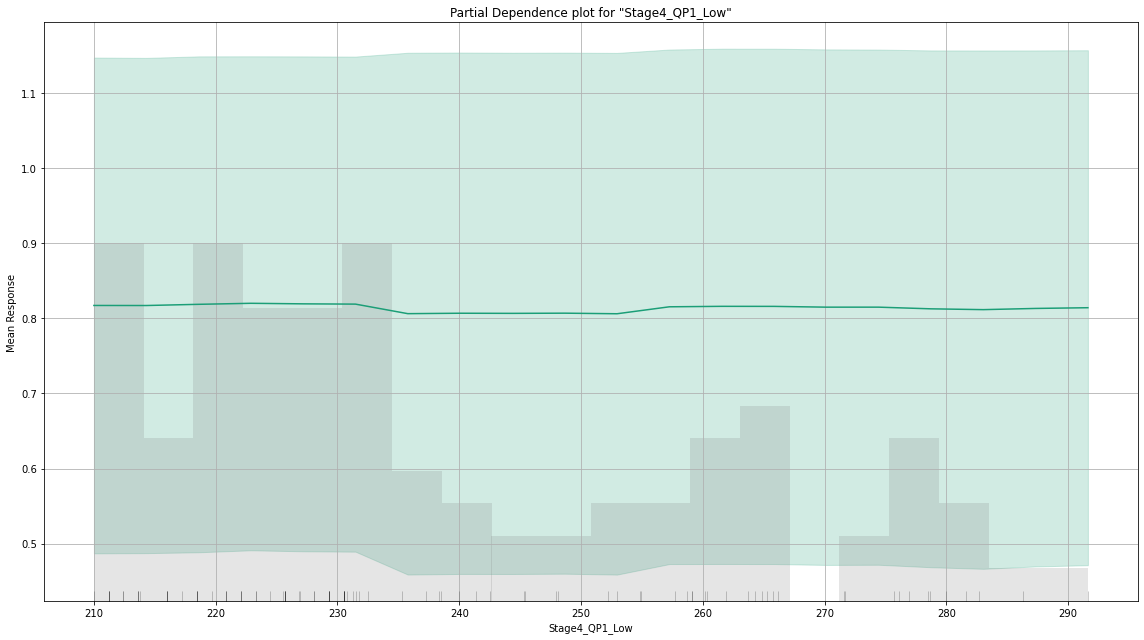

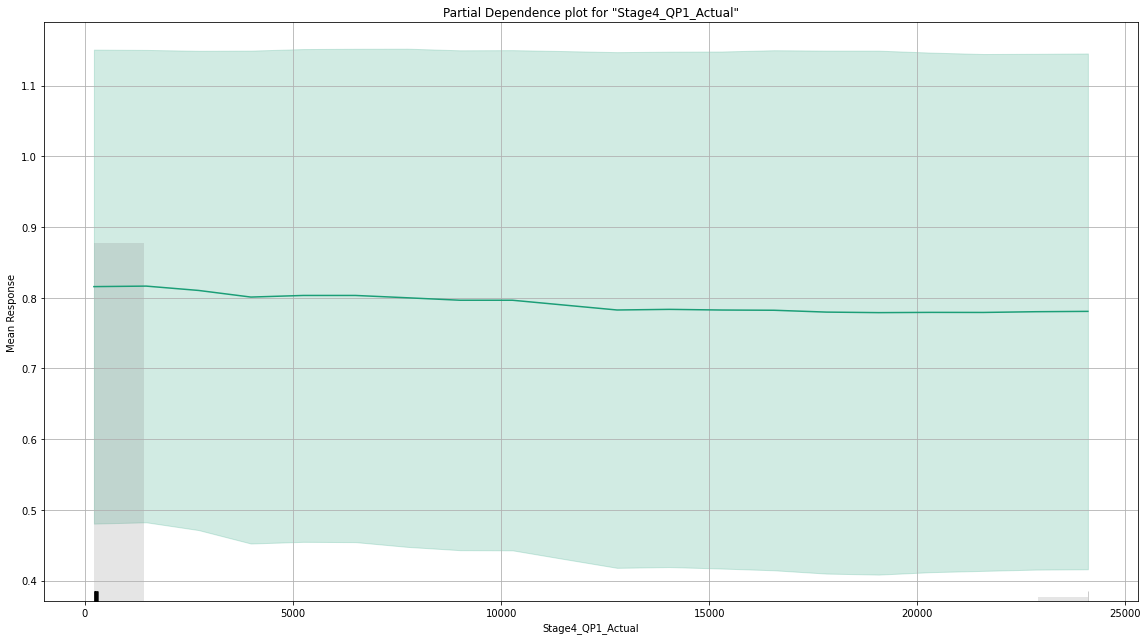

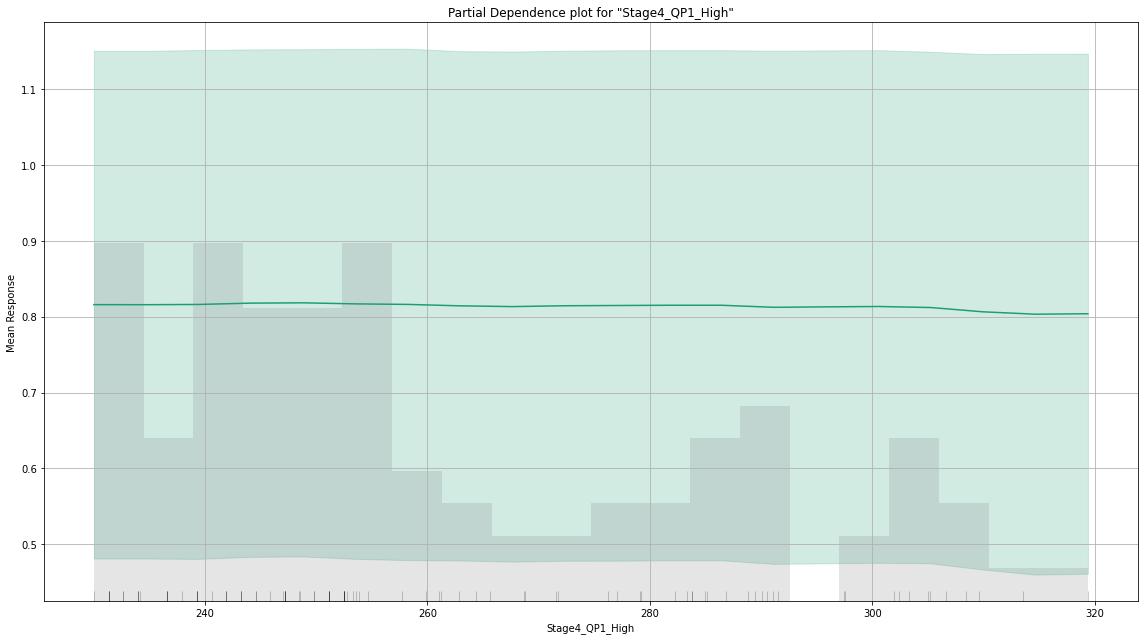

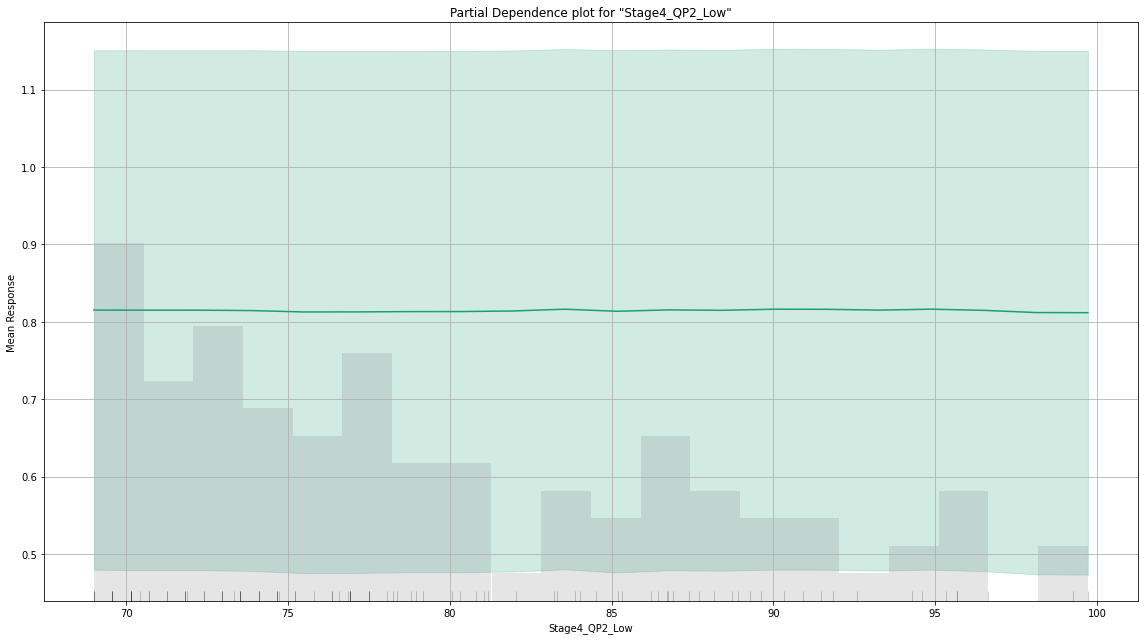

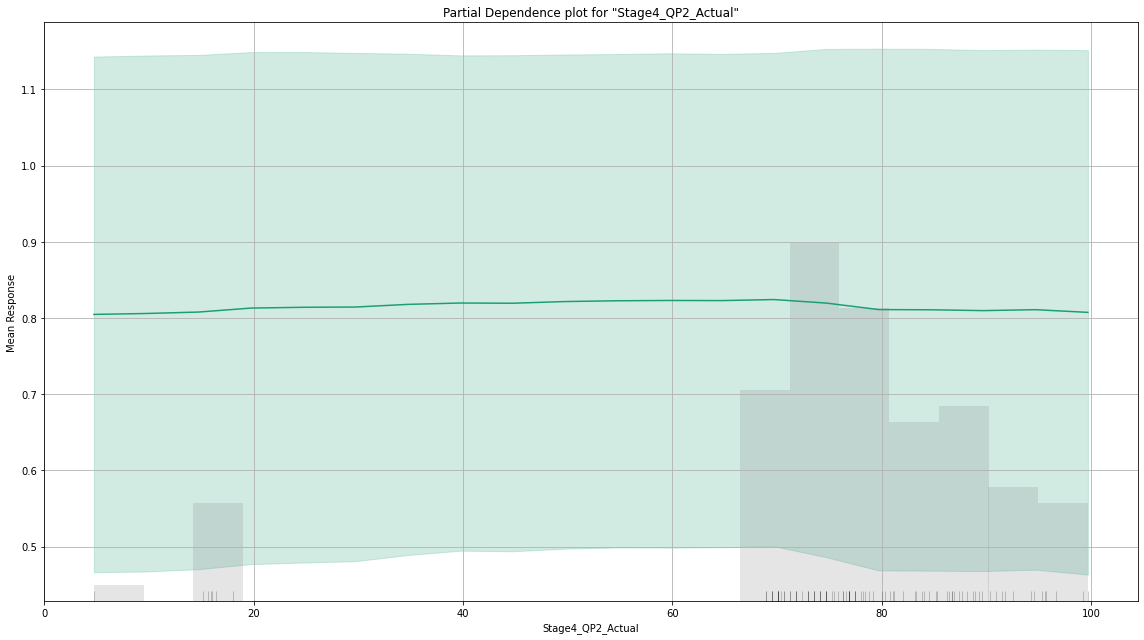

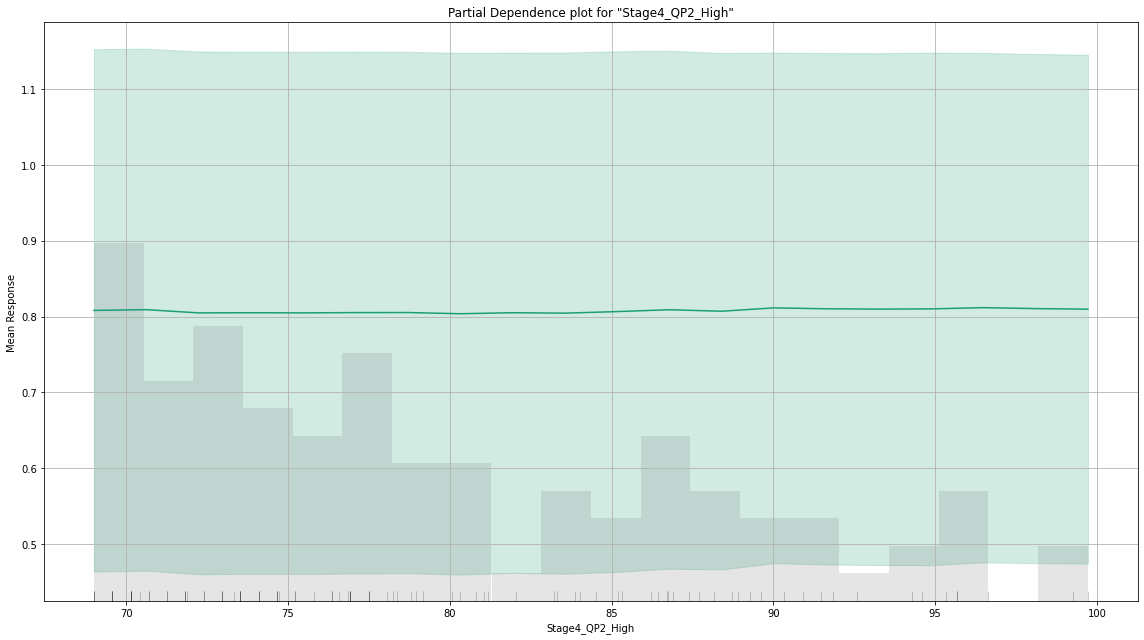

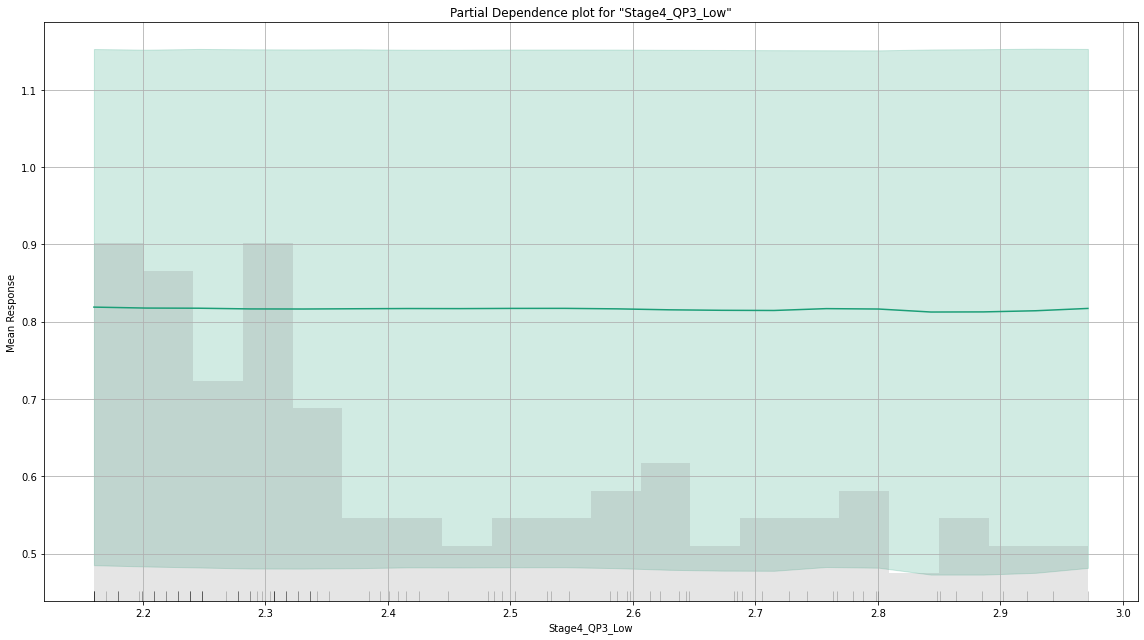

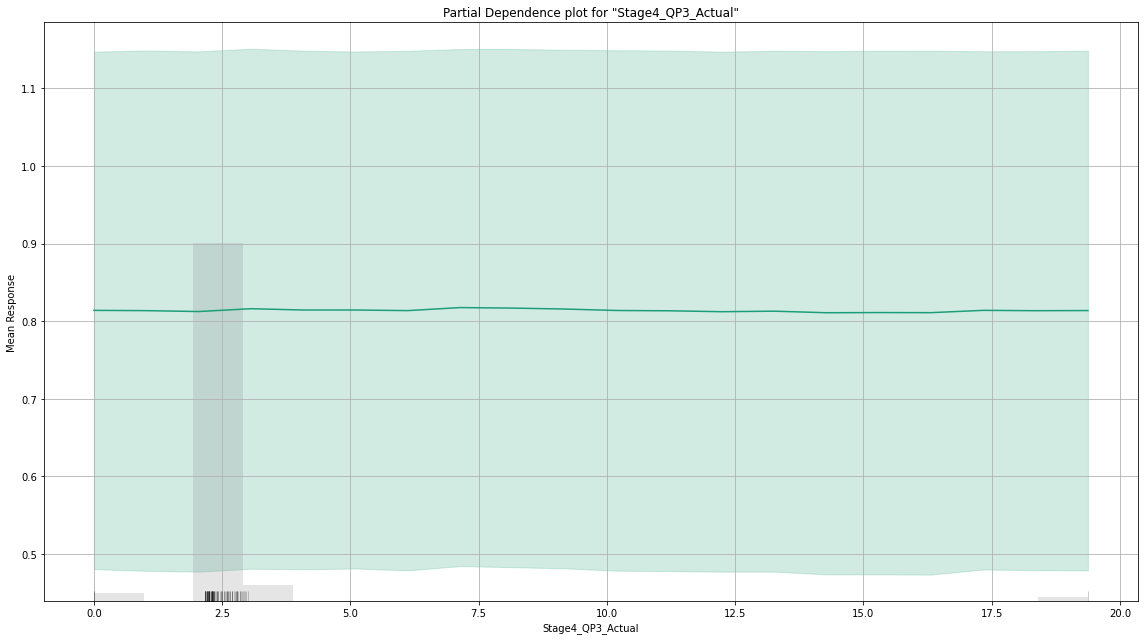

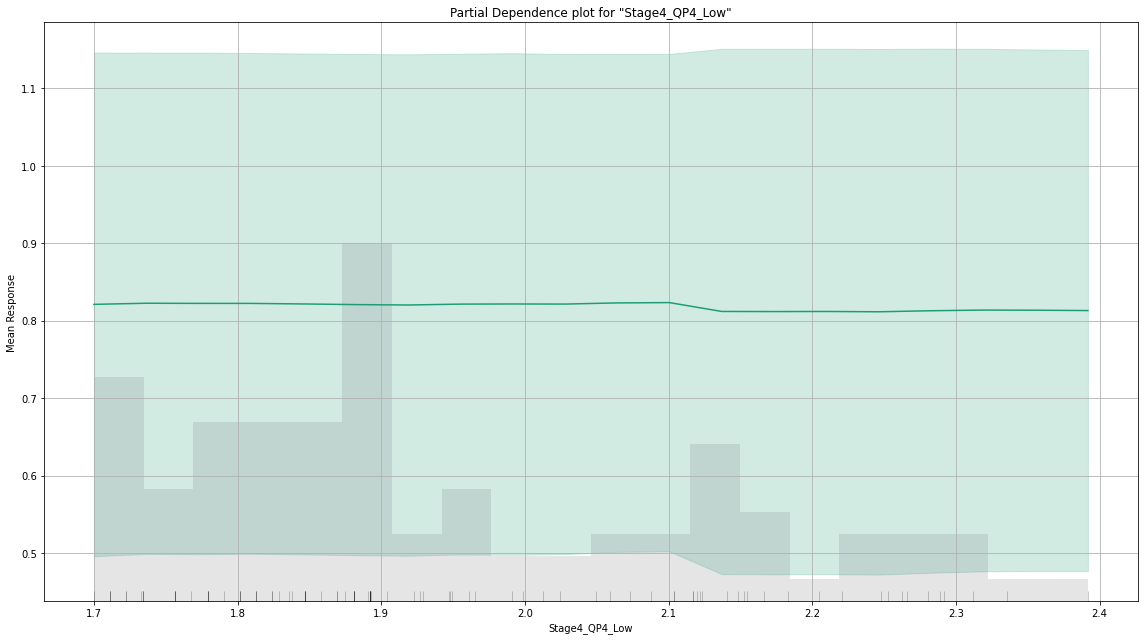

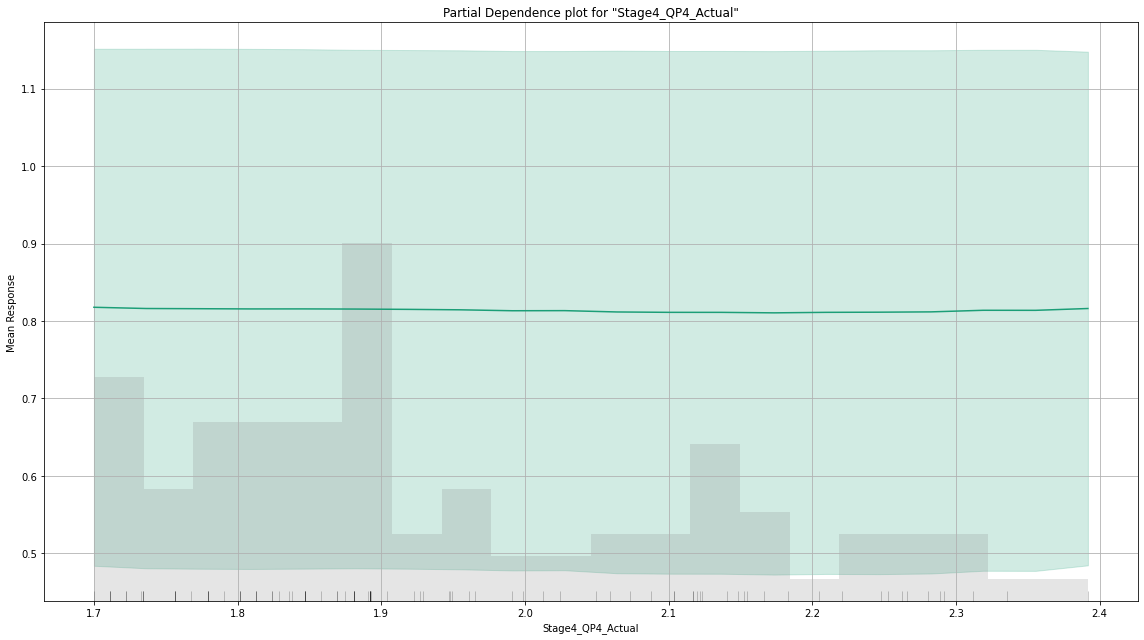

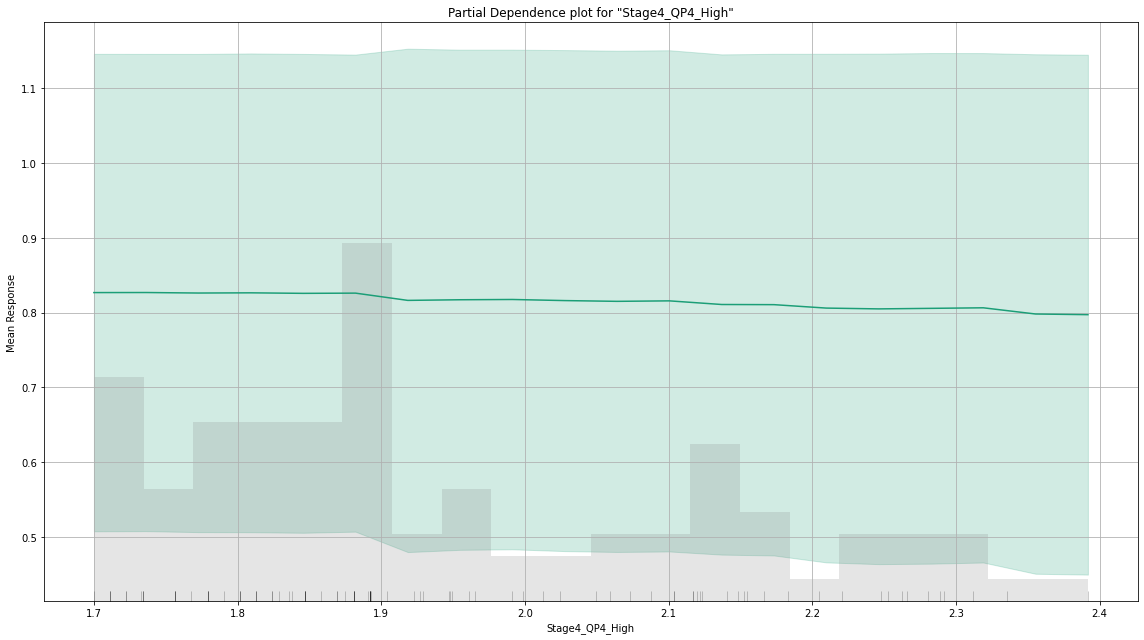

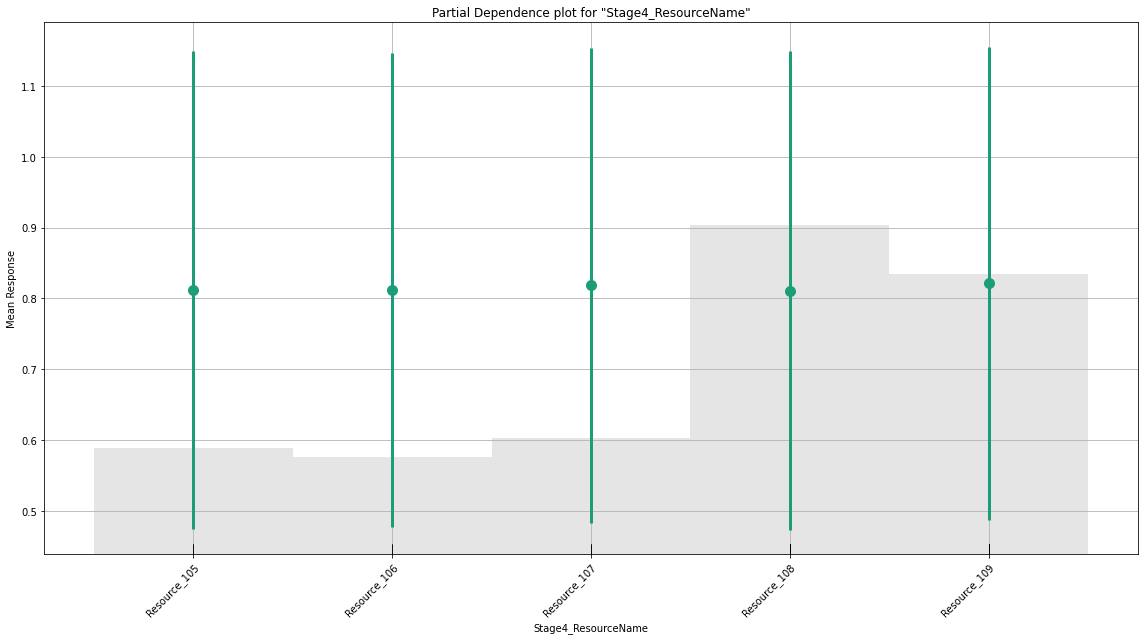

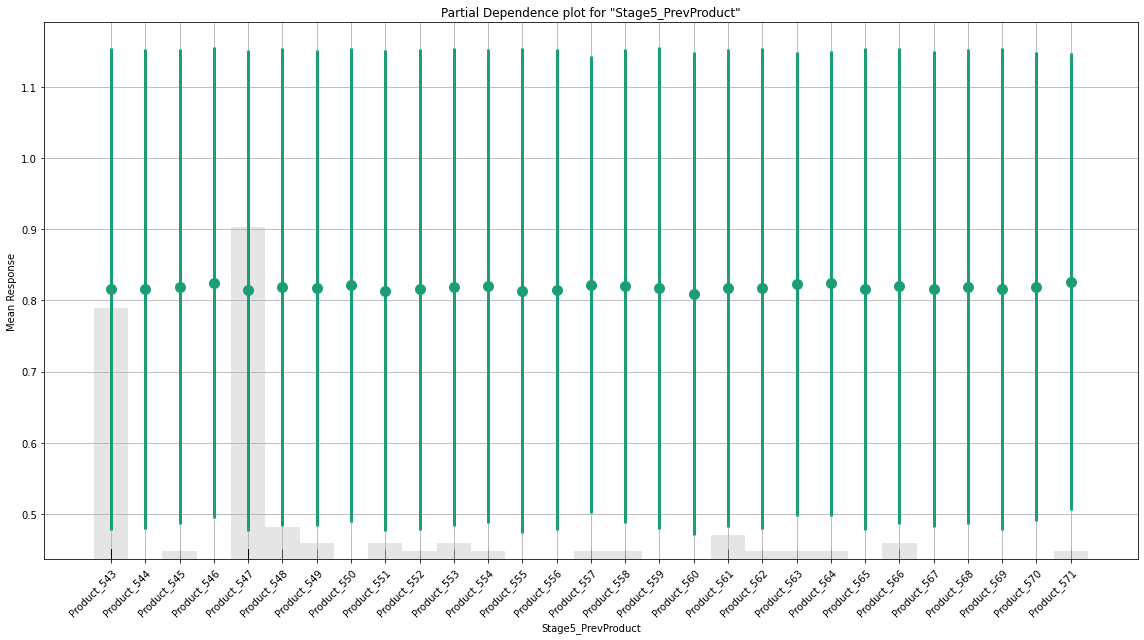

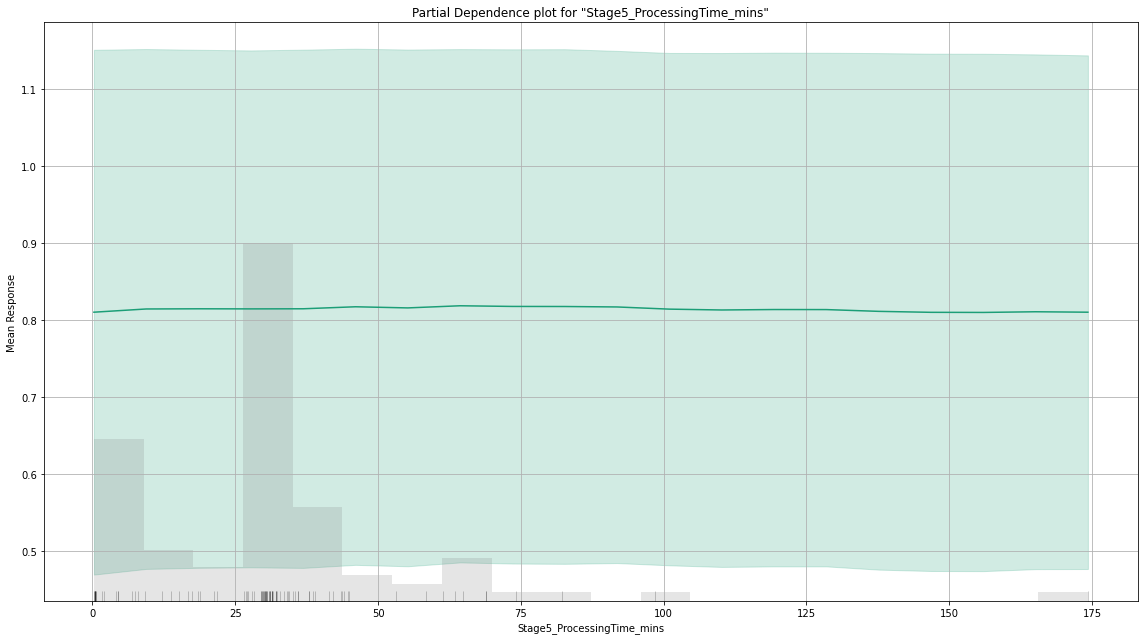

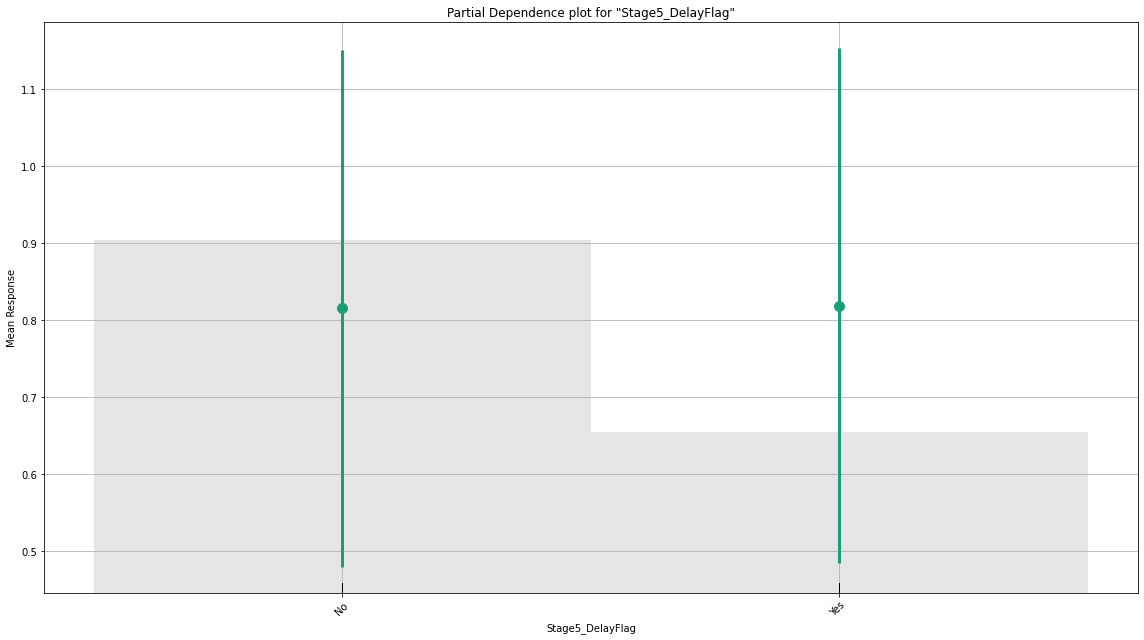

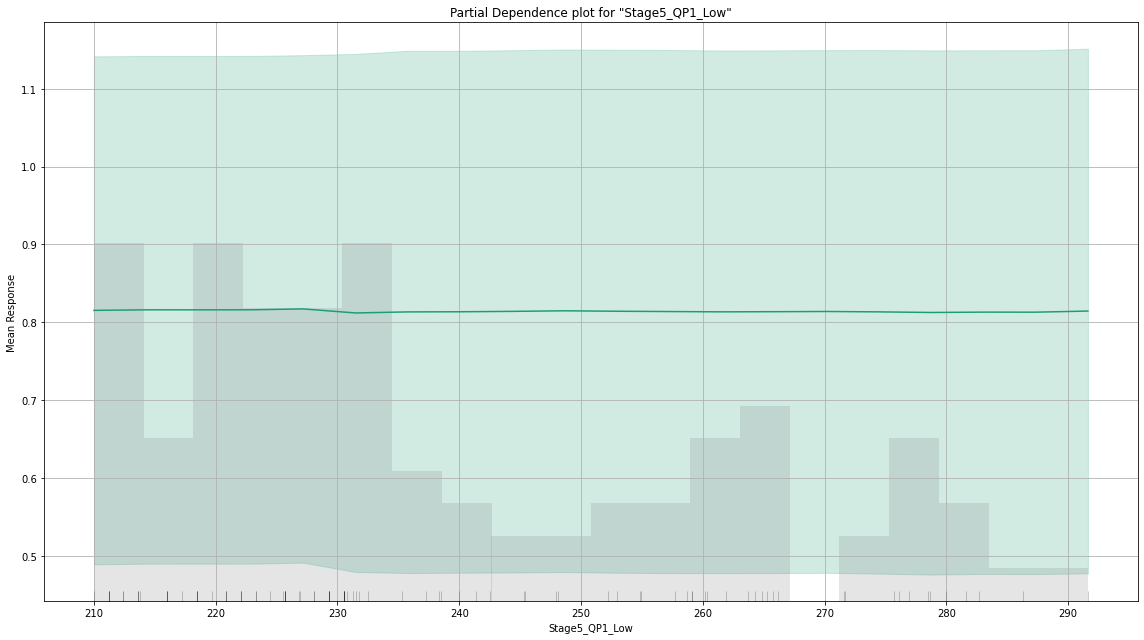

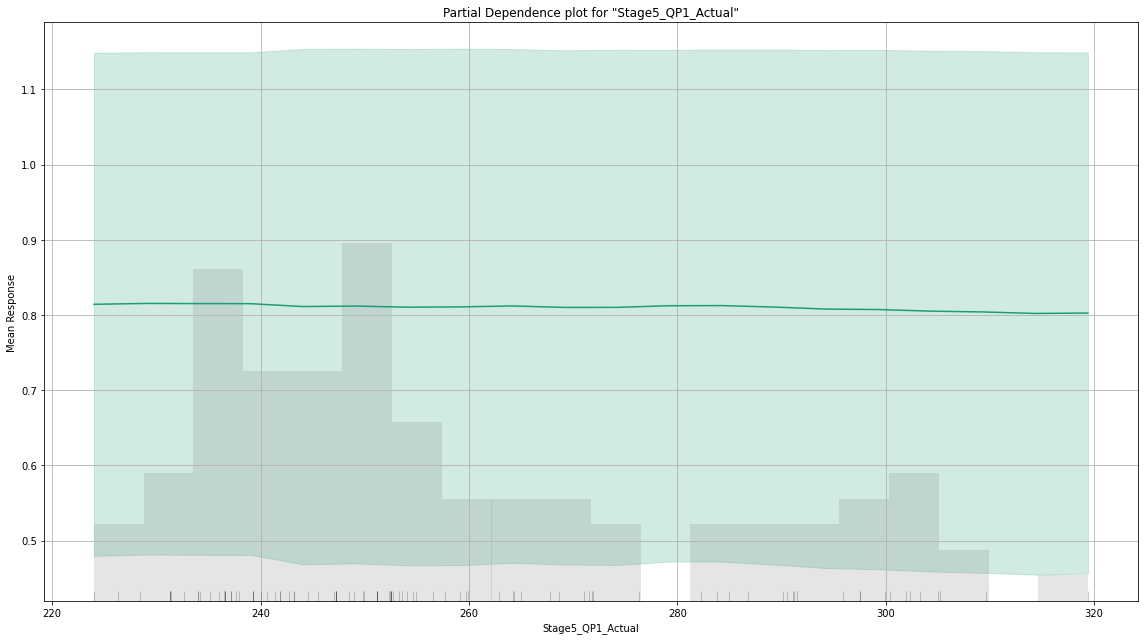

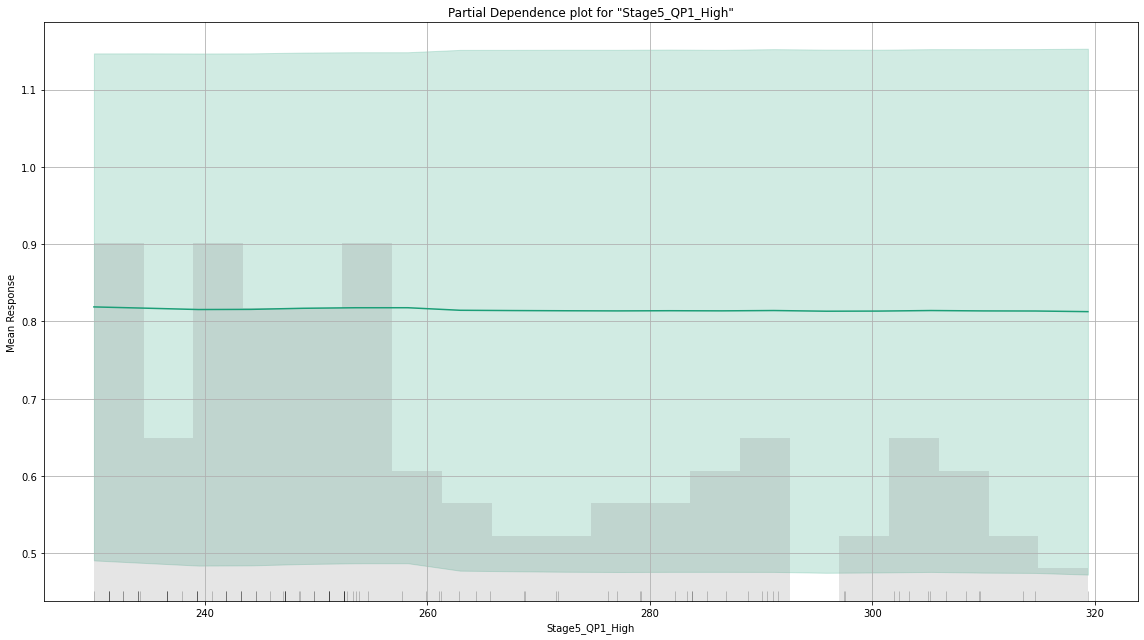

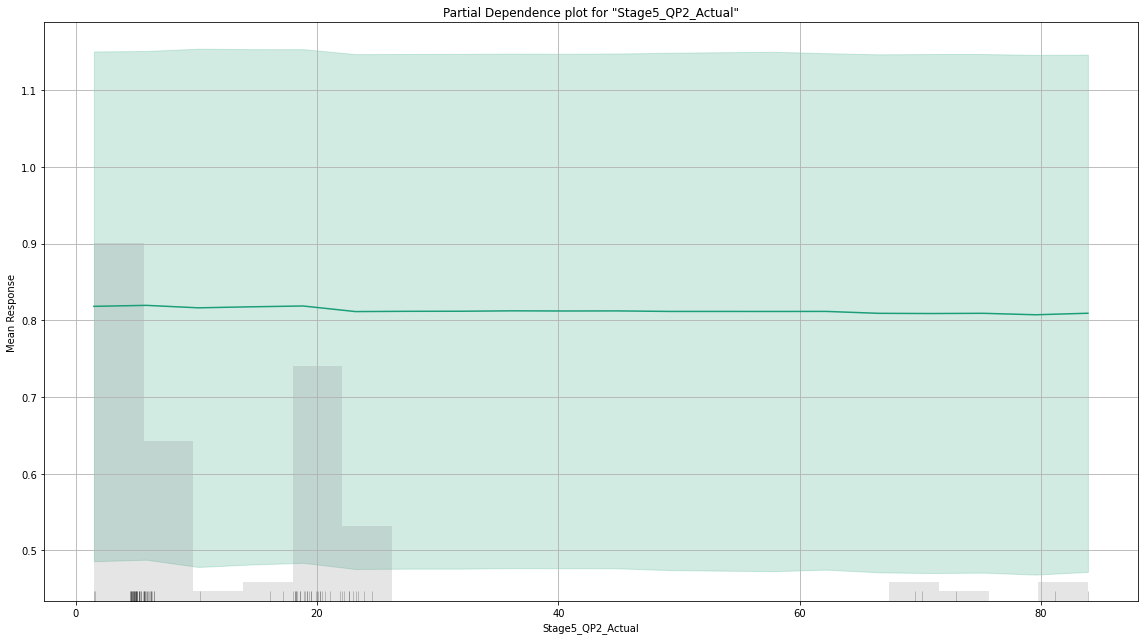

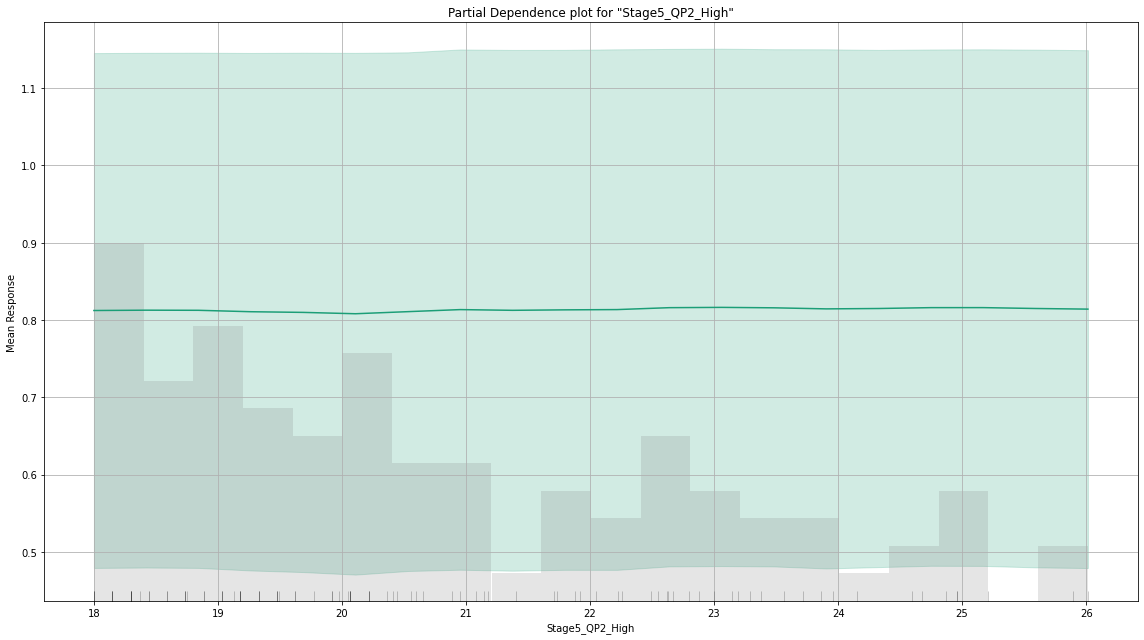

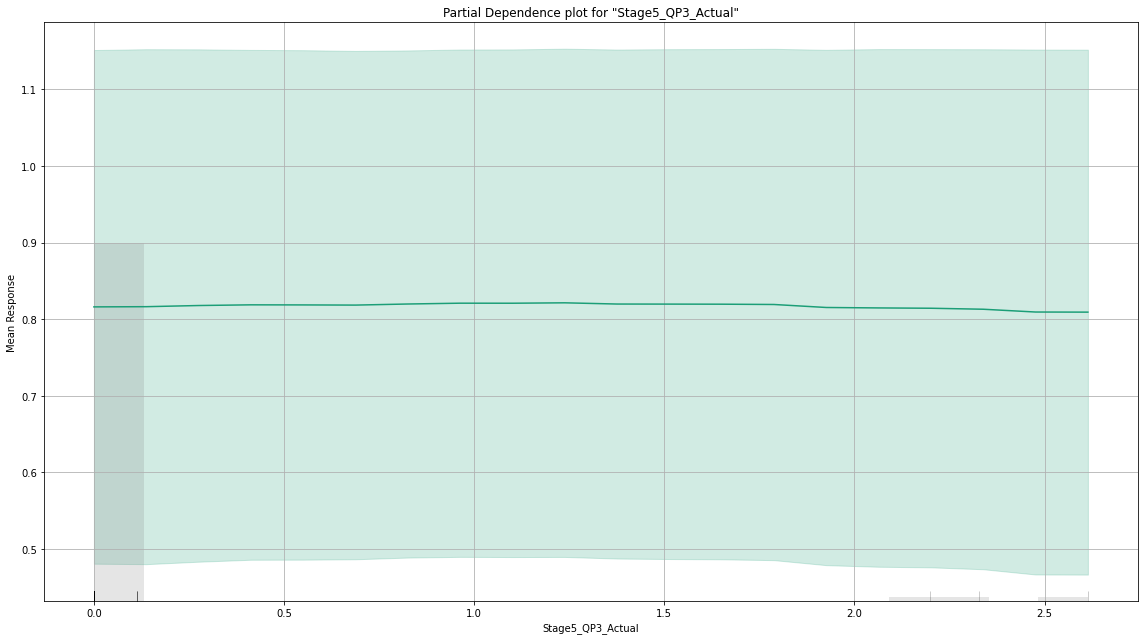

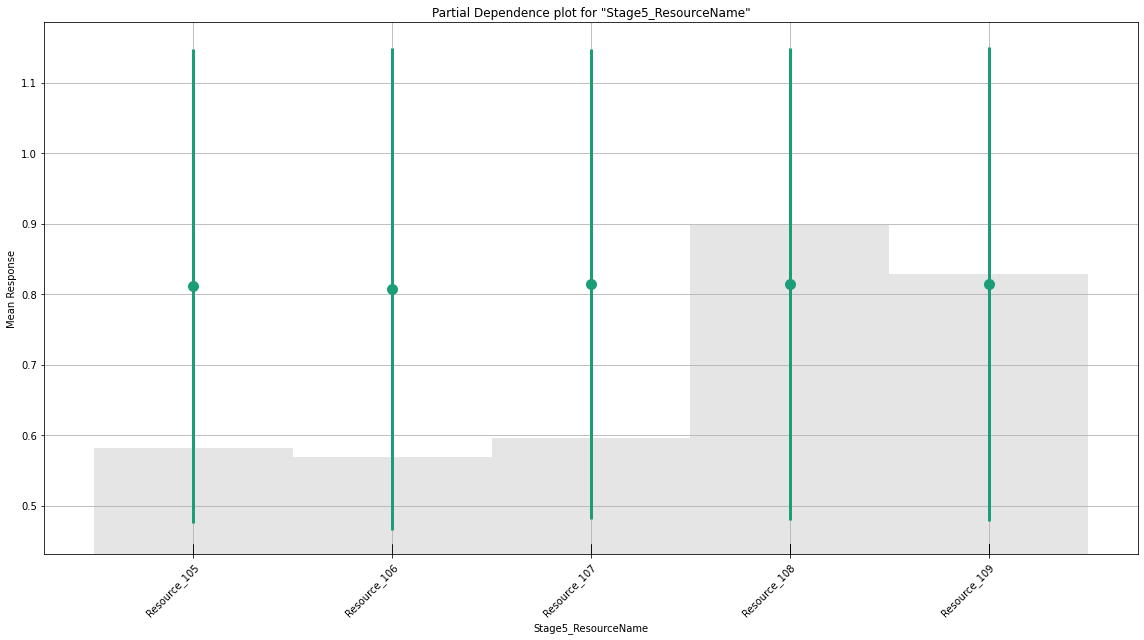

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## StackedEnsemble_AllModels_5_AutoML_1_20220107_121020


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.37864867550400244: 


,,Bad,Good,Error,Rate
0,Bad,13.0,5.0,0.2778,(5.0/18.0)
1,Good,1.0,77.0,0.0128,(1.0/78.0)
2,Total,14.0,82.0,0.0625,(6.0/96.0)


# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

In [33]:
# Explain prediction on test data
exa = aml.leader.explain(test)
exa